<h3>CNN Classifier - Cats v Dogs</h3><br>
Classifier of cats vs dogs using a CNN and transfer learning with TensorFlow 2.0<br>
Data is fed into the NN using ImageDataGenerator.flow_from_directory()<br>
Data is first arranged into respective folders for the Generator. Possible image augmentations are then presented.
<br><br>
Data from Kaggle's Dogs vs Dogs Competition: https://www.kaggle.com/c/dogs-vs-cats/overview

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import glob
import pathlib
import time
import image_handler as ih

In [3]:
START = 0
def time_start():
    global START 
    START = time.perf_counter()
    
def time_end():
    global START
    end = time.perf_counter() - START
    
    print(time.strftime('%H:%M:%S', time.gmtime(end)))

In [4]:
image_width = 128
image_height = 128
image_depth = 3
input_shape = (image_width, image_height, image_depth)
batch_size = 32

<h3>See histogram of the image widths and heights to get an idea of the image dimensions</h3>

In [5]:
image_list = glob.glob(str(pathlib.Path('images/raw/train/*')))
time_start()
image_dimensions = ih.get_image_dimensions(image_list)
time_end()

1 : 25000 : images\raw\train\cat.0.jpg
2 : 25000 : images\raw\train\cat.1.jpg
3 : 25000 : images\raw\train\cat.10.jpg
4 : 25000 : images\raw\train\cat.100.jpg
5 : 25000 : images\raw\train\cat.1000.jpg
6 : 25000 : images\raw\train\cat.10000.jpg
7 : 25000 : images\raw\train\cat.10001.jpg
8 : 25000 : images\raw\train\cat.10002.jpg
9 : 25000 : images\raw\train\cat.10003.jpg
10 : 25000 : images\raw\train\cat.10004.jpg
11 : 25000 : images\raw\train\cat.10005.jpg
12 : 25000 : images\raw\train\cat.10006.jpg
13 : 25000 : images\raw\train\cat.10007.jpg
14 : 25000 : images\raw\train\cat.10008.jpg
15 : 25000 : images\raw\train\cat.10009.jpg
16 : 25000 : images\raw\train\cat.1001.jpg
17 : 25000 : images\raw\train\cat.10010.jpg
18 : 25000 : images\raw\train\cat.10011.jpg
19 : 25000 : images\raw\train\cat.10012.jpg
20 : 25000 : images\raw\train\cat.10013.jpg
21 : 25000 : images\raw\train\cat.10014.jpg
22 : 25000 : images\raw\train\cat.10015.jpg
23 : 25000 : images\raw\train\cat.10016.jpg
24 : 25000 :

228 : 25000 : images\raw\train\cat.10200.jpg
229 : 25000 : images\raw\train\cat.10201.jpg
230 : 25000 : images\raw\train\cat.10202.jpg
231 : 25000 : images\raw\train\cat.10203.jpg
232 : 25000 : images\raw\train\cat.10204.jpg
233 : 25000 : images\raw\train\cat.10205.jpg
234 : 25000 : images\raw\train\cat.10206.jpg
235 : 25000 : images\raw\train\cat.10207.jpg
236 : 25000 : images\raw\train\cat.10208.jpg
237 : 25000 : images\raw\train\cat.10209.jpg
238 : 25000 : images\raw\train\cat.1021.jpg
239 : 25000 : images\raw\train\cat.10210.jpg
240 : 25000 : images\raw\train\cat.10211.jpg
241 : 25000 : images\raw\train\cat.10212.jpg
242 : 25000 : images\raw\train\cat.10213.jpg
243 : 25000 : images\raw\train\cat.10214.jpg
244 : 25000 : images\raw\train\cat.10215.jpg
245 : 25000 : images\raw\train\cat.10216.jpg
246 : 25000 : images\raw\train\cat.10217.jpg
247 : 25000 : images\raw\train\cat.10218.jpg
248 : 25000 : images\raw\train\cat.10219.jpg
249 : 25000 : images\raw\train\cat.1022.jpg
250 : 25000 

470 : 25000 : images\raw\train\cat.10419.jpg
471 : 25000 : images\raw\train\cat.1042.jpg
472 : 25000 : images\raw\train\cat.10420.jpg
473 : 25000 : images\raw\train\cat.10421.jpg
474 : 25000 : images\raw\train\cat.10422.jpg
475 : 25000 : images\raw\train\cat.10423.jpg
476 : 25000 : images\raw\train\cat.10424.jpg
477 : 25000 : images\raw\train\cat.10425.jpg
478 : 25000 : images\raw\train\cat.10426.jpg
479 : 25000 : images\raw\train\cat.10427.jpg
480 : 25000 : images\raw\train\cat.10428.jpg
481 : 25000 : images\raw\train\cat.10429.jpg
482 : 25000 : images\raw\train\cat.1043.jpg
483 : 25000 : images\raw\train\cat.10430.jpg
484 : 25000 : images\raw\train\cat.10431.jpg
485 : 25000 : images\raw\train\cat.10432.jpg
486 : 25000 : images\raw\train\cat.10433.jpg
487 : 25000 : images\raw\train\cat.10434.jpg
488 : 25000 : images\raw\train\cat.10435.jpg
489 : 25000 : images\raw\train\cat.10436.jpg
490 : 25000 : images\raw\train\cat.10437.jpg
491 : 25000 : images\raw\train\cat.10438.jpg
492 : 25000 

721 : 25000 : images\raw\train\cat.10645.jpg
722 : 25000 : images\raw\train\cat.10646.jpg
723 : 25000 : images\raw\train\cat.10647.jpg
724 : 25000 : images\raw\train\cat.10648.jpg
725 : 25000 : images\raw\train\cat.10649.jpg
726 : 25000 : images\raw\train\cat.1065.jpg
727 : 25000 : images\raw\train\cat.10650.jpg
728 : 25000 : images\raw\train\cat.10651.jpg
729 : 25000 : images\raw\train\cat.10652.jpg
730 : 25000 : images\raw\train\cat.10653.jpg
731 : 25000 : images\raw\train\cat.10654.jpg
732 : 25000 : images\raw\train\cat.10655.jpg
733 : 25000 : images\raw\train\cat.10656.jpg
734 : 25000 : images\raw\train\cat.10657.jpg
735 : 25000 : images\raw\train\cat.10658.jpg
736 : 25000 : images\raw\train\cat.10659.jpg
737 : 25000 : images\raw\train\cat.1066.jpg
738 : 25000 : images\raw\train\cat.10660.jpg
739 : 25000 : images\raw\train\cat.10661.jpg
740 : 25000 : images\raw\train\cat.10662.jpg
741 : 25000 : images\raw\train\cat.10663.jpg
742 : 25000 : images\raw\train\cat.10664.jpg
743 : 25000 

981 : 25000 : images\raw\train\cat.1088.jpg
982 : 25000 : images\raw\train\cat.10880.jpg
983 : 25000 : images\raw\train\cat.10881.jpg
984 : 25000 : images\raw\train\cat.10882.jpg
985 : 25000 : images\raw\train\cat.10883.jpg
986 : 25000 : images\raw\train\cat.10884.jpg
987 : 25000 : images\raw\train\cat.10885.jpg
988 : 25000 : images\raw\train\cat.10886.jpg
989 : 25000 : images\raw\train\cat.10887.jpg
990 : 25000 : images\raw\train\cat.10888.jpg
991 : 25000 : images\raw\train\cat.10889.jpg
992 : 25000 : images\raw\train\cat.1089.jpg
993 : 25000 : images\raw\train\cat.10890.jpg
994 : 25000 : images\raw\train\cat.10891.jpg
995 : 25000 : images\raw\train\cat.10892.jpg
996 : 25000 : images\raw\train\cat.10893.jpg
997 : 25000 : images\raw\train\cat.10894.jpg
998 : 25000 : images\raw\train\cat.10895.jpg
999 : 25000 : images\raw\train\cat.10896.jpg
1000 : 25000 : images\raw\train\cat.10897.jpg
1001 : 25000 : images\raw\train\cat.10898.jpg
1002 : 25000 : images\raw\train\cat.10899.jpg
1003 : 25

1242 : 25000 : images\raw\train\cat.11113.jpg
1243 : 25000 : images\raw\train\cat.11114.jpg
1244 : 25000 : images\raw\train\cat.11115.jpg
1245 : 25000 : images\raw\train\cat.11116.jpg
1246 : 25000 : images\raw\train\cat.11117.jpg
1247 : 25000 : images\raw\train\cat.11118.jpg
1248 : 25000 : images\raw\train\cat.11119.jpg
1249 : 25000 : images\raw\train\cat.1112.jpg
1250 : 25000 : images\raw\train\cat.11120.jpg
1251 : 25000 : images\raw\train\cat.11121.jpg
1252 : 25000 : images\raw\train\cat.11122.jpg
1253 : 25000 : images\raw\train\cat.11123.jpg
1254 : 25000 : images\raw\train\cat.11124.jpg
1255 : 25000 : images\raw\train\cat.11125.jpg
1256 : 25000 : images\raw\train\cat.11126.jpg
1257 : 25000 : images\raw\train\cat.11127.jpg
1258 : 25000 : images\raw\train\cat.11128.jpg
1259 : 25000 : images\raw\train\cat.11129.jpg
1260 : 25000 : images\raw\train\cat.1113.jpg
1261 : 25000 : images\raw\train\cat.11130.jpg
1262 : 25000 : images\raw\train\cat.11131.jpg
1263 : 25000 : images\raw\train\cat.

1507 : 25000 : images\raw\train\cat.11352.jpg
1508 : 25000 : images\raw\train\cat.11353.jpg
1509 : 25000 : images\raw\train\cat.11354.jpg
1510 : 25000 : images\raw\train\cat.11355.jpg
1511 : 25000 : images\raw\train\cat.11356.jpg
1512 : 25000 : images\raw\train\cat.11357.jpg
1513 : 25000 : images\raw\train\cat.11358.jpg
1514 : 25000 : images\raw\train\cat.11359.jpg
1515 : 25000 : images\raw\train\cat.1136.jpg
1516 : 25000 : images\raw\train\cat.11360.jpg
1517 : 25000 : images\raw\train\cat.11361.jpg
1518 : 25000 : images\raw\train\cat.11362.jpg
1519 : 25000 : images\raw\train\cat.11363.jpg
1520 : 25000 : images\raw\train\cat.11364.jpg
1521 : 25000 : images\raw\train\cat.11365.jpg
1522 : 25000 : images\raw\train\cat.11366.jpg
1523 : 25000 : images\raw\train\cat.11367.jpg
1524 : 25000 : images\raw\train\cat.11368.jpg
1525 : 25000 : images\raw\train\cat.11369.jpg
1526 : 25000 : images\raw\train\cat.1137.jpg
1527 : 25000 : images\raw\train\cat.11370.jpg
1528 : 25000 : images\raw\train\cat.

1772 : 25000 : images\raw\train\cat.11591.jpg
1773 : 25000 : images\raw\train\cat.11592.jpg
1774 : 25000 : images\raw\train\cat.11593.jpg
1775 : 25000 : images\raw\train\cat.11594.jpg
1776 : 25000 : images\raw\train\cat.11595.jpg
1777 : 25000 : images\raw\train\cat.11596.jpg
1778 : 25000 : images\raw\train\cat.11597.jpg
1779 : 25000 : images\raw\train\cat.11598.jpg
1780 : 25000 : images\raw\train\cat.11599.jpg
1781 : 25000 : images\raw\train\cat.116.jpg
1782 : 25000 : images\raw\train\cat.1160.jpg
1783 : 25000 : images\raw\train\cat.11600.jpg
1784 : 25000 : images\raw\train\cat.11601.jpg
1785 : 25000 : images\raw\train\cat.11602.jpg
1786 : 25000 : images\raw\train\cat.11603.jpg
1787 : 25000 : images\raw\train\cat.11604.jpg
1788 : 25000 : images\raw\train\cat.11605.jpg
1789 : 25000 : images\raw\train\cat.11606.jpg
1790 : 25000 : images\raw\train\cat.11607.jpg
1791 : 25000 : images\raw\train\cat.11608.jpg
1792 : 25000 : images\raw\train\cat.11609.jpg
1793 : 25000 : images\raw\train\cat.1

2009 : 25000 : images\raw\train\cat.11804.jpg
2010 : 25000 : images\raw\train\cat.11805.jpg
2011 : 25000 : images\raw\train\cat.11806.jpg
2012 : 25000 : images\raw\train\cat.11807.jpg
2013 : 25000 : images\raw\train\cat.11808.jpg
2014 : 25000 : images\raw\train\cat.11809.jpg
2015 : 25000 : images\raw\train\cat.1181.jpg
2016 : 25000 : images\raw\train\cat.11810.jpg
2017 : 25000 : images\raw\train\cat.11811.jpg
2018 : 25000 : images\raw\train\cat.11812.jpg
2019 : 25000 : images\raw\train\cat.11813.jpg
2020 : 25000 : images\raw\train\cat.11814.jpg
2021 : 25000 : images\raw\train\cat.11815.jpg
2022 : 25000 : images\raw\train\cat.11816.jpg
2023 : 25000 : images\raw\train\cat.11817.jpg
2024 : 25000 : images\raw\train\cat.11818.jpg
2025 : 25000 : images\raw\train\cat.11819.jpg
2026 : 25000 : images\raw\train\cat.1182.jpg
2027 : 25000 : images\raw\train\cat.11820.jpg
2028 : 25000 : images\raw\train\cat.11821.jpg
2029 : 25000 : images\raw\train\cat.11822.jpg
2030 : 25000 : images\raw\train\cat.

2269 : 25000 : images\raw\train\cat.12038.jpg
2270 : 25000 : images\raw\train\cat.12039.jpg
2271 : 25000 : images\raw\train\cat.1204.jpg
2272 : 25000 : images\raw\train\cat.12040.jpg
2273 : 25000 : images\raw\train\cat.12041.jpg
2274 : 25000 : images\raw\train\cat.12042.jpg
2275 : 25000 : images\raw\train\cat.12043.jpg
2276 : 25000 : images\raw\train\cat.12044.jpg
2277 : 25000 : images\raw\train\cat.12045.jpg
2278 : 25000 : images\raw\train\cat.12046.jpg
2279 : 25000 : images\raw\train\cat.12047.jpg
2280 : 25000 : images\raw\train\cat.12048.jpg
2281 : 25000 : images\raw\train\cat.12049.jpg
2282 : 25000 : images\raw\train\cat.1205.jpg
2283 : 25000 : images\raw\train\cat.12050.jpg
2284 : 25000 : images\raw\train\cat.12051.jpg
2285 : 25000 : images\raw\train\cat.12052.jpg
2286 : 25000 : images\raw\train\cat.12053.jpg
2287 : 25000 : images\raw\train\cat.12054.jpg
2288 : 25000 : images\raw\train\cat.12055.jpg
2289 : 25000 : images\raw\train\cat.12056.jpg
2290 : 25000 : images\raw\train\cat.

2526 : 25000 : images\raw\train\cat.1227.jpg
2527 : 25000 : images\raw\train\cat.12270.jpg
2528 : 25000 : images\raw\train\cat.12271.jpg
2529 : 25000 : images\raw\train\cat.12272.jpg
2530 : 25000 : images\raw\train\cat.12273.jpg
2531 : 25000 : images\raw\train\cat.12274.jpg
2532 : 25000 : images\raw\train\cat.12275.jpg
2533 : 25000 : images\raw\train\cat.12276.jpg
2534 : 25000 : images\raw\train\cat.12277.jpg
2535 : 25000 : images\raw\train\cat.12278.jpg
2536 : 25000 : images\raw\train\cat.12279.jpg
2537 : 25000 : images\raw\train\cat.1228.jpg
2538 : 25000 : images\raw\train\cat.12280.jpg
2539 : 25000 : images\raw\train\cat.12281.jpg
2540 : 25000 : images\raw\train\cat.12282.jpg
2541 : 25000 : images\raw\train\cat.12283.jpg
2542 : 25000 : images\raw\train\cat.12284.jpg
2543 : 25000 : images\raw\train\cat.12285.jpg
2544 : 25000 : images\raw\train\cat.12286.jpg
2545 : 25000 : images\raw\train\cat.12287.jpg
2546 : 25000 : images\raw\train\cat.12288.jpg
2547 : 25000 : images\raw\train\cat.

2779 : 25000 : images\raw\train\cat.12498.jpg
2780 : 25000 : images\raw\train\cat.12499.jpg
2781 : 25000 : images\raw\train\cat.125.jpg
2782 : 25000 : images\raw\train\cat.1250.jpg
2783 : 25000 : images\raw\train\cat.1251.jpg
2784 : 25000 : images\raw\train\cat.1252.jpg
2785 : 25000 : images\raw\train\cat.1253.jpg
2786 : 25000 : images\raw\train\cat.1254.jpg
2787 : 25000 : images\raw\train\cat.1255.jpg
2788 : 25000 : images\raw\train\cat.1256.jpg
2789 : 25000 : images\raw\train\cat.1257.jpg
2790 : 25000 : images\raw\train\cat.1258.jpg
2791 : 25000 : images\raw\train\cat.1259.jpg
2792 : 25000 : images\raw\train\cat.126.jpg
2793 : 25000 : images\raw\train\cat.1260.jpg
2794 : 25000 : images\raw\train\cat.1261.jpg
2795 : 25000 : images\raw\train\cat.1262.jpg
2796 : 25000 : images\raw\train\cat.1263.jpg
2797 : 25000 : images\raw\train\cat.1264.jpg
2798 : 25000 : images\raw\train\cat.1265.jpg
2799 : 25000 : images\raw\train\cat.1266.jpg
2800 : 25000 : images\raw\train\cat.1267.jpg
2801 : 250

3029 : 25000 : images\raw\train\cat.1473.jpg
3030 : 25000 : images\raw\train\cat.1474.jpg
3031 : 25000 : images\raw\train\cat.1475.jpg
3032 : 25000 : images\raw\train\cat.1476.jpg
3033 : 25000 : images\raw\train\cat.1477.jpg
3034 : 25000 : images\raw\train\cat.1478.jpg
3035 : 25000 : images\raw\train\cat.1479.jpg
3036 : 25000 : images\raw\train\cat.148.jpg
3037 : 25000 : images\raw\train\cat.1480.jpg
3038 : 25000 : images\raw\train\cat.1481.jpg
3039 : 25000 : images\raw\train\cat.1482.jpg
3040 : 25000 : images\raw\train\cat.1483.jpg
3041 : 25000 : images\raw\train\cat.1484.jpg
3042 : 25000 : images\raw\train\cat.1485.jpg
3043 : 25000 : images\raw\train\cat.1486.jpg
3044 : 25000 : images\raw\train\cat.1487.jpg
3045 : 25000 : images\raw\train\cat.1488.jpg
3046 : 25000 : images\raw\train\cat.1489.jpg
3047 : 25000 : images\raw\train\cat.149.jpg
3048 : 25000 : images\raw\train\cat.1490.jpg
3049 : 25000 : images\raw\train\cat.1491.jpg
3050 : 25000 : images\raw\train\cat.1492.jpg
3051 : 25000

3285 : 25000 : images\raw\train\cat.1703.jpg
3286 : 25000 : images\raw\train\cat.1704.jpg
3287 : 25000 : images\raw\train\cat.1705.jpg
3288 : 25000 : images\raw\train\cat.1706.jpg
3289 : 25000 : images\raw\train\cat.1707.jpg
3290 : 25000 : images\raw\train\cat.1708.jpg
3291 : 25000 : images\raw\train\cat.1709.jpg
3292 : 25000 : images\raw\train\cat.171.jpg
3293 : 25000 : images\raw\train\cat.1710.jpg
3294 : 25000 : images\raw\train\cat.1711.jpg
3295 : 25000 : images\raw\train\cat.1712.jpg
3296 : 25000 : images\raw\train\cat.1713.jpg
3297 : 25000 : images\raw\train\cat.1714.jpg
3298 : 25000 : images\raw\train\cat.1715.jpg
3299 : 25000 : images\raw\train\cat.1716.jpg
3300 : 25000 : images\raw\train\cat.1717.jpg
3301 : 25000 : images\raw\train\cat.1718.jpg
3302 : 25000 : images\raw\train\cat.1719.jpg
3303 : 25000 : images\raw\train\cat.172.jpg
3304 : 25000 : images\raw\train\cat.1720.jpg
3305 : 25000 : images\raw\train\cat.1721.jpg
3306 : 25000 : images\raw\train\cat.1722.jpg
3307 : 25000

3544 : 25000 : images\raw\train\cat.1937.jpg
3545 : 25000 : images\raw\train\cat.1938.jpg
3546 : 25000 : images\raw\train\cat.1939.jpg
3547 : 25000 : images\raw\train\cat.194.jpg
3548 : 25000 : images\raw\train\cat.1940.jpg
3549 : 25000 : images\raw\train\cat.1941.jpg
3550 : 25000 : images\raw\train\cat.1942.jpg
3551 : 25000 : images\raw\train\cat.1943.jpg
3552 : 25000 : images\raw\train\cat.1944.jpg
3553 : 25000 : images\raw\train\cat.1945.jpg
3554 : 25000 : images\raw\train\cat.1946.jpg
3555 : 25000 : images\raw\train\cat.1947.jpg
3556 : 25000 : images\raw\train\cat.1948.jpg
3557 : 25000 : images\raw\train\cat.1949.jpg
3558 : 25000 : images\raw\train\cat.195.jpg
3559 : 25000 : images\raw\train\cat.1950.jpg
3560 : 25000 : images\raw\train\cat.1951.jpg
3561 : 25000 : images\raw\train\cat.1952.jpg
3562 : 25000 : images\raw\train\cat.1953.jpg
3563 : 25000 : images\raw\train\cat.1954.jpg
3564 : 25000 : images\raw\train\cat.1955.jpg
3565 : 25000 : images\raw\train\cat.1956.jpg
3566 : 25000

3808 : 25000 : images\raw\train\cat.2174.jpg
3809 : 25000 : images\raw\train\cat.2175.jpg
3810 : 25000 : images\raw\train\cat.2176.jpg
3811 : 25000 : images\raw\train\cat.2177.jpg
3812 : 25000 : images\raw\train\cat.2178.jpg
3813 : 25000 : images\raw\train\cat.2179.jpg
3814 : 25000 : images\raw\train\cat.218.jpg
3815 : 25000 : images\raw\train\cat.2180.jpg
3816 : 25000 : images\raw\train\cat.2181.jpg
3817 : 25000 : images\raw\train\cat.2182.jpg
3818 : 25000 : images\raw\train\cat.2183.jpg
3819 : 25000 : images\raw\train\cat.2184.jpg
3820 : 25000 : images\raw\train\cat.2185.jpg
3821 : 25000 : images\raw\train\cat.2186.jpg
3822 : 25000 : images\raw\train\cat.2187.jpg
3823 : 25000 : images\raw\train\cat.2188.jpg
3824 : 25000 : images\raw\train\cat.2189.jpg
3825 : 25000 : images\raw\train\cat.219.jpg
3826 : 25000 : images\raw\train\cat.2190.jpg
3827 : 25000 : images\raw\train\cat.2191.jpg
3828 : 25000 : images\raw\train\cat.2192.jpg
3829 : 25000 : images\raw\train\cat.2193.jpg
3830 : 25000

4093 : 25000 : images\raw\train\cat.2430.jpg
4094 : 25000 : images\raw\train\cat.2431.jpg
4095 : 25000 : images\raw\train\cat.2432.jpg
4096 : 25000 : images\raw\train\cat.2433.jpg
4097 : 25000 : images\raw\train\cat.2434.jpg
4098 : 25000 : images\raw\train\cat.2435.jpg
4099 : 25000 : images\raw\train\cat.2436.jpg
4100 : 25000 : images\raw\train\cat.2437.jpg
4101 : 25000 : images\raw\train\cat.2438.jpg
4102 : 25000 : images\raw\train\cat.2439.jpg
4103 : 25000 : images\raw\train\cat.244.jpg
4104 : 25000 : images\raw\train\cat.2440.jpg
4105 : 25000 : images\raw\train\cat.2441.jpg
4106 : 25000 : images\raw\train\cat.2442.jpg
4107 : 25000 : images\raw\train\cat.2443.jpg
4108 : 25000 : images\raw\train\cat.2444.jpg
4109 : 25000 : images\raw\train\cat.2445.jpg
4110 : 25000 : images\raw\train\cat.2446.jpg
4111 : 25000 : images\raw\train\cat.2447.jpg
4112 : 25000 : images\raw\train\cat.2448.jpg
4113 : 25000 : images\raw\train\cat.2449.jpg
4114 : 25000 : images\raw\train\cat.245.jpg
4115 : 25000

4371 : 25000 : images\raw\train\cat.2681.jpg
4372 : 25000 : images\raw\train\cat.2682.jpg
4373 : 25000 : images\raw\train\cat.2683.jpg
4374 : 25000 : images\raw\train\cat.2684.jpg
4375 : 25000 : images\raw\train\cat.2685.jpg
4376 : 25000 : images\raw\train\cat.2686.jpg
4377 : 25000 : images\raw\train\cat.2687.jpg
4378 : 25000 : images\raw\train\cat.2688.jpg
4379 : 25000 : images\raw\train\cat.2689.jpg
4380 : 25000 : images\raw\train\cat.269.jpg
4381 : 25000 : images\raw\train\cat.2690.jpg
4382 : 25000 : images\raw\train\cat.2691.jpg
4383 : 25000 : images\raw\train\cat.2692.jpg
4384 : 25000 : images\raw\train\cat.2693.jpg
4385 : 25000 : images\raw\train\cat.2694.jpg
4386 : 25000 : images\raw\train\cat.2695.jpg
4387 : 25000 : images\raw\train\cat.2696.jpg
4388 : 25000 : images\raw\train\cat.2697.jpg
4389 : 25000 : images\raw\train\cat.2698.jpg
4390 : 25000 : images\raw\train\cat.2699.jpg
4391 : 25000 : images\raw\train\cat.27.jpg
4392 : 25000 : images\raw\train\cat.270.jpg
4393 : 25000 :

4642 : 25000 : images\raw\train\cat.2925.jpg
4643 : 25000 : images\raw\train\cat.2926.jpg
4644 : 25000 : images\raw\train\cat.2927.jpg
4645 : 25000 : images\raw\train\cat.2928.jpg
4646 : 25000 : images\raw\train\cat.2929.jpg
4647 : 25000 : images\raw\train\cat.293.jpg
4648 : 25000 : images\raw\train\cat.2930.jpg
4649 : 25000 : images\raw\train\cat.2931.jpg
4650 : 25000 : images\raw\train\cat.2932.jpg
4651 : 25000 : images\raw\train\cat.2933.jpg
4652 : 25000 : images\raw\train\cat.2934.jpg
4653 : 25000 : images\raw\train\cat.2935.jpg
4654 : 25000 : images\raw\train\cat.2936.jpg
4655 : 25000 : images\raw\train\cat.2937.jpg
4656 : 25000 : images\raw\train\cat.2938.jpg
4657 : 25000 : images\raw\train\cat.2939.jpg
4658 : 25000 : images\raw\train\cat.294.jpg
4659 : 25000 : images\raw\train\cat.2940.jpg
4660 : 25000 : images\raw\train\cat.2941.jpg
4661 : 25000 : images\raw\train\cat.2942.jpg
4662 : 25000 : images\raw\train\cat.2943.jpg
4663 : 25000 : images\raw\train\cat.2944.jpg
4664 : 25000

4840 : 25000 : images\raw\train\cat.3102.jpg
4841 : 25000 : images\raw\train\cat.3103.jpg
4842 : 25000 : images\raw\train\cat.3104.jpg
4843 : 25000 : images\raw\train\cat.3105.jpg
4844 : 25000 : images\raw\train\cat.3106.jpg
4845 : 25000 : images\raw\train\cat.3107.jpg
4846 : 25000 : images\raw\train\cat.3108.jpg
4847 : 25000 : images\raw\train\cat.3109.jpg
4848 : 25000 : images\raw\train\cat.311.jpg
4849 : 25000 : images\raw\train\cat.3110.jpg
4850 : 25000 : images\raw\train\cat.3111.jpg
4851 : 25000 : images\raw\train\cat.3112.jpg
4852 : 25000 : images\raw\train\cat.3113.jpg
4853 : 25000 : images\raw\train\cat.3114.jpg
4854 : 25000 : images\raw\train\cat.3115.jpg
4855 : 25000 : images\raw\train\cat.3116.jpg
4856 : 25000 : images\raw\train\cat.3117.jpg
4857 : 25000 : images\raw\train\cat.3118.jpg
4858 : 25000 : images\raw\train\cat.3119.jpg
4859 : 25000 : images\raw\train\cat.312.jpg
4860 : 25000 : images\raw\train\cat.3120.jpg
4861 : 25000 : images\raw\train\cat.3121.jpg
4862 : 25000

5110 : 25000 : images\raw\train\cat.3346.jpg
5111 : 25000 : images\raw\train\cat.3347.jpg
5112 : 25000 : images\raw\train\cat.3348.jpg
5113 : 25000 : images\raw\train\cat.3349.jpg
5114 : 25000 : images\raw\train\cat.335.jpg
5115 : 25000 : images\raw\train\cat.3350.jpg
5116 : 25000 : images\raw\train\cat.3351.jpg
5117 : 25000 : images\raw\train\cat.3352.jpg
5118 : 25000 : images\raw\train\cat.3353.jpg
5119 : 25000 : images\raw\train\cat.3354.jpg
5120 : 25000 : images\raw\train\cat.3355.jpg
5121 : 25000 : images\raw\train\cat.3356.jpg
5122 : 25000 : images\raw\train\cat.3357.jpg
5123 : 25000 : images\raw\train\cat.3358.jpg
5124 : 25000 : images\raw\train\cat.3359.jpg
5125 : 25000 : images\raw\train\cat.336.jpg
5126 : 25000 : images\raw\train\cat.3360.jpg
5127 : 25000 : images\raw\train\cat.3361.jpg
5128 : 25000 : images\raw\train\cat.3362.jpg
5129 : 25000 : images\raw\train\cat.3363.jpg
5130 : 25000 : images\raw\train\cat.3364.jpg
5131 : 25000 : images\raw\train\cat.3365.jpg
5132 : 25000

5402 : 25000 : images\raw\train\cat.3609.jpg
5403 : 25000 : images\raw\train\cat.361.jpg
5404 : 25000 : images\raw\train\cat.3610.jpg
5405 : 25000 : images\raw\train\cat.3611.jpg
5406 : 25000 : images\raw\train\cat.3612.jpg
5407 : 25000 : images\raw\train\cat.3613.jpg
5408 : 25000 : images\raw\train\cat.3614.jpg
5409 : 25000 : images\raw\train\cat.3615.jpg
5410 : 25000 : images\raw\train\cat.3616.jpg
5411 : 25000 : images\raw\train\cat.3617.jpg
5412 : 25000 : images\raw\train\cat.3618.jpg
5413 : 25000 : images\raw\train\cat.3619.jpg
5414 : 25000 : images\raw\train\cat.362.jpg
5415 : 25000 : images\raw\train\cat.3620.jpg
5416 : 25000 : images\raw\train\cat.3621.jpg
5417 : 25000 : images\raw\train\cat.3622.jpg
5418 : 25000 : images\raw\train\cat.3623.jpg
5419 : 25000 : images\raw\train\cat.3624.jpg
5420 : 25000 : images\raw\train\cat.3625.jpg
5421 : 25000 : images\raw\train\cat.3626.jpg
5422 : 25000 : images\raw\train\cat.3627.jpg
5423 : 25000 : images\raw\train\cat.3628.jpg
5424 : 25000

5663 : 25000 : images\raw\train\cat.3844.jpg
5664 : 25000 : images\raw\train\cat.3845.jpg
5665 : 25000 : images\raw\train\cat.3846.jpg
5666 : 25000 : images\raw\train\cat.3847.jpg
5667 : 25000 : images\raw\train\cat.3848.jpg
5668 : 25000 : images\raw\train\cat.3849.jpg
5669 : 25000 : images\raw\train\cat.385.jpg
5670 : 25000 : images\raw\train\cat.3850.jpg
5671 : 25000 : images\raw\train\cat.3851.jpg
5672 : 25000 : images\raw\train\cat.3852.jpg
5673 : 25000 : images\raw\train\cat.3853.jpg
5674 : 25000 : images\raw\train\cat.3854.jpg
5675 : 25000 : images\raw\train\cat.3855.jpg
5676 : 25000 : images\raw\train\cat.3856.jpg
5677 : 25000 : images\raw\train\cat.3857.jpg
5678 : 25000 : images\raw\train\cat.3858.jpg
5679 : 25000 : images\raw\train\cat.3859.jpg
5680 : 25000 : images\raw\train\cat.386.jpg
5681 : 25000 : images\raw\train\cat.3860.jpg
5682 : 25000 : images\raw\train\cat.3861.jpg
5683 : 25000 : images\raw\train\cat.3862.jpg
5684 : 25000 : images\raw\train\cat.3863.jpg
5685 : 25000

5923 : 25000 : images\raw\train\cat.4078.jpg
5924 : 25000 : images\raw\train\cat.4079.jpg
5925 : 25000 : images\raw\train\cat.408.jpg
5926 : 25000 : images\raw\train\cat.4080.jpg
5927 : 25000 : images\raw\train\cat.4081.jpg
5928 : 25000 : images\raw\train\cat.4082.jpg
5929 : 25000 : images\raw\train\cat.4083.jpg
5930 : 25000 : images\raw\train\cat.4084.jpg
5931 : 25000 : images\raw\train\cat.4085.jpg
5932 : 25000 : images\raw\train\cat.4086.jpg
5933 : 25000 : images\raw\train\cat.4087.jpg
5934 : 25000 : images\raw\train\cat.4088.jpg
5935 : 25000 : images\raw\train\cat.4089.jpg
5936 : 25000 : images\raw\train\cat.409.jpg
5937 : 25000 : images\raw\train\cat.4090.jpg
5938 : 25000 : images\raw\train\cat.4091.jpg
5939 : 25000 : images\raw\train\cat.4092.jpg
5940 : 25000 : images\raw\train\cat.4093.jpg
5941 : 25000 : images\raw\train\cat.4094.jpg
5942 : 25000 : images\raw\train\cat.4095.jpg
5943 : 25000 : images\raw\train\cat.4096.jpg
5944 : 25000 : images\raw\train\cat.4097.jpg
5945 : 25000

6187 : 25000 : images\raw\train\cat.4315.jpg
6188 : 25000 : images\raw\train\cat.4316.jpg
6189 : 25000 : images\raw\train\cat.4317.jpg
6190 : 25000 : images\raw\train\cat.4318.jpg
6191 : 25000 : images\raw\train\cat.4319.jpg
6192 : 25000 : images\raw\train\cat.432.jpg
6193 : 25000 : images\raw\train\cat.4320.jpg
6194 : 25000 : images\raw\train\cat.4321.jpg
6195 : 25000 : images\raw\train\cat.4322.jpg
6196 : 25000 : images\raw\train\cat.4323.jpg
6197 : 25000 : images\raw\train\cat.4324.jpg
6198 : 25000 : images\raw\train\cat.4325.jpg
6199 : 25000 : images\raw\train\cat.4326.jpg
6200 : 25000 : images\raw\train\cat.4327.jpg
6201 : 25000 : images\raw\train\cat.4328.jpg
6202 : 25000 : images\raw\train\cat.4329.jpg
6203 : 25000 : images\raw\train\cat.433.jpg
6204 : 25000 : images\raw\train\cat.4330.jpg
6205 : 25000 : images\raw\train\cat.4331.jpg
6206 : 25000 : images\raw\train\cat.4332.jpg
6207 : 25000 : images\raw\train\cat.4333.jpg
6208 : 25000 : images\raw\train\cat.4334.jpg
6209 : 25000

6448 : 25000 : images\raw\train\cat.4550.jpg
6449 : 25000 : images\raw\train\cat.4551.jpg
6450 : 25000 : images\raw\train\cat.4552.jpg
6451 : 25000 : images\raw\train\cat.4553.jpg
6452 : 25000 : images\raw\train\cat.4554.jpg
6453 : 25000 : images\raw\train\cat.4555.jpg
6454 : 25000 : images\raw\train\cat.4556.jpg
6455 : 25000 : images\raw\train\cat.4557.jpg
6456 : 25000 : images\raw\train\cat.4558.jpg
6457 : 25000 : images\raw\train\cat.4559.jpg
6458 : 25000 : images\raw\train\cat.456.jpg
6459 : 25000 : images\raw\train\cat.4560.jpg
6460 : 25000 : images\raw\train\cat.4561.jpg
6461 : 25000 : images\raw\train\cat.4562.jpg
6462 : 25000 : images\raw\train\cat.4563.jpg
6463 : 25000 : images\raw\train\cat.4564.jpg
6464 : 25000 : images\raw\train\cat.4565.jpg
6465 : 25000 : images\raw\train\cat.4566.jpg
6466 : 25000 : images\raw\train\cat.4567.jpg
6467 : 25000 : images\raw\train\cat.4568.jpg
6468 : 25000 : images\raw\train\cat.4569.jpg
6469 : 25000 : images\raw\train\cat.457.jpg
6470 : 25000

6681 : 25000 : images\raw\train\cat.4760.jpg
6682 : 25000 : images\raw\train\cat.4761.jpg
6683 : 25000 : images\raw\train\cat.4762.jpg
6684 : 25000 : images\raw\train\cat.4763.jpg
6685 : 25000 : images\raw\train\cat.4764.jpg
6686 : 25000 : images\raw\train\cat.4765.jpg
6687 : 25000 : images\raw\train\cat.4766.jpg
6688 : 25000 : images\raw\train\cat.4767.jpg
6689 : 25000 : images\raw\train\cat.4768.jpg
6690 : 25000 : images\raw\train\cat.4769.jpg
6691 : 25000 : images\raw\train\cat.477.jpg
6692 : 25000 : images\raw\train\cat.4770.jpg
6693 : 25000 : images\raw\train\cat.4771.jpg
6694 : 25000 : images\raw\train\cat.4772.jpg
6695 : 25000 : images\raw\train\cat.4773.jpg
6696 : 25000 : images\raw\train\cat.4774.jpg
6697 : 25000 : images\raw\train\cat.4775.jpg
6698 : 25000 : images\raw\train\cat.4776.jpg
6699 : 25000 : images\raw\train\cat.4777.jpg
6700 : 25000 : images\raw\train\cat.4778.jpg
6701 : 25000 : images\raw\train\cat.4779.jpg
6702 : 25000 : images\raw\train\cat.478.jpg
6703 : 25000

6947 : 25000 : images\raw\train\cat.50.jpg
6948 : 25000 : images\raw\train\cat.500.jpg
6949 : 25000 : images\raw\train\cat.5000.jpg
6950 : 25000 : images\raw\train\cat.5001.jpg
6951 : 25000 : images\raw\train\cat.5002.jpg
6952 : 25000 : images\raw\train\cat.5003.jpg
6953 : 25000 : images\raw\train\cat.5004.jpg
6954 : 25000 : images\raw\train\cat.5005.jpg
6955 : 25000 : images\raw\train\cat.5006.jpg
6956 : 25000 : images\raw\train\cat.5007.jpg
6957 : 25000 : images\raw\train\cat.5008.jpg
6958 : 25000 : images\raw\train\cat.5009.jpg
6959 : 25000 : images\raw\train\cat.501.jpg
6960 : 25000 : images\raw\train\cat.5010.jpg
6961 : 25000 : images\raw\train\cat.5011.jpg
6962 : 25000 : images\raw\train\cat.5012.jpg
6963 : 25000 : images\raw\train\cat.5013.jpg
6964 : 25000 : images\raw\train\cat.5014.jpg
6965 : 25000 : images\raw\train\cat.5015.jpg
6966 : 25000 : images\raw\train\cat.5016.jpg
6967 : 25000 : images\raw\train\cat.5017.jpg
6968 : 25000 : images\raw\train\cat.5018.jpg
6969 : 25000 :

7207 : 25000 : images\raw\train\cat.5233.jpg
7208 : 25000 : images\raw\train\cat.5234.jpg
7209 : 25000 : images\raw\train\cat.5235.jpg
7210 : 25000 : images\raw\train\cat.5236.jpg
7211 : 25000 : images\raw\train\cat.5237.jpg
7212 : 25000 : images\raw\train\cat.5238.jpg
7213 : 25000 : images\raw\train\cat.5239.jpg
7214 : 25000 : images\raw\train\cat.524.jpg
7215 : 25000 : images\raw\train\cat.5240.jpg
7216 : 25000 : images\raw\train\cat.5241.jpg
7217 : 25000 : images\raw\train\cat.5242.jpg
7218 : 25000 : images\raw\train\cat.5243.jpg
7219 : 25000 : images\raw\train\cat.5244.jpg
7220 : 25000 : images\raw\train\cat.5245.jpg
7221 : 25000 : images\raw\train\cat.5246.jpg
7222 : 25000 : images\raw\train\cat.5247.jpg
7223 : 25000 : images\raw\train\cat.5248.jpg
7224 : 25000 : images\raw\train\cat.5249.jpg
7225 : 25000 : images\raw\train\cat.525.jpg
7226 : 25000 : images\raw\train\cat.5250.jpg
7227 : 25000 : images\raw\train\cat.5251.jpg
7228 : 25000 : images\raw\train\cat.5252.jpg
7229 : 25000

7477 : 25000 : images\raw\train\cat.5477.jpg
7478 : 25000 : images\raw\train\cat.5478.jpg
7479 : 25000 : images\raw\train\cat.5479.jpg
7480 : 25000 : images\raw\train\cat.548.jpg
7481 : 25000 : images\raw\train\cat.5480.jpg
7482 : 25000 : images\raw\train\cat.5481.jpg
7483 : 25000 : images\raw\train\cat.5482.jpg
7484 : 25000 : images\raw\train\cat.5483.jpg
7485 : 25000 : images\raw\train\cat.5484.jpg
7486 : 25000 : images\raw\train\cat.5485.jpg
7487 : 25000 : images\raw\train\cat.5486.jpg
7488 : 25000 : images\raw\train\cat.5487.jpg
7489 : 25000 : images\raw\train\cat.5488.jpg
7490 : 25000 : images\raw\train\cat.5489.jpg
7491 : 25000 : images\raw\train\cat.549.jpg
7492 : 25000 : images\raw\train\cat.5490.jpg
7493 : 25000 : images\raw\train\cat.5491.jpg
7494 : 25000 : images\raw\train\cat.5492.jpg
7495 : 25000 : images\raw\train\cat.5493.jpg
7496 : 25000 : images\raw\train\cat.5494.jpg
7497 : 25000 : images\raw\train\cat.5495.jpg
7498 : 25000 : images\raw\train\cat.5496.jpg
7499 : 25000

7734 : 25000 : images\raw\train\cat.5708.jpg
7735 : 25000 : images\raw\train\cat.5709.jpg
7736 : 25000 : images\raw\train\cat.571.jpg
7737 : 25000 : images\raw\train\cat.5710.jpg
7738 : 25000 : images\raw\train\cat.5711.jpg
7739 : 25000 : images\raw\train\cat.5712.jpg
7740 : 25000 : images\raw\train\cat.5713.jpg
7741 : 25000 : images\raw\train\cat.5714.jpg
7742 : 25000 : images\raw\train\cat.5715.jpg
7743 : 25000 : images\raw\train\cat.5716.jpg
7744 : 25000 : images\raw\train\cat.5717.jpg
7745 : 25000 : images\raw\train\cat.5718.jpg
7746 : 25000 : images\raw\train\cat.5719.jpg
7747 : 25000 : images\raw\train\cat.572.jpg
7748 : 25000 : images\raw\train\cat.5720.jpg
7749 : 25000 : images\raw\train\cat.5721.jpg
7750 : 25000 : images\raw\train\cat.5722.jpg
7751 : 25000 : images\raw\train\cat.5723.jpg
7752 : 25000 : images\raw\train\cat.5724.jpg
7753 : 25000 : images\raw\train\cat.5725.jpg
7754 : 25000 : images\raw\train\cat.5726.jpg
7755 : 25000 : images\raw\train\cat.5727.jpg
7756 : 25000

7983 : 25000 : images\raw\train\cat.5932.jpg
7984 : 25000 : images\raw\train\cat.5933.jpg
7985 : 25000 : images\raw\train\cat.5934.jpg
7986 : 25000 : images\raw\train\cat.5935.jpg
7987 : 25000 : images\raw\train\cat.5936.jpg
7988 : 25000 : images\raw\train\cat.5937.jpg
7989 : 25000 : images\raw\train\cat.5938.jpg
7990 : 25000 : images\raw\train\cat.5939.jpg
7991 : 25000 : images\raw\train\cat.594.jpg
7992 : 25000 : images\raw\train\cat.5940.jpg
7993 : 25000 : images\raw\train\cat.5941.jpg
7994 : 25000 : images\raw\train\cat.5942.jpg
7995 : 25000 : images\raw\train\cat.5943.jpg
7996 : 25000 : images\raw\train\cat.5944.jpg
7997 : 25000 : images\raw\train\cat.5945.jpg
7998 : 25000 : images\raw\train\cat.5946.jpg
7999 : 25000 : images\raw\train\cat.5947.jpg
8000 : 25000 : images\raw\train\cat.5948.jpg
8001 : 25000 : images\raw\train\cat.5949.jpg
8002 : 25000 : images\raw\train\cat.595.jpg
8003 : 25000 : images\raw\train\cat.5950.jpg
8004 : 25000 : images\raw\train\cat.5951.jpg
8005 : 25000

8243 : 25000 : images\raw\train\cat.6166.jpg
8244 : 25000 : images\raw\train\cat.6167.jpg
8245 : 25000 : images\raw\train\cat.6168.jpg
8246 : 25000 : images\raw\train\cat.6169.jpg
8247 : 25000 : images\raw\train\cat.617.jpg
8248 : 25000 : images\raw\train\cat.6170.jpg
8249 : 25000 : images\raw\train\cat.6171.jpg
8250 : 25000 : images\raw\train\cat.6172.jpg
8251 : 25000 : images\raw\train\cat.6173.jpg
8252 : 25000 : images\raw\train\cat.6174.jpg
8253 : 25000 : images\raw\train\cat.6175.jpg
8254 : 25000 : images\raw\train\cat.6176.jpg
8255 : 25000 : images\raw\train\cat.6177.jpg
8256 : 25000 : images\raw\train\cat.6178.jpg
8257 : 25000 : images\raw\train\cat.6179.jpg
8258 : 25000 : images\raw\train\cat.618.jpg
8259 : 25000 : images\raw\train\cat.6180.jpg
8260 : 25000 : images\raw\train\cat.6181.jpg
8261 : 25000 : images\raw\train\cat.6182.jpg
8262 : 25000 : images\raw\train\cat.6183.jpg
8263 : 25000 : images\raw\train\cat.6184.jpg
8264 : 25000 : images\raw\train\cat.6185.jpg
8265 : 25000

8495 : 25000 : images\raw\train\cat.6393.jpg
8496 : 25000 : images\raw\train\cat.6394.jpg
8497 : 25000 : images\raw\train\cat.6395.jpg
8498 : 25000 : images\raw\train\cat.6396.jpg
8499 : 25000 : images\raw\train\cat.6397.jpg
8500 : 25000 : images\raw\train\cat.6398.jpg
8501 : 25000 : images\raw\train\cat.6399.jpg
8502 : 25000 : images\raw\train\cat.64.jpg
8503 : 25000 : images\raw\train\cat.640.jpg
8504 : 25000 : images\raw\train\cat.6400.jpg
8505 : 25000 : images\raw\train\cat.6401.jpg
8506 : 25000 : images\raw\train\cat.6402.jpg
8507 : 25000 : images\raw\train\cat.6403.jpg
8508 : 25000 : images\raw\train\cat.6404.jpg
8509 : 25000 : images\raw\train\cat.6405.jpg
8510 : 25000 : images\raw\train\cat.6406.jpg
8511 : 25000 : images\raw\train\cat.6407.jpg
8512 : 25000 : images\raw\train\cat.6408.jpg
8513 : 25000 : images\raw\train\cat.6409.jpg
8514 : 25000 : images\raw\train\cat.641.jpg
8515 : 25000 : images\raw\train\cat.6410.jpg
8516 : 25000 : images\raw\train\cat.6411.jpg
8517 : 25000 :

8764 : 25000 : images\raw\train\cat.6635.jpg
8765 : 25000 : images\raw\train\cat.6636.jpg
8766 : 25000 : images\raw\train\cat.6637.jpg
8767 : 25000 : images\raw\train\cat.6638.jpg
8768 : 25000 : images\raw\train\cat.6639.jpg
8769 : 25000 : images\raw\train\cat.664.jpg
8770 : 25000 : images\raw\train\cat.6640.jpg
8771 : 25000 : images\raw\train\cat.6641.jpg
8772 : 25000 : images\raw\train\cat.6642.jpg
8773 : 25000 : images\raw\train\cat.6643.jpg
8774 : 25000 : images\raw\train\cat.6644.jpg
8775 : 25000 : images\raw\train\cat.6645.jpg
8776 : 25000 : images\raw\train\cat.6646.jpg
8777 : 25000 : images\raw\train\cat.6647.jpg
8778 : 25000 : images\raw\train\cat.6648.jpg
8779 : 25000 : images\raw\train\cat.6649.jpg
8780 : 25000 : images\raw\train\cat.665.jpg
8781 : 25000 : images\raw\train\cat.6650.jpg
8782 : 25000 : images\raw\train\cat.6651.jpg
8783 : 25000 : images\raw\train\cat.6652.jpg
8784 : 25000 : images\raw\train\cat.6653.jpg
8785 : 25000 : images\raw\train\cat.6654.jpg
8786 : 25000

9050 : 25000 : images\raw\train\cat.6893.jpg
9051 : 25000 : images\raw\train\cat.6894.jpg
9052 : 25000 : images\raw\train\cat.6895.jpg
9053 : 25000 : images\raw\train\cat.6896.jpg
9054 : 25000 : images\raw\train\cat.6897.jpg
9055 : 25000 : images\raw\train\cat.6898.jpg
9056 : 25000 : images\raw\train\cat.6899.jpg
9057 : 25000 : images\raw\train\cat.69.jpg
9058 : 25000 : images\raw\train\cat.690.jpg
9059 : 25000 : images\raw\train\cat.6900.jpg
9060 : 25000 : images\raw\train\cat.6901.jpg
9061 : 25000 : images\raw\train\cat.6902.jpg
9062 : 25000 : images\raw\train\cat.6903.jpg
9063 : 25000 : images\raw\train\cat.6904.jpg
9064 : 25000 : images\raw\train\cat.6905.jpg
9065 : 25000 : images\raw\train\cat.6906.jpg
9066 : 25000 : images\raw\train\cat.6907.jpg
9067 : 25000 : images\raw\train\cat.6908.jpg
9068 : 25000 : images\raw\train\cat.6909.jpg
9069 : 25000 : images\raw\train\cat.691.jpg
9070 : 25000 : images\raw\train\cat.6910.jpg
9071 : 25000 : images\raw\train\cat.6911.jpg
9072 : 25000 :

9354 : 25000 : images\raw\train\cat.7166.jpg
9355 : 25000 : images\raw\train\cat.7167.jpg
9356 : 25000 : images\raw\train\cat.7168.jpg
9357 : 25000 : images\raw\train\cat.7169.jpg
9358 : 25000 : images\raw\train\cat.717.jpg
9359 : 25000 : images\raw\train\cat.7170.jpg
9360 : 25000 : images\raw\train\cat.7171.jpg
9361 : 25000 : images\raw\train\cat.7172.jpg
9362 : 25000 : images\raw\train\cat.7173.jpg
9363 : 25000 : images\raw\train\cat.7174.jpg
9364 : 25000 : images\raw\train\cat.7175.jpg
9365 : 25000 : images\raw\train\cat.7176.jpg
9366 : 25000 : images\raw\train\cat.7177.jpg
9367 : 25000 : images\raw\train\cat.7178.jpg
9368 : 25000 : images\raw\train\cat.7179.jpg
9369 : 25000 : images\raw\train\cat.718.jpg
9370 : 25000 : images\raw\train\cat.7180.jpg
9371 : 25000 : images\raw\train\cat.7181.jpg
9372 : 25000 : images\raw\train\cat.7182.jpg
9373 : 25000 : images\raw\train\cat.7183.jpg
9374 : 25000 : images\raw\train\cat.7184.jpg
9375 : 25000 : images\raw\train\cat.7185.jpg
9376 : 25000

9611 : 25000 : images\raw\train\cat.7398.jpg
9612 : 25000 : images\raw\train\cat.7399.jpg
9613 : 25000 : images\raw\train\cat.74.jpg
9614 : 25000 : images\raw\train\cat.740.jpg
9615 : 25000 : images\raw\train\cat.7400.jpg
9616 : 25000 : images\raw\train\cat.7401.jpg
9617 : 25000 : images\raw\train\cat.7402.jpg
9618 : 25000 : images\raw\train\cat.7403.jpg
9619 : 25000 : images\raw\train\cat.7404.jpg
9620 : 25000 : images\raw\train\cat.7405.jpg
9621 : 25000 : images\raw\train\cat.7406.jpg
9622 : 25000 : images\raw\train\cat.7407.jpg
9623 : 25000 : images\raw\train\cat.7408.jpg
9624 : 25000 : images\raw\train\cat.7409.jpg
9625 : 25000 : images\raw\train\cat.741.jpg
9626 : 25000 : images\raw\train\cat.7410.jpg
9627 : 25000 : images\raw\train\cat.7411.jpg
9628 : 25000 : images\raw\train\cat.7412.jpg
9629 : 25000 : images\raw\train\cat.7413.jpg
9630 : 25000 : images\raw\train\cat.7414.jpg
9631 : 25000 : images\raw\train\cat.7415.jpg
9632 : 25000 : images\raw\train\cat.7416.jpg
9633 : 25000 :

9852 : 25000 : images\raw\train\cat.7614.jpg
9853 : 25000 : images\raw\train\cat.7615.jpg
9854 : 25000 : images\raw\train\cat.7616.jpg
9855 : 25000 : images\raw\train\cat.7617.jpg
9856 : 25000 : images\raw\train\cat.7618.jpg
9857 : 25000 : images\raw\train\cat.7619.jpg
9858 : 25000 : images\raw\train\cat.762.jpg
9859 : 25000 : images\raw\train\cat.7620.jpg
9860 : 25000 : images\raw\train\cat.7621.jpg
9861 : 25000 : images\raw\train\cat.7622.jpg
9862 : 25000 : images\raw\train\cat.7623.jpg
9863 : 25000 : images\raw\train\cat.7624.jpg
9864 : 25000 : images\raw\train\cat.7625.jpg
9865 : 25000 : images\raw\train\cat.7626.jpg
9866 : 25000 : images\raw\train\cat.7627.jpg
9867 : 25000 : images\raw\train\cat.7628.jpg
9868 : 25000 : images\raw\train\cat.7629.jpg
9869 : 25000 : images\raw\train\cat.763.jpg
9870 : 25000 : images\raw\train\cat.7630.jpg
9871 : 25000 : images\raw\train\cat.7631.jpg
9872 : 25000 : images\raw\train\cat.7632.jpg
9873 : 25000 : images\raw\train\cat.7633.jpg
9874 : 25000

10119 : 25000 : images\raw\train\cat.7855.jpg
10120 : 25000 : images\raw\train\cat.7856.jpg
10121 : 25000 : images\raw\train\cat.7857.jpg
10122 : 25000 : images\raw\train\cat.7858.jpg
10123 : 25000 : images\raw\train\cat.7859.jpg
10124 : 25000 : images\raw\train\cat.786.jpg
10125 : 25000 : images\raw\train\cat.7860.jpg
10126 : 25000 : images\raw\train\cat.7861.jpg
10127 : 25000 : images\raw\train\cat.7862.jpg
10128 : 25000 : images\raw\train\cat.7863.jpg
10129 : 25000 : images\raw\train\cat.7864.jpg
10130 : 25000 : images\raw\train\cat.7865.jpg
10131 : 25000 : images\raw\train\cat.7866.jpg
10132 : 25000 : images\raw\train\cat.7867.jpg
10133 : 25000 : images\raw\train\cat.7868.jpg
10134 : 25000 : images\raw\train\cat.7869.jpg
10135 : 25000 : images\raw\train\cat.787.jpg
10136 : 25000 : images\raw\train\cat.7870.jpg
10137 : 25000 : images\raw\train\cat.7871.jpg
10138 : 25000 : images\raw\train\cat.7872.jpg
10139 : 25000 : images\raw\train\cat.7873.jpg
10140 : 25000 : images\raw\train\cat

10384 : 25000 : images\raw\train\cat.8093.jpg
10385 : 25000 : images\raw\train\cat.8094.jpg
10386 : 25000 : images\raw\train\cat.8095.jpg
10387 : 25000 : images\raw\train\cat.8096.jpg
10388 : 25000 : images\raw\train\cat.8097.jpg
10389 : 25000 : images\raw\train\cat.8098.jpg
10390 : 25000 : images\raw\train\cat.8099.jpg
10391 : 25000 : images\raw\train\cat.81.jpg
10392 : 25000 : images\raw\train\cat.810.jpg
10393 : 25000 : images\raw\train\cat.8100.jpg
10394 : 25000 : images\raw\train\cat.8101.jpg
10395 : 25000 : images\raw\train\cat.8102.jpg
10396 : 25000 : images\raw\train\cat.8103.jpg
10397 : 25000 : images\raw\train\cat.8104.jpg
10398 : 25000 : images\raw\train\cat.8105.jpg
10399 : 25000 : images\raw\train\cat.8106.jpg
10400 : 25000 : images\raw\train\cat.8107.jpg
10401 : 25000 : images\raw\train\cat.8108.jpg
10402 : 25000 : images\raw\train\cat.8109.jpg
10403 : 25000 : images\raw\train\cat.811.jpg
10404 : 25000 : images\raw\train\cat.8110.jpg
10405 : 25000 : images\raw\train\cat.8

10628 : 25000 : images\raw\train\cat.8312.jpg
10629 : 25000 : images\raw\train\cat.8313.jpg
10630 : 25000 : images\raw\train\cat.8314.jpg
10631 : 25000 : images\raw\train\cat.8315.jpg
10632 : 25000 : images\raw\train\cat.8316.jpg
10633 : 25000 : images\raw\train\cat.8317.jpg
10634 : 25000 : images\raw\train\cat.8318.jpg
10635 : 25000 : images\raw\train\cat.8319.jpg
10636 : 25000 : images\raw\train\cat.832.jpg
10637 : 25000 : images\raw\train\cat.8320.jpg
10638 : 25000 : images\raw\train\cat.8321.jpg
10639 : 25000 : images\raw\train\cat.8322.jpg
10640 : 25000 : images\raw\train\cat.8323.jpg
10641 : 25000 : images\raw\train\cat.8324.jpg
10642 : 25000 : images\raw\train\cat.8325.jpg
10643 : 25000 : images\raw\train\cat.8326.jpg
10644 : 25000 : images\raw\train\cat.8327.jpg
10645 : 25000 : images\raw\train\cat.8328.jpg
10646 : 25000 : images\raw\train\cat.8329.jpg
10647 : 25000 : images\raw\train\cat.833.jpg
10648 : 25000 : images\raw\train\cat.8330.jpg
10649 : 25000 : images\raw\train\cat

10874 : 25000 : images\raw\train\cat.8534.jpg
10875 : 25000 : images\raw\train\cat.8535.jpg
10876 : 25000 : images\raw\train\cat.8536.jpg
10877 : 25000 : images\raw\train\cat.8537.jpg
10878 : 25000 : images\raw\train\cat.8538.jpg
10879 : 25000 : images\raw\train\cat.8539.jpg
10880 : 25000 : images\raw\train\cat.854.jpg
10881 : 25000 : images\raw\train\cat.8540.jpg
10882 : 25000 : images\raw\train\cat.8541.jpg
10883 : 25000 : images\raw\train\cat.8542.jpg
10884 : 25000 : images\raw\train\cat.8543.jpg
10885 : 25000 : images\raw\train\cat.8544.jpg
10886 : 25000 : images\raw\train\cat.8545.jpg
10887 : 25000 : images\raw\train\cat.8546.jpg
10888 : 25000 : images\raw\train\cat.8547.jpg
10889 : 25000 : images\raw\train\cat.8548.jpg
10890 : 25000 : images\raw\train\cat.8549.jpg
10891 : 25000 : images\raw\train\cat.855.jpg
10892 : 25000 : images\raw\train\cat.8550.jpg
10893 : 25000 : images\raw\train\cat.8551.jpg
10894 : 25000 : images\raw\train\cat.8552.jpg
10895 : 25000 : images\raw\train\cat

11096 : 25000 : images\raw\train\cat.8734.jpg
11097 : 25000 : images\raw\train\cat.8735.jpg
11098 : 25000 : images\raw\train\cat.8736.jpg
11099 : 25000 : images\raw\train\cat.8737.jpg
11100 : 25000 : images\raw\train\cat.8738.jpg
11101 : 25000 : images\raw\train\cat.8739.jpg
11102 : 25000 : images\raw\train\cat.874.jpg
11103 : 25000 : images\raw\train\cat.8740.jpg
11104 : 25000 : images\raw\train\cat.8741.jpg
11105 : 25000 : images\raw\train\cat.8742.jpg
11106 : 25000 : images\raw\train\cat.8743.jpg
11107 : 25000 : images\raw\train\cat.8744.jpg
11108 : 25000 : images\raw\train\cat.8745.jpg
11109 : 25000 : images\raw\train\cat.8746.jpg
11110 : 25000 : images\raw\train\cat.8747.jpg
11111 : 25000 : images\raw\train\cat.8748.jpg
11112 : 25000 : images\raw\train\cat.8749.jpg
11113 : 25000 : images\raw\train\cat.875.jpg
11114 : 25000 : images\raw\train\cat.8750.jpg
11115 : 25000 : images\raw\train\cat.8751.jpg
11116 : 25000 : images\raw\train\cat.8752.jpg
11117 : 25000 : images\raw\train\cat

11292 : 25000 : images\raw\train\cat.8910.jpg
11293 : 25000 : images\raw\train\cat.8911.jpg
11294 : 25000 : images\raw\train\cat.8912.jpg
11295 : 25000 : images\raw\train\cat.8913.jpg
11296 : 25000 : images\raw\train\cat.8914.jpg
11297 : 25000 : images\raw\train\cat.8915.jpg
11298 : 25000 : images\raw\train\cat.8916.jpg
11299 : 25000 : images\raw\train\cat.8917.jpg
11300 : 25000 : images\raw\train\cat.8918.jpg
11301 : 25000 : images\raw\train\cat.8919.jpg
11302 : 25000 : images\raw\train\cat.892.jpg
11303 : 25000 : images\raw\train\cat.8920.jpg
11304 : 25000 : images\raw\train\cat.8921.jpg
11305 : 25000 : images\raw\train\cat.8922.jpg
11306 : 25000 : images\raw\train\cat.8923.jpg
11307 : 25000 : images\raw\train\cat.8924.jpg
11308 : 25000 : images\raw\train\cat.8925.jpg
11309 : 25000 : images\raw\train\cat.8926.jpg
11310 : 25000 : images\raw\train\cat.8927.jpg
11311 : 25000 : images\raw\train\cat.8928.jpg
11312 : 25000 : images\raw\train\cat.8929.jpg
11313 : 25000 : images\raw\train\ca

11585 : 25000 : images\raw\train\cat.9174.jpg
11586 : 25000 : images\raw\train\cat.9175.jpg
11587 : 25000 : images\raw\train\cat.9176.jpg
11588 : 25000 : images\raw\train\cat.9177.jpg
11589 : 25000 : images\raw\train\cat.9178.jpg
11590 : 25000 : images\raw\train\cat.9179.jpg
11591 : 25000 : images\raw\train\cat.918.jpg
11592 : 25000 : images\raw\train\cat.9180.jpg
11593 : 25000 : images\raw\train\cat.9181.jpg
11594 : 25000 : images\raw\train\cat.9182.jpg
11595 : 25000 : images\raw\train\cat.9183.jpg
11596 : 25000 : images\raw\train\cat.9184.jpg
11597 : 25000 : images\raw\train\cat.9185.jpg
11598 : 25000 : images\raw\train\cat.9186.jpg
11599 : 25000 : images\raw\train\cat.9187.jpg
11600 : 25000 : images\raw\train\cat.9188.jpg
11601 : 25000 : images\raw\train\cat.9189.jpg
11602 : 25000 : images\raw\train\cat.919.jpg
11603 : 25000 : images\raw\train\cat.9190.jpg
11604 : 25000 : images\raw\train\cat.9191.jpg
11605 : 25000 : images\raw\train\cat.9192.jpg
11606 : 25000 : images\raw\train\cat

11856 : 25000 : images\raw\train\cat.9418.jpg
11857 : 25000 : images\raw\train\cat.9419.jpg
11858 : 25000 : images\raw\train\cat.942.jpg
11859 : 25000 : images\raw\train\cat.9420.jpg
11860 : 25000 : images\raw\train\cat.9421.jpg
11861 : 25000 : images\raw\train\cat.9422.jpg
11862 : 25000 : images\raw\train\cat.9423.jpg
11863 : 25000 : images\raw\train\cat.9424.jpg
11864 : 25000 : images\raw\train\cat.9425.jpg
11865 : 25000 : images\raw\train\cat.9426.jpg
11866 : 25000 : images\raw\train\cat.9427.jpg
11867 : 25000 : images\raw\train\cat.9428.jpg
11868 : 25000 : images\raw\train\cat.9429.jpg
11869 : 25000 : images\raw\train\cat.943.jpg
11870 : 25000 : images\raw\train\cat.9430.jpg
11871 : 25000 : images\raw\train\cat.9431.jpg
11872 : 25000 : images\raw\train\cat.9432.jpg
11873 : 25000 : images\raw\train\cat.9433.jpg
11874 : 25000 : images\raw\train\cat.9434.jpg
11875 : 25000 : images\raw\train\cat.9435.jpg
11876 : 25000 : images\raw\train\cat.9436.jpg
11877 : 25000 : images\raw\train\cat

12141 : 25000 : images\raw\train\cat.9675.jpg
12142 : 25000 : images\raw\train\cat.9676.jpg
12143 : 25000 : images\raw\train\cat.9677.jpg
12144 : 25000 : images\raw\train\cat.9678.jpg
12145 : 25000 : images\raw\train\cat.9679.jpg
12146 : 25000 : images\raw\train\cat.968.jpg
12147 : 25000 : images\raw\train\cat.9680.jpg
12148 : 25000 : images\raw\train\cat.9681.jpg
12149 : 25000 : images\raw\train\cat.9682.jpg
12150 : 25000 : images\raw\train\cat.9683.jpg
12151 : 25000 : images\raw\train\cat.9684.jpg
12152 : 25000 : images\raw\train\cat.9685.jpg
12153 : 25000 : images\raw\train\cat.9686.jpg
12154 : 25000 : images\raw\train\cat.9687.jpg
12155 : 25000 : images\raw\train\cat.9688.jpg
12156 : 25000 : images\raw\train\cat.9689.jpg
12157 : 25000 : images\raw\train\cat.969.jpg
12158 : 25000 : images\raw\train\cat.9690.jpg
12159 : 25000 : images\raw\train\cat.9691.jpg
12160 : 25000 : images\raw\train\cat.9692.jpg
12161 : 25000 : images\raw\train\cat.9693.jpg
12162 : 25000 : images\raw\train\cat

12422 : 25000 : images\raw\train\cat.9928.jpg
12423 : 25000 : images\raw\train\cat.9929.jpg
12424 : 25000 : images\raw\train\cat.993.jpg
12425 : 25000 : images\raw\train\cat.9930.jpg
12426 : 25000 : images\raw\train\cat.9931.jpg
12427 : 25000 : images\raw\train\cat.9932.jpg
12428 : 25000 : images\raw\train\cat.9933.jpg
12429 : 25000 : images\raw\train\cat.9934.jpg
12430 : 25000 : images\raw\train\cat.9935.jpg
12431 : 25000 : images\raw\train\cat.9936.jpg
12432 : 25000 : images\raw\train\cat.9937.jpg
12433 : 25000 : images\raw\train\cat.9938.jpg
12434 : 25000 : images\raw\train\cat.9939.jpg
12435 : 25000 : images\raw\train\cat.994.jpg
12436 : 25000 : images\raw\train\cat.9940.jpg
12437 : 25000 : images\raw\train\cat.9941.jpg
12438 : 25000 : images\raw\train\cat.9942.jpg
12439 : 25000 : images\raw\train\cat.9943.jpg
12440 : 25000 : images\raw\train\cat.9944.jpg
12441 : 25000 : images\raw\train\cat.9945.jpg
12442 : 25000 : images\raw\train\cat.9946.jpg
12443 : 25000 : images\raw\train\cat

12678 : 25000 : images\raw\train\dog.10156.jpg
12679 : 25000 : images\raw\train\dog.10157.jpg
12680 : 25000 : images\raw\train\dog.10158.jpg
12681 : 25000 : images\raw\train\dog.10159.jpg
12682 : 25000 : images\raw\train\dog.1016.jpg
12683 : 25000 : images\raw\train\dog.10160.jpg
12684 : 25000 : images\raw\train\dog.10161.jpg
12685 : 25000 : images\raw\train\dog.10162.jpg
12686 : 25000 : images\raw\train\dog.10163.jpg
12687 : 25000 : images\raw\train\dog.10164.jpg
12688 : 25000 : images\raw\train\dog.10165.jpg
12689 : 25000 : images\raw\train\dog.10166.jpg
12690 : 25000 : images\raw\train\dog.10167.jpg
12691 : 25000 : images\raw\train\dog.10168.jpg
12692 : 25000 : images\raw\train\dog.10169.jpg
12693 : 25000 : images\raw\train\dog.1017.jpg
12694 : 25000 : images\raw\train\dog.10170.jpg
12695 : 25000 : images\raw\train\dog.10171.jpg
12696 : 25000 : images\raw\train\dog.10172.jpg
12697 : 25000 : images\raw\train\dog.10173.jpg
12698 : 25000 : images\raw\train\dog.10174.jpg
12699 : 25000 :

12951 : 25000 : images\raw\train\dog.10401.jpg
12952 : 25000 : images\raw\train\dog.10402.jpg
12953 : 25000 : images\raw\train\dog.10403.jpg
12954 : 25000 : images\raw\train\dog.10404.jpg
12955 : 25000 : images\raw\train\dog.10405.jpg
12956 : 25000 : images\raw\train\dog.10406.jpg
12957 : 25000 : images\raw\train\dog.10407.jpg
12958 : 25000 : images\raw\train\dog.10408.jpg
12959 : 25000 : images\raw\train\dog.10409.jpg
12960 : 25000 : images\raw\train\dog.1041.jpg
12961 : 25000 : images\raw\train\dog.10410.jpg
12962 : 25000 : images\raw\train\dog.10411.jpg
12963 : 25000 : images\raw\train\dog.10412.jpg
12964 : 25000 : images\raw\train\dog.10413.jpg
12965 : 25000 : images\raw\train\dog.10414.jpg
12966 : 25000 : images\raw\train\dog.10415.jpg
12967 : 25000 : images\raw\train\dog.10416.jpg
12968 : 25000 : images\raw\train\dog.10417.jpg
12969 : 25000 : images\raw\train\dog.10418.jpg
12970 : 25000 : images\raw\train\dog.10419.jpg
12971 : 25000 : images\raw\train\dog.1042.jpg
12972 : 25000 :

13225 : 25000 : images\raw\train\dog.10649.jpg
13226 : 25000 : images\raw\train\dog.1065.jpg
13227 : 25000 : images\raw\train\dog.10650.jpg
13228 : 25000 : images\raw\train\dog.10651.jpg
13229 : 25000 : images\raw\train\dog.10652.jpg
13230 : 25000 : images\raw\train\dog.10653.jpg
13231 : 25000 : images\raw\train\dog.10654.jpg
13232 : 25000 : images\raw\train\dog.10655.jpg
13233 : 25000 : images\raw\train\dog.10656.jpg
13234 : 25000 : images\raw\train\dog.10657.jpg
13235 : 25000 : images\raw\train\dog.10658.jpg
13236 : 25000 : images\raw\train\dog.10659.jpg
13237 : 25000 : images\raw\train\dog.1066.jpg
13238 : 25000 : images\raw\train\dog.10660.jpg
13239 : 25000 : images\raw\train\dog.10661.jpg
13240 : 25000 : images\raw\train\dog.10662.jpg
13241 : 25000 : images\raw\train\dog.10663.jpg
13242 : 25000 : images\raw\train\dog.10664.jpg
13243 : 25000 : images\raw\train\dog.10665.jpg
13244 : 25000 : images\raw\train\dog.10666.jpg
13245 : 25000 : images\raw\train\dog.10667.jpg
13246 : 25000 :

13479 : 25000 : images\raw\train\dog.10878.jpg
13480 : 25000 : images\raw\train\dog.10879.jpg
13481 : 25000 : images\raw\train\dog.1088.jpg
13482 : 25000 : images\raw\train\dog.10880.jpg
13483 : 25000 : images\raw\train\dog.10881.jpg
13484 : 25000 : images\raw\train\dog.10882.jpg
13485 : 25000 : images\raw\train\dog.10883.jpg
13486 : 25000 : images\raw\train\dog.10884.jpg
13487 : 25000 : images\raw\train\dog.10885.jpg
13488 : 25000 : images\raw\train\dog.10886.jpg
13489 : 25000 : images\raw\train\dog.10887.jpg
13490 : 25000 : images\raw\train\dog.10888.jpg
13491 : 25000 : images\raw\train\dog.10889.jpg
13492 : 25000 : images\raw\train\dog.1089.jpg
13493 : 25000 : images\raw\train\dog.10890.jpg
13494 : 25000 : images\raw\train\dog.10891.jpg
13495 : 25000 : images\raw\train\dog.10892.jpg
13496 : 25000 : images\raw\train\dog.10893.jpg
13497 : 25000 : images\raw\train\dog.10894.jpg
13498 : 25000 : images\raw\train\dog.10895.jpg
13499 : 25000 : images\raw\train\dog.10896.jpg
13500 : 25000 :

13734 : 25000 : images\raw\train\dog.11106.jpg
13735 : 25000 : images\raw\train\dog.11107.jpg
13736 : 25000 : images\raw\train\dog.11108.jpg
13737 : 25000 : images\raw\train\dog.11109.jpg
13738 : 25000 : images\raw\train\dog.1111.jpg
13739 : 25000 : images\raw\train\dog.11110.jpg
13740 : 25000 : images\raw\train\dog.11111.jpg
13741 : 25000 : images\raw\train\dog.11112.jpg
13742 : 25000 : images\raw\train\dog.11113.jpg
13743 : 25000 : images\raw\train\dog.11114.jpg
13744 : 25000 : images\raw\train\dog.11115.jpg
13745 : 25000 : images\raw\train\dog.11116.jpg
13746 : 25000 : images\raw\train\dog.11117.jpg
13747 : 25000 : images\raw\train\dog.11118.jpg
13748 : 25000 : images\raw\train\dog.11119.jpg
13749 : 25000 : images\raw\train\dog.1112.jpg
13750 : 25000 : images\raw\train\dog.11120.jpg
13751 : 25000 : images\raw\train\dog.11121.jpg
13752 : 25000 : images\raw\train\dog.11122.jpg
13753 : 25000 : images\raw\train\dog.11123.jpg
13754 : 25000 : images\raw\train\dog.11124.jpg
13755 : 25000 :

13958 : 25000 : images\raw\train\dog.11308.jpg
13959 : 25000 : images\raw\train\dog.11309.jpg
13960 : 25000 : images\raw\train\dog.1131.jpg
13961 : 25000 : images\raw\train\dog.11310.jpg
13962 : 25000 : images\raw\train\dog.11311.jpg
13963 : 25000 : images\raw\train\dog.11312.jpg
13964 : 25000 : images\raw\train\dog.11313.jpg
13965 : 25000 : images\raw\train\dog.11314.jpg
13966 : 25000 : images\raw\train\dog.11315.jpg
13967 : 25000 : images\raw\train\dog.11316.jpg
13968 : 25000 : images\raw\train\dog.11317.jpg
13969 : 25000 : images\raw\train\dog.11318.jpg
13970 : 25000 : images\raw\train\dog.11319.jpg
13971 : 25000 : images\raw\train\dog.1132.jpg
13972 : 25000 : images\raw\train\dog.11320.jpg
13973 : 25000 : images\raw\train\dog.11321.jpg
13974 : 25000 : images\raw\train\dog.11322.jpg
13975 : 25000 : images\raw\train\dog.11323.jpg
13976 : 25000 : images\raw\train\dog.11324.jpg
13977 : 25000 : images\raw\train\dog.11325.jpg
13978 : 25000 : images\raw\train\dog.11326.jpg
13979 : 25000 :

14229 : 25000 : images\raw\train\dog.11552.jpg
14230 : 25000 : images\raw\train\dog.11553.jpg
14231 : 25000 : images\raw\train\dog.11554.jpg
14232 : 25000 : images\raw\train\dog.11555.jpg
14233 : 25000 : images\raw\train\dog.11556.jpg
14234 : 25000 : images\raw\train\dog.11557.jpg
14235 : 25000 : images\raw\train\dog.11558.jpg
14236 : 25000 : images\raw\train\dog.11559.jpg
14237 : 25000 : images\raw\train\dog.1156.jpg
14238 : 25000 : images\raw\train\dog.11560.jpg
14239 : 25000 : images\raw\train\dog.11561.jpg
14240 : 25000 : images\raw\train\dog.11562.jpg
14241 : 25000 : images\raw\train\dog.11563.jpg
14242 : 25000 : images\raw\train\dog.11564.jpg
14243 : 25000 : images\raw\train\dog.11565.jpg
14244 : 25000 : images\raw\train\dog.11566.jpg
14245 : 25000 : images\raw\train\dog.11567.jpg
14246 : 25000 : images\raw\train\dog.11568.jpg
14247 : 25000 : images\raw\train\dog.11569.jpg
14248 : 25000 : images\raw\train\dog.1157.jpg
14249 : 25000 : images\raw\train\dog.11570.jpg
14250 : 25000 :

14486 : 25000 : images\raw\train\dog.11784.jpg
14487 : 25000 : images\raw\train\dog.11785.jpg
14488 : 25000 : images\raw\train\dog.11786.jpg
14489 : 25000 : images\raw\train\dog.11787.jpg
14490 : 25000 : images\raw\train\dog.11788.jpg
14491 : 25000 : images\raw\train\dog.11789.jpg
14492 : 25000 : images\raw\train\dog.1179.jpg
14493 : 25000 : images\raw\train\dog.11790.jpg
14494 : 25000 : images\raw\train\dog.11791.jpg
14495 : 25000 : images\raw\train\dog.11792.jpg
14496 : 25000 : images\raw\train\dog.11793.jpg
14497 : 25000 : images\raw\train\dog.11794.jpg
14498 : 25000 : images\raw\train\dog.11795.jpg
14499 : 25000 : images\raw\train\dog.11796.jpg
14500 : 25000 : images\raw\train\dog.11797.jpg
14501 : 25000 : images\raw\train\dog.11798.jpg
14502 : 25000 : images\raw\train\dog.11799.jpg
14503 : 25000 : images\raw\train\dog.118.jpg
14504 : 25000 : images\raw\train\dog.1180.jpg
14505 : 25000 : images\raw\train\dog.11800.jpg
14506 : 25000 : images\raw\train\dog.11801.jpg
14507 : 25000 : i

14735 : 25000 : images\raw\train\dog.12007.jpg
14736 : 25000 : images\raw\train\dog.12008.jpg
14737 : 25000 : images\raw\train\dog.12009.jpg
14738 : 25000 : images\raw\train\dog.1201.jpg
14739 : 25000 : images\raw\train\dog.12010.jpg
14740 : 25000 : images\raw\train\dog.12011.jpg
14741 : 25000 : images\raw\train\dog.12012.jpg
14742 : 25000 : images\raw\train\dog.12013.jpg
14743 : 25000 : images\raw\train\dog.12014.jpg
14744 : 25000 : images\raw\train\dog.12015.jpg
14745 : 25000 : images\raw\train\dog.12016.jpg
14746 : 25000 : images\raw\train\dog.12017.jpg
14747 : 25000 : images\raw\train\dog.12018.jpg
14748 : 25000 : images\raw\train\dog.12019.jpg
14749 : 25000 : images\raw\train\dog.1202.jpg
14750 : 25000 : images\raw\train\dog.12020.jpg
14751 : 25000 : images\raw\train\dog.12021.jpg
14752 : 25000 : images\raw\train\dog.12022.jpg
14753 : 25000 : images\raw\train\dog.12023.jpg
14754 : 25000 : images\raw\train\dog.12024.jpg
14755 : 25000 : images\raw\train\dog.12025.jpg
14756 : 25000 :

15005 : 25000 : images\raw\train\dog.12250.jpg
15006 : 25000 : images\raw\train\dog.12251.jpg
15007 : 25000 : images\raw\train\dog.12252.jpg
15008 : 25000 : images\raw\train\dog.12253.jpg
15009 : 25000 : images\raw\train\dog.12254.jpg
15010 : 25000 : images\raw\train\dog.12255.jpg
15011 : 25000 : images\raw\train\dog.12256.jpg
15012 : 25000 : images\raw\train\dog.12257.jpg
15013 : 25000 : images\raw\train\dog.12258.jpg
15014 : 25000 : images\raw\train\dog.12259.jpg
15015 : 25000 : images\raw\train\dog.1226.jpg
15016 : 25000 : images\raw\train\dog.12260.jpg
15017 : 25000 : images\raw\train\dog.12261.jpg
15018 : 25000 : images\raw\train\dog.12262.jpg
15019 : 25000 : images\raw\train\dog.12263.jpg
15020 : 25000 : images\raw\train\dog.12264.jpg
15021 : 25000 : images\raw\train\dog.12265.jpg
15022 : 25000 : images\raw\train\dog.12266.jpg
15023 : 25000 : images\raw\train\dog.12267.jpg
15024 : 25000 : images\raw\train\dog.12268.jpg
15025 : 25000 : images\raw\train\dog.12269.jpg
15026 : 25000 

15231 : 25000 : images\raw\train\dog.12454.jpg
15232 : 25000 : images\raw\train\dog.12455.jpg
15233 : 25000 : images\raw\train\dog.12456.jpg
15234 : 25000 : images\raw\train\dog.12457.jpg
15235 : 25000 : images\raw\train\dog.12458.jpg
15236 : 25000 : images\raw\train\dog.12459.jpg
15237 : 25000 : images\raw\train\dog.1246.jpg
15238 : 25000 : images\raw\train\dog.12460.jpg
15239 : 25000 : images\raw\train\dog.12461.jpg
15240 : 25000 : images\raw\train\dog.12462.jpg
15241 : 25000 : images\raw\train\dog.12463.jpg
15242 : 25000 : images\raw\train\dog.12464.jpg
15243 : 25000 : images\raw\train\dog.12465.jpg
15244 : 25000 : images\raw\train\dog.12466.jpg
15245 : 25000 : images\raw\train\dog.12467.jpg
15246 : 25000 : images\raw\train\dog.12468.jpg
15247 : 25000 : images\raw\train\dog.12469.jpg
15248 : 25000 : images\raw\train\dog.1247.jpg
15249 : 25000 : images\raw\train\dog.12470.jpg
15250 : 25000 : images\raw\train\dog.12471.jpg
15251 : 25000 : images\raw\train\dog.12472.jpg
15252 : 25000 :

15494 : 25000 : images\raw\train\dog.1441.jpg
15495 : 25000 : images\raw\train\dog.1442.jpg
15496 : 25000 : images\raw\train\dog.1443.jpg
15497 : 25000 : images\raw\train\dog.1444.jpg
15498 : 25000 : images\raw\train\dog.1445.jpg
15499 : 25000 : images\raw\train\dog.1446.jpg
15500 : 25000 : images\raw\train\dog.1447.jpg
15501 : 25000 : images\raw\train\dog.1448.jpg
15502 : 25000 : images\raw\train\dog.1449.jpg
15503 : 25000 : images\raw\train\dog.145.jpg
15504 : 25000 : images\raw\train\dog.1450.jpg
15505 : 25000 : images\raw\train\dog.1451.jpg
15506 : 25000 : images\raw\train\dog.1452.jpg
15507 : 25000 : images\raw\train\dog.1453.jpg
15508 : 25000 : images\raw\train\dog.1454.jpg
15509 : 25000 : images\raw\train\dog.1455.jpg
15510 : 25000 : images\raw\train\dog.1456.jpg
15511 : 25000 : images\raw\train\dog.1457.jpg
15512 : 25000 : images\raw\train\dog.1458.jpg
15513 : 25000 : images\raw\train\dog.1459.jpg
15514 : 25000 : images\raw\train\dog.146.jpg
15515 : 25000 : images\raw\train\dog

15751 : 25000 : images\raw\train\dog.1673.jpg
15752 : 25000 : images\raw\train\dog.1674.jpg
15753 : 25000 : images\raw\train\dog.1675.jpg
15754 : 25000 : images\raw\train\dog.1676.jpg
15755 : 25000 : images\raw\train\dog.1677.jpg
15756 : 25000 : images\raw\train\dog.1678.jpg
15757 : 25000 : images\raw\train\dog.1679.jpg
15758 : 25000 : images\raw\train\dog.168.jpg
15759 : 25000 : images\raw\train\dog.1680.jpg
15760 : 25000 : images\raw\train\dog.1681.jpg
15761 : 25000 : images\raw\train\dog.1682.jpg
15762 : 25000 : images\raw\train\dog.1683.jpg
15763 : 25000 : images\raw\train\dog.1684.jpg
15764 : 25000 : images\raw\train\dog.1685.jpg
15765 : 25000 : images\raw\train\dog.1686.jpg
15766 : 25000 : images\raw\train\dog.1687.jpg
15767 : 25000 : images\raw\train\dog.1688.jpg
15768 : 25000 : images\raw\train\dog.1689.jpg
15769 : 25000 : images\raw\train\dog.169.jpg
15770 : 25000 : images\raw\train\dog.1690.jpg
15771 : 25000 : images\raw\train\dog.1691.jpg
15772 : 25000 : images\raw\train\dog

15967 : 25000 : images\raw\train\dog.1868.jpg
15968 : 25000 : images\raw\train\dog.1869.jpg
15969 : 25000 : images\raw\train\dog.187.jpg
15970 : 25000 : images\raw\train\dog.1870.jpg
15971 : 25000 : images\raw\train\dog.1871.jpg
15972 : 25000 : images\raw\train\dog.1872.jpg
15973 : 25000 : images\raw\train\dog.1873.jpg
15974 : 25000 : images\raw\train\dog.1874.jpg
15975 : 25000 : images\raw\train\dog.1875.jpg
15976 : 25000 : images\raw\train\dog.1876.jpg
15977 : 25000 : images\raw\train\dog.1877.jpg
15978 : 25000 : images\raw\train\dog.1878.jpg
15979 : 25000 : images\raw\train\dog.1879.jpg
15980 : 25000 : images\raw\train\dog.188.jpg
15981 : 25000 : images\raw\train\dog.1880.jpg
15982 : 25000 : images\raw\train\dog.1881.jpg
15983 : 25000 : images\raw\train\dog.1882.jpg
15984 : 25000 : images\raw\train\dog.1883.jpg
15985 : 25000 : images\raw\train\dog.1884.jpg
15986 : 25000 : images\raw\train\dog.1885.jpg
15987 : 25000 : images\raw\train\dog.1886.jpg
15988 : 25000 : images\raw\train\dog

16223 : 25000 : images\raw\train\dog.2098.jpg
16224 : 25000 : images\raw\train\dog.2099.jpg
16225 : 25000 : images\raw\train\dog.21.jpg
16226 : 25000 : images\raw\train\dog.210.jpg
16227 : 25000 : images\raw\train\dog.2100.jpg
16228 : 25000 : images\raw\train\dog.2101.jpg
16229 : 25000 : images\raw\train\dog.2102.jpg
16230 : 25000 : images\raw\train\dog.2103.jpg
16231 : 25000 : images\raw\train\dog.2104.jpg
16232 : 25000 : images\raw\train\dog.2105.jpg
16233 : 25000 : images\raw\train\dog.2106.jpg
16234 : 25000 : images\raw\train\dog.2107.jpg
16235 : 25000 : images\raw\train\dog.2108.jpg
16236 : 25000 : images\raw\train\dog.2109.jpg
16237 : 25000 : images\raw\train\dog.211.jpg
16238 : 25000 : images\raw\train\dog.2110.jpg
16239 : 25000 : images\raw\train\dog.2111.jpg
16240 : 25000 : images\raw\train\dog.2112.jpg
16241 : 25000 : images\raw\train\dog.2113.jpg
16242 : 25000 : images\raw\train\dog.2114.jpg
16243 : 25000 : images\raw\train\dog.2115.jpg
16244 : 25000 : images\raw\train\dog.2

16473 : 25000 : images\raw\train\dog.2322.jpg
16474 : 25000 : images\raw\train\dog.2323.jpg
16475 : 25000 : images\raw\train\dog.2324.jpg
16476 : 25000 : images\raw\train\dog.2325.jpg
16477 : 25000 : images\raw\train\dog.2326.jpg
16478 : 25000 : images\raw\train\dog.2327.jpg
16479 : 25000 : images\raw\train\dog.2328.jpg
16480 : 25000 : images\raw\train\dog.2329.jpg
16481 : 25000 : images\raw\train\dog.233.jpg
16482 : 25000 : images\raw\train\dog.2330.jpg
16483 : 25000 : images\raw\train\dog.2331.jpg
16484 : 25000 : images\raw\train\dog.2332.jpg
16485 : 25000 : images\raw\train\dog.2333.jpg
16486 : 25000 : images\raw\train\dog.2334.jpg
16487 : 25000 : images\raw\train\dog.2335.jpg
16488 : 25000 : images\raw\train\dog.2336.jpg
16489 : 25000 : images\raw\train\dog.2337.jpg
16490 : 25000 : images\raw\train\dog.2338.jpg
16491 : 25000 : images\raw\train\dog.2339.jpg
16492 : 25000 : images\raw\train\dog.234.jpg
16493 : 25000 : images\raw\train\dog.2340.jpg
16494 : 25000 : images\raw\train\dog

16725 : 25000 : images\raw\train\dog.255.jpg
16726 : 25000 : images\raw\train\dog.2550.jpg
16727 : 25000 : images\raw\train\dog.2551.jpg
16728 : 25000 : images\raw\train\dog.2552.jpg
16729 : 25000 : images\raw\train\dog.2553.jpg
16730 : 25000 : images\raw\train\dog.2554.jpg
16731 : 25000 : images\raw\train\dog.2555.jpg
16732 : 25000 : images\raw\train\dog.2556.jpg
16733 : 25000 : images\raw\train\dog.2557.jpg
16734 : 25000 : images\raw\train\dog.2558.jpg
16735 : 25000 : images\raw\train\dog.2559.jpg
16736 : 25000 : images\raw\train\dog.256.jpg
16737 : 25000 : images\raw\train\dog.2560.jpg
16738 : 25000 : images\raw\train\dog.2561.jpg
16739 : 25000 : images\raw\train\dog.2562.jpg
16740 : 25000 : images\raw\train\dog.2563.jpg
16741 : 25000 : images\raw\train\dog.2564.jpg
16742 : 25000 : images\raw\train\dog.2565.jpg
16743 : 25000 : images\raw\train\dog.2566.jpg
16744 : 25000 : images\raw\train\dog.2567.jpg
16745 : 25000 : images\raw\train\dog.2568.jpg
16746 : 25000 : images\raw\train\dog

16958 : 25000 : images\raw\train\dog.276.jpg
16959 : 25000 : images\raw\train\dog.2760.jpg
16960 : 25000 : images\raw\train\dog.2761.jpg
16961 : 25000 : images\raw\train\dog.2762.jpg
16962 : 25000 : images\raw\train\dog.2763.jpg
16963 : 25000 : images\raw\train\dog.2764.jpg
16964 : 25000 : images\raw\train\dog.2765.jpg
16965 : 25000 : images\raw\train\dog.2766.jpg
16966 : 25000 : images\raw\train\dog.2767.jpg
16967 : 25000 : images\raw\train\dog.2768.jpg
16968 : 25000 : images\raw\train\dog.2769.jpg
16969 : 25000 : images\raw\train\dog.277.jpg
16970 : 25000 : images\raw\train\dog.2770.jpg
16971 : 25000 : images\raw\train\dog.2771.jpg
16972 : 25000 : images\raw\train\dog.2772.jpg
16973 : 25000 : images\raw\train\dog.2773.jpg
16974 : 25000 : images\raw\train\dog.2774.jpg
16975 : 25000 : images\raw\train\dog.2775.jpg
16976 : 25000 : images\raw\train\dog.2776.jpg
16977 : 25000 : images\raw\train\dog.2777.jpg
16978 : 25000 : images\raw\train\dog.2778.jpg
16979 : 25000 : images\raw\train\dog

17229 : 25000 : images\raw\train\dog.3002.jpg
17230 : 25000 : images\raw\train\dog.3003.jpg
17231 : 25000 : images\raw\train\dog.3004.jpg
17232 : 25000 : images\raw\train\dog.3005.jpg
17233 : 25000 : images\raw\train\dog.3006.jpg
17234 : 25000 : images\raw\train\dog.3007.jpg
17235 : 25000 : images\raw\train\dog.3008.jpg
17236 : 25000 : images\raw\train\dog.3009.jpg
17237 : 25000 : images\raw\train\dog.301.jpg
17238 : 25000 : images\raw\train\dog.3010.jpg
17239 : 25000 : images\raw\train\dog.3011.jpg
17240 : 25000 : images\raw\train\dog.3012.jpg
17241 : 25000 : images\raw\train\dog.3013.jpg
17242 : 25000 : images\raw\train\dog.3014.jpg
17243 : 25000 : images\raw\train\dog.3015.jpg
17244 : 25000 : images\raw\train\dog.3016.jpg
17245 : 25000 : images\raw\train\dog.3017.jpg
17246 : 25000 : images\raw\train\dog.3018.jpg
17247 : 25000 : images\raw\train\dog.3019.jpg
17248 : 25000 : images\raw\train\dog.302.jpg
17249 : 25000 : images\raw\train\dog.3020.jpg
17250 : 25000 : images\raw\train\dog

17480 : 25000 : images\raw\train\dog.3229.jpg
17481 : 25000 : images\raw\train\dog.323.jpg
17482 : 25000 : images\raw\train\dog.3230.jpg
17483 : 25000 : images\raw\train\dog.3231.jpg
17484 : 25000 : images\raw\train\dog.3232.jpg
17485 : 25000 : images\raw\train\dog.3233.jpg
17486 : 25000 : images\raw\train\dog.3234.jpg
17487 : 25000 : images\raw\train\dog.3235.jpg
17488 : 25000 : images\raw\train\dog.3236.jpg
17489 : 25000 : images\raw\train\dog.3237.jpg
17490 : 25000 : images\raw\train\dog.3238.jpg
17491 : 25000 : images\raw\train\dog.3239.jpg
17492 : 25000 : images\raw\train\dog.324.jpg
17493 : 25000 : images\raw\train\dog.3240.jpg
17494 : 25000 : images\raw\train\dog.3241.jpg
17495 : 25000 : images\raw\train\dog.3242.jpg
17496 : 25000 : images\raw\train\dog.3243.jpg
17497 : 25000 : images\raw\train\dog.3244.jpg
17498 : 25000 : images\raw\train\dog.3245.jpg
17499 : 25000 : images\raw\train\dog.3246.jpg
17500 : 25000 : images\raw\train\dog.3247.jpg
17501 : 25000 : images\raw\train\dog

17692 : 25000 : images\raw\train\dog.342.jpg
17693 : 25000 : images\raw\train\dog.3420.jpg
17694 : 25000 : images\raw\train\dog.3421.jpg
17695 : 25000 : images\raw\train\dog.3422.jpg
17696 : 25000 : images\raw\train\dog.3423.jpg
17697 : 25000 : images\raw\train\dog.3424.jpg
17698 : 25000 : images\raw\train\dog.3425.jpg
17699 : 25000 : images\raw\train\dog.3426.jpg
17700 : 25000 : images\raw\train\dog.3427.jpg
17701 : 25000 : images\raw\train\dog.3428.jpg
17702 : 25000 : images\raw\train\dog.3429.jpg
17703 : 25000 : images\raw\train\dog.343.jpg
17704 : 25000 : images\raw\train\dog.3430.jpg
17705 : 25000 : images\raw\train\dog.3431.jpg
17706 : 25000 : images\raw\train\dog.3432.jpg
17707 : 25000 : images\raw\train\dog.3433.jpg
17708 : 25000 : images\raw\train\dog.3434.jpg
17709 : 25000 : images\raw\train\dog.3435.jpg
17710 : 25000 : images\raw\train\dog.3436.jpg
17711 : 25000 : images\raw\train\dog.3437.jpg
17712 : 25000 : images\raw\train\dog.3438.jpg
17713 : 25000 : images\raw\train\dog

17960 : 25000 : images\raw\train\dog.3661.jpg
17961 : 25000 : images\raw\train\dog.3662.jpg
17962 : 25000 : images\raw\train\dog.3663.jpg
17963 : 25000 : images\raw\train\dog.3664.jpg
17964 : 25000 : images\raw\train\dog.3665.jpg
17965 : 25000 : images\raw\train\dog.3666.jpg
17966 : 25000 : images\raw\train\dog.3667.jpg
17967 : 25000 : images\raw\train\dog.3668.jpg
17968 : 25000 : images\raw\train\dog.3669.jpg
17969 : 25000 : images\raw\train\dog.367.jpg
17970 : 25000 : images\raw\train\dog.3670.jpg
17971 : 25000 : images\raw\train\dog.3671.jpg
17972 : 25000 : images\raw\train\dog.3672.jpg
17973 : 25000 : images\raw\train\dog.3673.jpg
17974 : 25000 : images\raw\train\dog.3674.jpg
17975 : 25000 : images\raw\train\dog.3675.jpg
17976 : 25000 : images\raw\train\dog.3676.jpg
17977 : 25000 : images\raw\train\dog.3677.jpg
17978 : 25000 : images\raw\train\dog.3678.jpg
17979 : 25000 : images\raw\train\dog.3679.jpg
17980 : 25000 : images\raw\train\dog.368.jpg
17981 : 25000 : images\raw\train\dog

18178 : 25000 : images\raw\train\dog.3858.jpg
18179 : 25000 : images\raw\train\dog.3859.jpg
18180 : 25000 : images\raw\train\dog.386.jpg
18181 : 25000 : images\raw\train\dog.3860.jpg
18182 : 25000 : images\raw\train\dog.3861.jpg
18183 : 25000 : images\raw\train\dog.3862.jpg
18184 : 25000 : images\raw\train\dog.3863.jpg
18185 : 25000 : images\raw\train\dog.3864.jpg
18186 : 25000 : images\raw\train\dog.3865.jpg
18187 : 25000 : images\raw\train\dog.3866.jpg
18188 : 25000 : images\raw\train\dog.3867.jpg
18189 : 25000 : images\raw\train\dog.3868.jpg
18190 : 25000 : images\raw\train\dog.3869.jpg
18191 : 25000 : images\raw\train\dog.387.jpg
18192 : 25000 : images\raw\train\dog.3870.jpg
18193 : 25000 : images\raw\train\dog.3871.jpg
18194 : 25000 : images\raw\train\dog.3872.jpg
18195 : 25000 : images\raw\train\dog.3873.jpg
18196 : 25000 : images\raw\train\dog.3874.jpg
18197 : 25000 : images\raw\train\dog.3875.jpg
18198 : 25000 : images\raw\train\dog.3876.jpg
18199 : 25000 : images\raw\train\dog

18360 : 25000 : images\raw\train\dog.4020.jpg
18361 : 25000 : images\raw\train\dog.4021.jpg
18362 : 25000 : images\raw\train\dog.4022.jpg
18363 : 25000 : images\raw\train\dog.4023.jpg
18364 : 25000 : images\raw\train\dog.4024.jpg
18365 : 25000 : images\raw\train\dog.4025.jpg
18366 : 25000 : images\raw\train\dog.4026.jpg
18367 : 25000 : images\raw\train\dog.4027.jpg
18368 : 25000 : images\raw\train\dog.4028.jpg
18369 : 25000 : images\raw\train\dog.4029.jpg
18370 : 25000 : images\raw\train\dog.403.jpg
18371 : 25000 : images\raw\train\dog.4030.jpg
18372 : 25000 : images\raw\train\dog.4031.jpg
18373 : 25000 : images\raw\train\dog.4032.jpg
18374 : 25000 : images\raw\train\dog.4033.jpg
18375 : 25000 : images\raw\train\dog.4034.jpg
18376 : 25000 : images\raw\train\dog.4035.jpg
18377 : 25000 : images\raw\train\dog.4036.jpg
18378 : 25000 : images\raw\train\dog.4037.jpg
18379 : 25000 : images\raw\train\dog.4038.jpg
18380 : 25000 : images\raw\train\dog.4039.jpg
18381 : 25000 : images\raw\train\do

18591 : 25000 : images\raw\train\dog.4229.jpg
18592 : 25000 : images\raw\train\dog.423.jpg
18593 : 25000 : images\raw\train\dog.4230.jpg
18594 : 25000 : images\raw\train\dog.4231.jpg
18595 : 25000 : images\raw\train\dog.4232.jpg
18596 : 25000 : images\raw\train\dog.4233.jpg
18597 : 25000 : images\raw\train\dog.4234.jpg
18598 : 25000 : images\raw\train\dog.4235.jpg
18599 : 25000 : images\raw\train\dog.4236.jpg
18600 : 25000 : images\raw\train\dog.4237.jpg
18601 : 25000 : images\raw\train\dog.4238.jpg
18602 : 25000 : images\raw\train\dog.4239.jpg
18603 : 25000 : images\raw\train\dog.424.jpg
18604 : 25000 : images\raw\train\dog.4240.jpg
18605 : 25000 : images\raw\train\dog.4241.jpg
18606 : 25000 : images\raw\train\dog.4242.jpg
18607 : 25000 : images\raw\train\dog.4243.jpg
18608 : 25000 : images\raw\train\dog.4244.jpg
18609 : 25000 : images\raw\train\dog.4245.jpg
18610 : 25000 : images\raw\train\dog.4246.jpg
18611 : 25000 : images\raw\train\dog.4247.jpg
18612 : 25000 : images\raw\train\dog

18875 : 25000 : images\raw\train\dog.4485.jpg
18876 : 25000 : images\raw\train\dog.4486.jpg
18877 : 25000 : images\raw\train\dog.4487.jpg
18878 : 25000 : images\raw\train\dog.4488.jpg
18879 : 25000 : images\raw\train\dog.4489.jpg
18880 : 25000 : images\raw\train\dog.449.jpg
18881 : 25000 : images\raw\train\dog.4490.jpg
18882 : 25000 : images\raw\train\dog.4491.jpg
18883 : 25000 : images\raw\train\dog.4492.jpg
18884 : 25000 : images\raw\train\dog.4493.jpg
18885 : 25000 : images\raw\train\dog.4494.jpg
18886 : 25000 : images\raw\train\dog.4495.jpg
18887 : 25000 : images\raw\train\dog.4496.jpg
18888 : 25000 : images\raw\train\dog.4497.jpg
18889 : 25000 : images\raw\train\dog.4498.jpg
18890 : 25000 : images\raw\train\dog.4499.jpg
18891 : 25000 : images\raw\train\dog.45.jpg
18892 : 25000 : images\raw\train\dog.450.jpg
18893 : 25000 : images\raw\train\dog.4500.jpg
18894 : 25000 : images\raw\train\dog.4501.jpg
18895 : 25000 : images\raw\train\dog.4502.jpg
18896 : 25000 : images\raw\train\dog.4

19122 : 25000 : images\raw\train\dog.4707.jpg
19123 : 25000 : images\raw\train\dog.4708.jpg
19124 : 25000 : images\raw\train\dog.4709.jpg
19125 : 25000 : images\raw\train\dog.471.jpg
19126 : 25000 : images\raw\train\dog.4710.jpg
19127 : 25000 : images\raw\train\dog.4711.jpg
19128 : 25000 : images\raw\train\dog.4712.jpg
19129 : 25000 : images\raw\train\dog.4713.jpg
19130 : 25000 : images\raw\train\dog.4714.jpg
19131 : 25000 : images\raw\train\dog.4715.jpg
19132 : 25000 : images\raw\train\dog.4716.jpg
19133 : 25000 : images\raw\train\dog.4717.jpg
19134 : 25000 : images\raw\train\dog.4718.jpg
19135 : 25000 : images\raw\train\dog.4719.jpg
19136 : 25000 : images\raw\train\dog.472.jpg
19137 : 25000 : images\raw\train\dog.4720.jpg
19138 : 25000 : images\raw\train\dog.4721.jpg
19139 : 25000 : images\raw\train\dog.4722.jpg
19140 : 25000 : images\raw\train\dog.4723.jpg
19141 : 25000 : images\raw\train\dog.4724.jpg
19142 : 25000 : images\raw\train\dog.4725.jpg
19143 : 25000 : images\raw\train\dog

19384 : 25000 : images\raw\train\dog.4943.jpg
19385 : 25000 : images\raw\train\dog.4944.jpg
19386 : 25000 : images\raw\train\dog.4945.jpg
19387 : 25000 : images\raw\train\dog.4946.jpg
19388 : 25000 : images\raw\train\dog.4947.jpg
19389 : 25000 : images\raw\train\dog.4948.jpg
19390 : 25000 : images\raw\train\dog.4949.jpg
19391 : 25000 : images\raw\train\dog.495.jpg
19392 : 25000 : images\raw\train\dog.4950.jpg
19393 : 25000 : images\raw\train\dog.4951.jpg
19394 : 25000 : images\raw\train\dog.4952.jpg
19395 : 25000 : images\raw\train\dog.4953.jpg
19396 : 25000 : images\raw\train\dog.4954.jpg
19397 : 25000 : images\raw\train\dog.4955.jpg
19398 : 25000 : images\raw\train\dog.4956.jpg
19399 : 25000 : images\raw\train\dog.4957.jpg
19400 : 25000 : images\raw\train\dog.4958.jpg
19401 : 25000 : images\raw\train\dog.4959.jpg
19402 : 25000 : images\raw\train\dog.496.jpg
19403 : 25000 : images\raw\train\dog.4960.jpg
19404 : 25000 : images\raw\train\dog.4961.jpg
19405 : 25000 : images\raw\train\dog

19608 : 25000 : images\raw\train\dog.5144.jpg
19609 : 25000 : images\raw\train\dog.5145.jpg
19610 : 25000 : images\raw\train\dog.5146.jpg
19611 : 25000 : images\raw\train\dog.5147.jpg
19612 : 25000 : images\raw\train\dog.5148.jpg
19613 : 25000 : images\raw\train\dog.5149.jpg
19614 : 25000 : images\raw\train\dog.515.jpg
19615 : 25000 : images\raw\train\dog.5150.jpg
19616 : 25000 : images\raw\train\dog.5151.jpg
19617 : 25000 : images\raw\train\dog.5152.jpg
19618 : 25000 : images\raw\train\dog.5153.jpg
19619 : 25000 : images\raw\train\dog.5154.jpg
19620 : 25000 : images\raw\train\dog.5155.jpg
19621 : 25000 : images\raw\train\dog.5156.jpg
19622 : 25000 : images\raw\train\dog.5157.jpg
19623 : 25000 : images\raw\train\dog.5158.jpg
19624 : 25000 : images\raw\train\dog.5159.jpg
19625 : 25000 : images\raw\train\dog.516.jpg
19626 : 25000 : images\raw\train\dog.5160.jpg
19627 : 25000 : images\raw\train\dog.5161.jpg
19628 : 25000 : images\raw\train\dog.5162.jpg
19629 : 25000 : images\raw\train\dog

19803 : 25000 : images\raw\train\dog.532.jpg
19804 : 25000 : images\raw\train\dog.5320.jpg
19805 : 25000 : images\raw\train\dog.5321.jpg
19806 : 25000 : images\raw\train\dog.5322.jpg
19807 : 25000 : images\raw\train\dog.5323.jpg
19808 : 25000 : images\raw\train\dog.5324.jpg
19809 : 25000 : images\raw\train\dog.5325.jpg
19810 : 25000 : images\raw\train\dog.5326.jpg
19811 : 25000 : images\raw\train\dog.5327.jpg
19812 : 25000 : images\raw\train\dog.5328.jpg
19813 : 25000 : images\raw\train\dog.5329.jpg
19814 : 25000 : images\raw\train\dog.533.jpg
19815 : 25000 : images\raw\train\dog.5330.jpg
19816 : 25000 : images\raw\train\dog.5331.jpg
19817 : 25000 : images\raw\train\dog.5332.jpg
19818 : 25000 : images\raw\train\dog.5333.jpg
19819 : 25000 : images\raw\train\dog.5334.jpg
19820 : 25000 : images\raw\train\dog.5335.jpg
19821 : 25000 : images\raw\train\dog.5336.jpg
19822 : 25000 : images\raw\train\dog.5337.jpg
19823 : 25000 : images\raw\train\dog.5338.jpg
19824 : 25000 : images\raw\train\dog

19994 : 25000 : images\raw\train\dog.5492.jpg
19995 : 25000 : images\raw\train\dog.5493.jpg
19996 : 25000 : images\raw\train\dog.5494.jpg
19997 : 25000 : images\raw\train\dog.5495.jpg
19998 : 25000 : images\raw\train\dog.5496.jpg
19999 : 25000 : images\raw\train\dog.5497.jpg
20000 : 25000 : images\raw\train\dog.5498.jpg
20001 : 25000 : images\raw\train\dog.5499.jpg
20002 : 25000 : images\raw\train\dog.55.jpg
20003 : 25000 : images\raw\train\dog.550.jpg
20004 : 25000 : images\raw\train\dog.5500.jpg
20005 : 25000 : images\raw\train\dog.5501.jpg
20006 : 25000 : images\raw\train\dog.5502.jpg
20007 : 25000 : images\raw\train\dog.5503.jpg
20008 : 25000 : images\raw\train\dog.5504.jpg
20009 : 25000 : images\raw\train\dog.5505.jpg
20010 : 25000 : images\raw\train\dog.5506.jpg
20011 : 25000 : images\raw\train\dog.5507.jpg
20012 : 25000 : images\raw\train\dog.5508.jpg
20013 : 25000 : images\raw\train\dog.5509.jpg
20014 : 25000 : images\raw\train\dog.551.jpg
20015 : 25000 : images\raw\train\dog.5

20205 : 25000 : images\raw\train\dog.5682.jpg
20206 : 25000 : images\raw\train\dog.5683.jpg
20207 : 25000 : images\raw\train\dog.5684.jpg
20208 : 25000 : images\raw\train\dog.5685.jpg
20209 : 25000 : images\raw\train\dog.5686.jpg
20210 : 25000 : images\raw\train\dog.5687.jpg
20211 : 25000 : images\raw\train\dog.5688.jpg
20212 : 25000 : images\raw\train\dog.5689.jpg
20213 : 25000 : images\raw\train\dog.569.jpg
20214 : 25000 : images\raw\train\dog.5690.jpg
20215 : 25000 : images\raw\train\dog.5691.jpg
20216 : 25000 : images\raw\train\dog.5692.jpg
20217 : 25000 : images\raw\train\dog.5693.jpg
20218 : 25000 : images\raw\train\dog.5694.jpg
20219 : 25000 : images\raw\train\dog.5695.jpg
20220 : 25000 : images\raw\train\dog.5696.jpg
20221 : 25000 : images\raw\train\dog.5697.jpg
20222 : 25000 : images\raw\train\dog.5698.jpg
20223 : 25000 : images\raw\train\dog.5699.jpg
20224 : 25000 : images\raw\train\dog.57.jpg
20225 : 25000 : images\raw\train\dog.570.jpg
20226 : 25000 : images\raw\train\dog.5

20429 : 25000 : images\raw\train\dog.5884.jpg
20430 : 25000 : images\raw\train\dog.5885.jpg
20431 : 25000 : images\raw\train\dog.5886.jpg
20432 : 25000 : images\raw\train\dog.5887.jpg
20433 : 25000 : images\raw\train\dog.5888.jpg
20434 : 25000 : images\raw\train\dog.5889.jpg
20435 : 25000 : images\raw\train\dog.589.jpg
20436 : 25000 : images\raw\train\dog.5890.jpg
20437 : 25000 : images\raw\train\dog.5891.jpg
20438 : 25000 : images\raw\train\dog.5892.jpg
20439 : 25000 : images\raw\train\dog.5893.jpg
20440 : 25000 : images\raw\train\dog.5894.jpg
20441 : 25000 : images\raw\train\dog.5895.jpg
20442 : 25000 : images\raw\train\dog.5896.jpg
20443 : 25000 : images\raw\train\dog.5897.jpg
20444 : 25000 : images\raw\train\dog.5898.jpg
20445 : 25000 : images\raw\train\dog.5899.jpg
20446 : 25000 : images\raw\train\dog.59.jpg
20447 : 25000 : images\raw\train\dog.590.jpg
20448 : 25000 : images\raw\train\dog.5900.jpg
20449 : 25000 : images\raw\train\dog.5901.jpg
20450 : 25000 : images\raw\train\dog.5

20647 : 25000 : images\raw\train\dog.608.jpg
20648 : 25000 : images\raw\train\dog.6080.jpg
20649 : 25000 : images\raw\train\dog.6081.jpg
20650 : 25000 : images\raw\train\dog.6082.jpg
20651 : 25000 : images\raw\train\dog.6083.jpg
20652 : 25000 : images\raw\train\dog.6084.jpg
20653 : 25000 : images\raw\train\dog.6085.jpg
20654 : 25000 : images\raw\train\dog.6086.jpg
20655 : 25000 : images\raw\train\dog.6087.jpg
20656 : 25000 : images\raw\train\dog.6088.jpg
20657 : 25000 : images\raw\train\dog.6089.jpg
20658 : 25000 : images\raw\train\dog.609.jpg
20659 : 25000 : images\raw\train\dog.6090.jpg
20660 : 25000 : images\raw\train\dog.6091.jpg
20661 : 25000 : images\raw\train\dog.6092.jpg
20662 : 25000 : images\raw\train\dog.6093.jpg
20663 : 25000 : images\raw\train\dog.6094.jpg
20664 : 25000 : images\raw\train\dog.6095.jpg
20665 : 25000 : images\raw\train\dog.6096.jpg
20666 : 25000 : images\raw\train\dog.6097.jpg
20667 : 25000 : images\raw\train\dog.6098.jpg
20668 : 25000 : images\raw\train\dog

20917 : 25000 : images\raw\train\dog.6322.jpg
20918 : 25000 : images\raw\train\dog.6323.jpg
20919 : 25000 : images\raw\train\dog.6324.jpg
20920 : 25000 : images\raw\train\dog.6325.jpg
20921 : 25000 : images\raw\train\dog.6326.jpg
20922 : 25000 : images\raw\train\dog.6327.jpg
20923 : 25000 : images\raw\train\dog.6328.jpg
20924 : 25000 : images\raw\train\dog.6329.jpg
20925 : 25000 : images\raw\train\dog.633.jpg
20926 : 25000 : images\raw\train\dog.6330.jpg
20927 : 25000 : images\raw\train\dog.6331.jpg
20928 : 25000 : images\raw\train\dog.6332.jpg
20929 : 25000 : images\raw\train\dog.6333.jpg
20930 : 25000 : images\raw\train\dog.6334.jpg
20931 : 25000 : images\raw\train\dog.6335.jpg
20932 : 25000 : images\raw\train\dog.6336.jpg
20933 : 25000 : images\raw\train\dog.6337.jpg
20934 : 25000 : images\raw\train\dog.6338.jpg
20935 : 25000 : images\raw\train\dog.6339.jpg
20936 : 25000 : images\raw\train\dog.634.jpg
20937 : 25000 : images\raw\train\dog.6340.jpg
20938 : 25000 : images\raw\train\dog

21171 : 25000 : images\raw\train\dog.6551.jpg
21172 : 25000 : images\raw\train\dog.6552.jpg
21173 : 25000 : images\raw\train\dog.6553.jpg
21174 : 25000 : images\raw\train\dog.6554.jpg
21175 : 25000 : images\raw\train\dog.6555.jpg
21176 : 25000 : images\raw\train\dog.6556.jpg
21177 : 25000 : images\raw\train\dog.6557.jpg
21178 : 25000 : images\raw\train\dog.6558.jpg
21179 : 25000 : images\raw\train\dog.6559.jpg
21180 : 25000 : images\raw\train\dog.656.jpg
21181 : 25000 : images\raw\train\dog.6560.jpg
21182 : 25000 : images\raw\train\dog.6561.jpg
21183 : 25000 : images\raw\train\dog.6562.jpg
21184 : 25000 : images\raw\train\dog.6563.jpg
21185 : 25000 : images\raw\train\dog.6564.jpg
21186 : 25000 : images\raw\train\dog.6565.jpg
21187 : 25000 : images\raw\train\dog.6566.jpg
21188 : 25000 : images\raw\train\dog.6567.jpg
21189 : 25000 : images\raw\train\dog.6568.jpg
21190 : 25000 : images\raw\train\dog.6569.jpg
21191 : 25000 : images\raw\train\dog.657.jpg
21192 : 25000 : images\raw\train\dog

21412 : 25000 : images\raw\train\dog.6769.jpg
21413 : 25000 : images\raw\train\dog.677.jpg
21414 : 25000 : images\raw\train\dog.6770.jpg
21415 : 25000 : images\raw\train\dog.6771.jpg
21416 : 25000 : images\raw\train\dog.6772.jpg
21417 : 25000 : images\raw\train\dog.6773.jpg
21418 : 25000 : images\raw\train\dog.6774.jpg
21419 : 25000 : images\raw\train\dog.6775.jpg
21420 : 25000 : images\raw\train\dog.6776.jpg
21421 : 25000 : images\raw\train\dog.6777.jpg
21422 : 25000 : images\raw\train\dog.6778.jpg
21423 : 25000 : images\raw\train\dog.6779.jpg
21424 : 25000 : images\raw\train\dog.678.jpg
21425 : 25000 : images\raw\train\dog.6780.jpg
21426 : 25000 : images\raw\train\dog.6781.jpg
21427 : 25000 : images\raw\train\dog.6782.jpg
21428 : 25000 : images\raw\train\dog.6783.jpg
21429 : 25000 : images\raw\train\dog.6784.jpg
21430 : 25000 : images\raw\train\dog.6785.jpg
21431 : 25000 : images\raw\train\dog.6786.jpg
21432 : 25000 : images\raw\train\dog.6787.jpg
21433 : 25000 : images\raw\train\dog

21613 : 25000 : images\raw\train\dog.695.jpg
21614 : 25000 : images\raw\train\dog.6950.jpg
21615 : 25000 : images\raw\train\dog.6951.jpg
21616 : 25000 : images\raw\train\dog.6952.jpg
21617 : 25000 : images\raw\train\dog.6953.jpg
21618 : 25000 : images\raw\train\dog.6954.jpg
21619 : 25000 : images\raw\train\dog.6955.jpg
21620 : 25000 : images\raw\train\dog.6956.jpg
21621 : 25000 : images\raw\train\dog.6957.jpg
21622 : 25000 : images\raw\train\dog.6958.jpg
21623 : 25000 : images\raw\train\dog.6959.jpg
21624 : 25000 : images\raw\train\dog.696.jpg
21625 : 25000 : images\raw\train\dog.6960.jpg
21626 : 25000 : images\raw\train\dog.6961.jpg
21627 : 25000 : images\raw\train\dog.6962.jpg
21628 : 25000 : images\raw\train\dog.6963.jpg
21629 : 25000 : images\raw\train\dog.6964.jpg
21630 : 25000 : images\raw\train\dog.6965.jpg
21631 : 25000 : images\raw\train\dog.6966.jpg
21632 : 25000 : images\raw\train\dog.6967.jpg
21633 : 25000 : images\raw\train\dog.6968.jpg
21634 : 25000 : images\raw\train\dog

21819 : 25000 : images\raw\train\dog.7134.jpg
21820 : 25000 : images\raw\train\dog.7135.jpg
21821 : 25000 : images\raw\train\dog.7136.jpg
21822 : 25000 : images\raw\train\dog.7137.jpg
21823 : 25000 : images\raw\train\dog.7138.jpg
21824 : 25000 : images\raw\train\dog.7139.jpg
21825 : 25000 : images\raw\train\dog.714.jpg
21826 : 25000 : images\raw\train\dog.7140.jpg
21827 : 25000 : images\raw\train\dog.7141.jpg
21828 : 25000 : images\raw\train\dog.7142.jpg
21829 : 25000 : images\raw\train\dog.7143.jpg
21830 : 25000 : images\raw\train\dog.7144.jpg
21831 : 25000 : images\raw\train\dog.7145.jpg
21832 : 25000 : images\raw\train\dog.7146.jpg
21833 : 25000 : images\raw\train\dog.7147.jpg
21834 : 25000 : images\raw\train\dog.7148.jpg
21835 : 25000 : images\raw\train\dog.7149.jpg
21836 : 25000 : images\raw\train\dog.715.jpg
21837 : 25000 : images\raw\train\dog.7150.jpg
21838 : 25000 : images\raw\train\dog.7151.jpg
21839 : 25000 : images\raw\train\dog.7152.jpg
21840 : 25000 : images\raw\train\dog

22085 : 25000 : images\raw\train\dog.7374.jpg
22086 : 25000 : images\raw\train\dog.7375.jpg
22087 : 25000 : images\raw\train\dog.7376.jpg
22088 : 25000 : images\raw\train\dog.7377.jpg
22089 : 25000 : images\raw\train\dog.7378.jpg
22090 : 25000 : images\raw\train\dog.7379.jpg
22091 : 25000 : images\raw\train\dog.738.jpg
22092 : 25000 : images\raw\train\dog.7380.jpg
22093 : 25000 : images\raw\train\dog.7381.jpg
22094 : 25000 : images\raw\train\dog.7382.jpg
22095 : 25000 : images\raw\train\dog.7383.jpg
22096 : 25000 : images\raw\train\dog.7384.jpg
22097 : 25000 : images\raw\train\dog.7385.jpg
22098 : 25000 : images\raw\train\dog.7386.jpg
22099 : 25000 : images\raw\train\dog.7387.jpg
22100 : 25000 : images\raw\train\dog.7388.jpg
22101 : 25000 : images\raw\train\dog.7389.jpg
22102 : 25000 : images\raw\train\dog.739.jpg
22103 : 25000 : images\raw\train\dog.7390.jpg
22104 : 25000 : images\raw\train\dog.7391.jpg
22105 : 25000 : images\raw\train\dog.7392.jpg
22106 : 25000 : images\raw\train\dog

22323 : 25000 : images\raw\train\dog.7589.jpg
22324 : 25000 : images\raw\train\dog.759.jpg
22325 : 25000 : images\raw\train\dog.7590.jpg
22326 : 25000 : images\raw\train\dog.7591.jpg
22327 : 25000 : images\raw\train\dog.7592.jpg
22328 : 25000 : images\raw\train\dog.7593.jpg
22329 : 25000 : images\raw\train\dog.7594.jpg
22330 : 25000 : images\raw\train\dog.7595.jpg
22331 : 25000 : images\raw\train\dog.7596.jpg
22332 : 25000 : images\raw\train\dog.7597.jpg
22333 : 25000 : images\raw\train\dog.7598.jpg
22334 : 25000 : images\raw\train\dog.7599.jpg
22335 : 25000 : images\raw\train\dog.76.jpg
22336 : 25000 : images\raw\train\dog.760.jpg
22337 : 25000 : images\raw\train\dog.7600.jpg
22338 : 25000 : images\raw\train\dog.7601.jpg
22339 : 25000 : images\raw\train\dog.7602.jpg
22340 : 25000 : images\raw\train\dog.7603.jpg
22341 : 25000 : images\raw\train\dog.7604.jpg
22342 : 25000 : images\raw\train\dog.7605.jpg
22343 : 25000 : images\raw\train\dog.7606.jpg
22344 : 25000 : images\raw\train\dog.7

22575 : 25000 : images\raw\train\dog.7815.jpg
22576 : 25000 : images\raw\train\dog.7816.jpg
22577 : 25000 : images\raw\train\dog.7817.jpg
22578 : 25000 : images\raw\train\dog.7818.jpg
22579 : 25000 : images\raw\train\dog.7819.jpg
22580 : 25000 : images\raw\train\dog.782.jpg
22581 : 25000 : images\raw\train\dog.7820.jpg
22582 : 25000 : images\raw\train\dog.7821.jpg
22583 : 25000 : images\raw\train\dog.7822.jpg
22584 : 25000 : images\raw\train\dog.7823.jpg
22585 : 25000 : images\raw\train\dog.7824.jpg
22586 : 25000 : images\raw\train\dog.7825.jpg
22587 : 25000 : images\raw\train\dog.7826.jpg
22588 : 25000 : images\raw\train\dog.7827.jpg
22589 : 25000 : images\raw\train\dog.7828.jpg
22590 : 25000 : images\raw\train\dog.7829.jpg
22591 : 25000 : images\raw\train\dog.783.jpg
22592 : 25000 : images\raw\train\dog.7830.jpg
22593 : 25000 : images\raw\train\dog.7831.jpg
22594 : 25000 : images\raw\train\dog.7832.jpg
22595 : 25000 : images\raw\train\dog.7833.jpg
22596 : 25000 : images\raw\train\dog

22755 : 25000 : images\raw\train\dog.7978.jpg
22756 : 25000 : images\raw\train\dog.7979.jpg
22757 : 25000 : images\raw\train\dog.798.jpg
22758 : 25000 : images\raw\train\dog.7980.jpg
22759 : 25000 : images\raw\train\dog.7981.jpg
22760 : 25000 : images\raw\train\dog.7982.jpg
22761 : 25000 : images\raw\train\dog.7983.jpg
22762 : 25000 : images\raw\train\dog.7984.jpg
22763 : 25000 : images\raw\train\dog.7985.jpg
22764 : 25000 : images\raw\train\dog.7986.jpg
22765 : 25000 : images\raw\train\dog.7987.jpg
22766 : 25000 : images\raw\train\dog.7988.jpg
22767 : 25000 : images\raw\train\dog.7989.jpg
22768 : 25000 : images\raw\train\dog.799.jpg
22769 : 25000 : images\raw\train\dog.7990.jpg
22770 : 25000 : images\raw\train\dog.7991.jpg
22771 : 25000 : images\raw\train\dog.7992.jpg
22772 : 25000 : images\raw\train\dog.7993.jpg
22773 : 25000 : images\raw\train\dog.7994.jpg
22774 : 25000 : images\raw\train\dog.7995.jpg
22775 : 25000 : images\raw\train\dog.7996.jpg
22776 : 25000 : images\raw\train\dog

22943 : 25000 : images\raw\train\dog.8146.jpg
22944 : 25000 : images\raw\train\dog.8147.jpg
22945 : 25000 : images\raw\train\dog.8148.jpg
22946 : 25000 : images\raw\train\dog.8149.jpg
22947 : 25000 : images\raw\train\dog.815.jpg
22948 : 25000 : images\raw\train\dog.8150.jpg
22949 : 25000 : images\raw\train\dog.8151.jpg
22950 : 25000 : images\raw\train\dog.8152.jpg
22951 : 25000 : images\raw\train\dog.8153.jpg
22952 : 25000 : images\raw\train\dog.8154.jpg
22953 : 25000 : images\raw\train\dog.8155.jpg
22954 : 25000 : images\raw\train\dog.8156.jpg
22955 : 25000 : images\raw\train\dog.8157.jpg
22956 : 25000 : images\raw\train\dog.8158.jpg
22957 : 25000 : images\raw\train\dog.8159.jpg
22958 : 25000 : images\raw\train\dog.816.jpg
22959 : 25000 : images\raw\train\dog.8160.jpg
22960 : 25000 : images\raw\train\dog.8161.jpg
22961 : 25000 : images\raw\train\dog.8162.jpg
22962 : 25000 : images\raw\train\dog.8163.jpg
22963 : 25000 : images\raw\train\dog.8164.jpg
22964 : 25000 : images\raw\train\dog

23137 : 25000 : images\raw\train\dog.8320.jpg
23138 : 25000 : images\raw\train\dog.8321.jpg
23139 : 25000 : images\raw\train\dog.8322.jpg
23140 : 25000 : images\raw\train\dog.8323.jpg
23141 : 25000 : images\raw\train\dog.8324.jpg
23142 : 25000 : images\raw\train\dog.8325.jpg
23143 : 25000 : images\raw\train\dog.8326.jpg
23144 : 25000 : images\raw\train\dog.8327.jpg
23145 : 25000 : images\raw\train\dog.8328.jpg
23146 : 25000 : images\raw\train\dog.8329.jpg
23147 : 25000 : images\raw\train\dog.833.jpg
23148 : 25000 : images\raw\train\dog.8330.jpg
23149 : 25000 : images\raw\train\dog.8331.jpg
23150 : 25000 : images\raw\train\dog.8332.jpg
23151 : 25000 : images\raw\train\dog.8333.jpg
23152 : 25000 : images\raw\train\dog.8334.jpg
23153 : 25000 : images\raw\train\dog.8335.jpg
23154 : 25000 : images\raw\train\dog.8336.jpg
23155 : 25000 : images\raw\train\dog.8337.jpg
23156 : 25000 : images\raw\train\dog.8338.jpg
23157 : 25000 : images\raw\train\dog.8339.jpg
23158 : 25000 : images\raw\train\do

23321 : 25000 : images\raw\train\dog.8487.jpg
23322 : 25000 : images\raw\train\dog.8488.jpg
23323 : 25000 : images\raw\train\dog.8489.jpg
23324 : 25000 : images\raw\train\dog.849.jpg
23325 : 25000 : images\raw\train\dog.8490.jpg
23326 : 25000 : images\raw\train\dog.8491.jpg
23327 : 25000 : images\raw\train\dog.8492.jpg
23328 : 25000 : images\raw\train\dog.8493.jpg
23329 : 25000 : images\raw\train\dog.8494.jpg
23330 : 25000 : images\raw\train\dog.8495.jpg
23331 : 25000 : images\raw\train\dog.8496.jpg
23332 : 25000 : images\raw\train\dog.8497.jpg
23333 : 25000 : images\raw\train\dog.8498.jpg
23334 : 25000 : images\raw\train\dog.8499.jpg
23335 : 25000 : images\raw\train\dog.85.jpg
23336 : 25000 : images\raw\train\dog.850.jpg
23337 : 25000 : images\raw\train\dog.8500.jpg
23338 : 25000 : images\raw\train\dog.8501.jpg
23339 : 25000 : images\raw\train\dog.8502.jpg
23340 : 25000 : images\raw\train\dog.8503.jpg
23341 : 25000 : images\raw\train\dog.8504.jpg
23342 : 25000 : images\raw\train\dog.8

23513 : 25000 : images\raw\train\dog.866.jpg
23514 : 25000 : images\raw\train\dog.8660.jpg
23515 : 25000 : images\raw\train\dog.8661.jpg
23516 : 25000 : images\raw\train\dog.8662.jpg
23517 : 25000 : images\raw\train\dog.8663.jpg
23518 : 25000 : images\raw\train\dog.8664.jpg
23519 : 25000 : images\raw\train\dog.8665.jpg
23520 : 25000 : images\raw\train\dog.8666.jpg
23521 : 25000 : images\raw\train\dog.8667.jpg
23522 : 25000 : images\raw\train\dog.8668.jpg
23523 : 25000 : images\raw\train\dog.8669.jpg
23524 : 25000 : images\raw\train\dog.867.jpg
23525 : 25000 : images\raw\train\dog.8670.jpg
23526 : 25000 : images\raw\train\dog.8671.jpg
23527 : 25000 : images\raw\train\dog.8672.jpg
23528 : 25000 : images\raw\train\dog.8673.jpg
23529 : 25000 : images\raw\train\dog.8674.jpg
23530 : 25000 : images\raw\train\dog.8675.jpg
23531 : 25000 : images\raw\train\dog.8676.jpg
23532 : 25000 : images\raw\train\dog.8677.jpg
23533 : 25000 : images\raw\train\dog.8678.jpg
23534 : 25000 : images\raw\train\dog

23793 : 25000 : images\raw\train\dog.8911.jpg
23794 : 25000 : images\raw\train\dog.8912.jpg
23795 : 25000 : images\raw\train\dog.8913.jpg
23796 : 25000 : images\raw\train\dog.8914.jpg
23797 : 25000 : images\raw\train\dog.8915.jpg
23798 : 25000 : images\raw\train\dog.8916.jpg
23799 : 25000 : images\raw\train\dog.8917.jpg
23800 : 25000 : images\raw\train\dog.8918.jpg
23801 : 25000 : images\raw\train\dog.8919.jpg
23802 : 25000 : images\raw\train\dog.892.jpg
23803 : 25000 : images\raw\train\dog.8920.jpg
23804 : 25000 : images\raw\train\dog.8921.jpg
23805 : 25000 : images\raw\train\dog.8922.jpg
23806 : 25000 : images\raw\train\dog.8923.jpg
23807 : 25000 : images\raw\train\dog.8924.jpg
23808 : 25000 : images\raw\train\dog.8925.jpg
23809 : 25000 : images\raw\train\dog.8926.jpg
23810 : 25000 : images\raw\train\dog.8927.jpg
23811 : 25000 : images\raw\train\dog.8928.jpg
23812 : 25000 : images\raw\train\dog.8929.jpg
23813 : 25000 : images\raw\train\dog.893.jpg
23814 : 25000 : images\raw\train\dog

24033 : 25000 : images\raw\train\dog.9127.jpg
24034 : 25000 : images\raw\train\dog.9128.jpg
24035 : 25000 : images\raw\train\dog.9129.jpg
24036 : 25000 : images\raw\train\dog.913.jpg
24037 : 25000 : images\raw\train\dog.9130.jpg
24038 : 25000 : images\raw\train\dog.9131.jpg
24039 : 25000 : images\raw\train\dog.9132.jpg
24040 : 25000 : images\raw\train\dog.9133.jpg
24041 : 25000 : images\raw\train\dog.9134.jpg
24042 : 25000 : images\raw\train\dog.9135.jpg
24043 : 25000 : images\raw\train\dog.9136.jpg
24044 : 25000 : images\raw\train\dog.9137.jpg
24045 : 25000 : images\raw\train\dog.9138.jpg
24046 : 25000 : images\raw\train\dog.9139.jpg
24047 : 25000 : images\raw\train\dog.914.jpg
24048 : 25000 : images\raw\train\dog.9140.jpg
24049 : 25000 : images\raw\train\dog.9141.jpg
24050 : 25000 : images\raw\train\dog.9142.jpg
24051 : 25000 : images\raw\train\dog.9143.jpg
24052 : 25000 : images\raw\train\dog.9144.jpg
24053 : 25000 : images\raw\train\dog.9145.jpg
24054 : 25000 : images\raw\train\dog

24285 : 25000 : images\raw\train\dog.9354.jpg
24286 : 25000 : images\raw\train\dog.9355.jpg
24287 : 25000 : images\raw\train\dog.9356.jpg
24288 : 25000 : images\raw\train\dog.9357.jpg
24289 : 25000 : images\raw\train\dog.9358.jpg
24290 : 25000 : images\raw\train\dog.9359.jpg
24291 : 25000 : images\raw\train\dog.936.jpg
24292 : 25000 : images\raw\train\dog.9360.jpg
24293 : 25000 : images\raw\train\dog.9361.jpg
24294 : 25000 : images\raw\train\dog.9362.jpg
24295 : 25000 : images\raw\train\dog.9363.jpg
24296 : 25000 : images\raw\train\dog.9364.jpg
24297 : 25000 : images\raw\train\dog.9365.jpg
24298 : 25000 : images\raw\train\dog.9366.jpg
24299 : 25000 : images\raw\train\dog.9367.jpg
24300 : 25000 : images\raw\train\dog.9368.jpg
24301 : 25000 : images\raw\train\dog.9369.jpg
24302 : 25000 : images\raw\train\dog.937.jpg
24303 : 25000 : images\raw\train\dog.9370.jpg
24304 : 25000 : images\raw\train\dog.9371.jpg
24305 : 25000 : images\raw\train\dog.9372.jpg
24306 : 25000 : images\raw\train\dog

24546 : 25000 : images\raw\train\dog.959.jpg
24547 : 25000 : images\raw\train\dog.9590.jpg
24548 : 25000 : images\raw\train\dog.9591.jpg
24549 : 25000 : images\raw\train\dog.9592.jpg
24550 : 25000 : images\raw\train\dog.9593.jpg
24551 : 25000 : images\raw\train\dog.9594.jpg
24552 : 25000 : images\raw\train\dog.9595.jpg
24553 : 25000 : images\raw\train\dog.9596.jpg
24554 : 25000 : images\raw\train\dog.9597.jpg
24555 : 25000 : images\raw\train\dog.9598.jpg
24556 : 25000 : images\raw\train\dog.9599.jpg
24557 : 25000 : images\raw\train\dog.96.jpg
24558 : 25000 : images\raw\train\dog.960.jpg
24559 : 25000 : images\raw\train\dog.9600.jpg
24560 : 25000 : images\raw\train\dog.9601.jpg
24561 : 25000 : images\raw\train\dog.9602.jpg
24562 : 25000 : images\raw\train\dog.9603.jpg
24563 : 25000 : images\raw\train\dog.9604.jpg
24564 : 25000 : images\raw\train\dog.9605.jpg
24565 : 25000 : images\raw\train\dog.9606.jpg
24566 : 25000 : images\raw\train\dog.9607.jpg
24567 : 25000 : images\raw\train\dog.9

24798 : 25000 : images\raw\train\dog.9816.jpg
24799 : 25000 : images\raw\train\dog.9817.jpg
24800 : 25000 : images\raw\train\dog.9818.jpg
24801 : 25000 : images\raw\train\dog.9819.jpg
24802 : 25000 : images\raw\train\dog.982.jpg
24803 : 25000 : images\raw\train\dog.9820.jpg
24804 : 25000 : images\raw\train\dog.9821.jpg
24805 : 25000 : images\raw\train\dog.9822.jpg
24806 : 25000 : images\raw\train\dog.9823.jpg
24807 : 25000 : images\raw\train\dog.9824.jpg
24808 : 25000 : images\raw\train\dog.9825.jpg
24809 : 25000 : images\raw\train\dog.9826.jpg
24810 : 25000 : images\raw\train\dog.9827.jpg
24811 : 25000 : images\raw\train\dog.9828.jpg
24812 : 25000 : images\raw\train\dog.9829.jpg
24813 : 25000 : images\raw\train\dog.983.jpg
24814 : 25000 : images\raw\train\dog.9830.jpg
24815 : 25000 : images\raw\train\dog.9831.jpg
24816 : 25000 : images\raw\train\dog.9832.jpg
24817 : 25000 : images\raw\train\dog.9833.jpg
24818 : 25000 : images\raw\train\dog.9834.jpg
24819 : 25000 : images\raw\train\dog

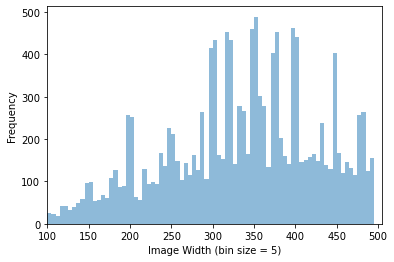

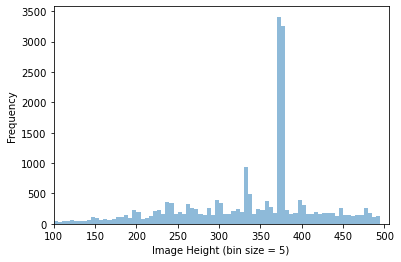

In [6]:
data = image_dimensions[:,0]
bins = np.arange(100, 500, 5) # fixed bin size
plt.xlim([100, 500+5])
plt.hist(data, bins=bins, alpha=0.5)
plt.title('')
plt.xlabel('Image Width (bin size = 5)')
plt.ylabel('Frequency')
plt.show()

data = image_dimensions[:,1]
bins = np.arange(100, 500, 5) # fixed bin size
plt.xlim([100, 500+5])
plt.hist(data, bins=bins, alpha=0.5)
plt.title('')
plt.xlabel('Image Height (bin size = 5)')
plt.ylabel('Frequency')
plt.show()

<h3>Structure Images for ImageDataGenerator</h3>
<img src='images/image_hierarchy.jpg' align='left'>

In [7]:
image_list = glob.glob(str(pathlib.Path('images/raw/train/*')))
move_path = 'images/cats_vs_dogs'
move_categories = ['cat', 'dog']
resize = (128,128)
split = (.8, .1, .1)
ih.move_and_split(image_list, move_path, move_categories, split, resize)

1 : 9955 : images\raw\train\cat.8755.jpg
2 : 9955 : images\raw\train\cat.7025.jpg
3 : 9955 : images\raw\train\cat.2885.jpg
4 : 9955 : images\raw\train\cat.6878.jpg
5 : 9955 : images\raw\train\cat.1757.jpg
6 : 9955 : images\raw\train\cat.10621.jpg
7 : 9955 : images\raw\train\cat.836.jpg
8 : 9955 : images\raw\train\cat.3426.jpg
9 : 9955 : images\raw\train\cat.6716.jpg
10 : 9955 : images\raw\train\cat.5064.jpg
11 : 9955 : images\raw\train\cat.3729.jpg
12 : 9955 : images\raw\train\cat.768.jpg
13 : 9955 : images\raw\train\cat.1735.jpg
14 : 9955 : images\raw\train\cat.779.jpg
15 : 9955 : images\raw\train\cat.1165.jpg
16 : 9955 : images\raw\train\cat.1961.jpg
17 : 9955 : images\raw\train\cat.4806.jpg
18 : 9955 : images\raw\train\cat.2682.jpg
19 : 9955 : images\raw\train\cat.9648.jpg
20 : 9955 : images\raw\train\cat.11726.jpg
21 : 9955 : images\raw\train\cat.11805.jpg
22 : 9955 : images\raw\train\cat.4184.jpg
23 : 9955 : images\raw\train\cat.11629.jpg
24 : 9955 : images\raw\train\cat.12343.jpg

220 : 9955 : images\raw\train\cat.3179.jpg
221 : 9955 : images\raw\train\cat.569.jpg
222 : 9955 : images\raw\train\cat.3068.jpg
223 : 9955 : images\raw\train\cat.4535.jpg
224 : 9955 : images\raw\train\cat.2578.jpg
225 : 9955 : images\raw\train\cat.12478.jpg
226 : 9955 : images\raw\train\cat.6458.jpg
227 : 9955 : images\raw\train\cat.11728.jpg
228 : 9955 : images\raw\train\cat.225.jpg
229 : 9955 : images\raw\train\cat.5853.jpg
230 : 9955 : images\raw\train\cat.1814.jpg
231 : 9955 : images\raw\train\cat.2506.jpg
232 : 9955 : images\raw\train\cat.10152.jpg
233 : 9955 : images\raw\train\cat.11858.jpg
234 : 9955 : images\raw\train\cat.9129.jpg
235 : 9955 : images\raw\train\cat.3740.jpg
236 : 9955 : images\raw\train\cat.7003.jpg
237 : 9955 : images\raw\train\cat.7372.jpg
238 : 9955 : images\raw\train\cat.3438.jpg
239 : 9955 : images\raw\train\cat.7256.jpg
240 : 9955 : images\raw\train\cat.7681.jpg
241 : 9955 : images\raw\train\cat.11557.jpg
242 : 9955 : images\raw\train\cat.2089.jpg
243 : 99

416 : 9955 : images\raw\train\cat.8425.jpg
417 : 9955 : images\raw\train\cat.12231.jpg
418 : 9955 : images\raw\train\cat.1432.jpg
419 : 9955 : images\raw\train\cat.6533.jpg
420 : 9955 : images\raw\train\cat.8578.jpg
421 : 9955 : images\raw\train\cat.4335.jpg
422 : 9955 : images\raw\train\cat.6607.jpg
423 : 9955 : images\raw\train\cat.7744.jpg
424 : 9955 : images\raw\train\cat.10267.jpg
425 : 9955 : images\raw\train\cat.8961.jpg
426 : 9955 : images\raw\train\cat.11822.jpg
427 : 9955 : images\raw\train\cat.1447.jpg
428 : 9955 : images\raw\train\cat.9314.jpg
429 : 9955 : images\raw\train\cat.12120.jpg
430 : 9955 : images\raw\train\cat.5753.jpg
431 : 9955 : images\raw\train\cat.12162.jpg
432 : 9955 : images\raw\train\cat.12157.jpg
433 : 9955 : images\raw\train\cat.4989.jpg
434 : 9955 : images\raw\train\cat.3345.jpg
435 : 9955 : images\raw\train\cat.7905.jpg
436 : 9955 : images\raw\train\cat.1090.jpg
437 : 9955 : images\raw\train\cat.12460.jpg
438 : 9955 : images\raw\train\cat.7288.jpg
439 

608 : 9955 : images\raw\train\cat.11766.jpg
609 : 9955 : images\raw\train\cat.3802.jpg
610 : 9955 : images\raw\train\cat.1499.jpg
611 : 9955 : images\raw\train\cat.458.jpg
612 : 9955 : images\raw\train\cat.12289.jpg
613 : 9955 : images\raw\train\cat.7132.jpg
614 : 9955 : images\raw\train\cat.4528.jpg
615 : 9955 : images\raw\train\cat.2026.jpg
616 : 9955 : images\raw\train\cat.3574.jpg
617 : 9955 : images\raw\train\cat.6666.jpg
618 : 9955 : images\raw\train\cat.783.jpg
619 : 9955 : images\raw\train\cat.5001.jpg
620 : 9955 : images\raw\train\cat.9876.jpg
621 : 9955 : images\raw\train\cat.1613.jpg
622 : 9955 : images\raw\train\cat.8243.jpg
623 : 9955 : images\raw\train\cat.6361.jpg
624 : 9955 : images\raw\train\cat.3209.jpg
625 : 9955 : images\raw\train\cat.1817.jpg
626 : 9955 : images\raw\train\cat.1342.jpg
627 : 9955 : images\raw\train\cat.4437.jpg
628 : 9955 : images\raw\train\cat.4391.jpg
629 : 9955 : images\raw\train\cat.12264.jpg
630 : 9955 : images\raw\train\cat.11609.jpg
631 : 995

819 : 9955 : images\raw\train\cat.9304.jpg
820 : 9955 : images\raw\train\cat.6173.jpg
821 : 9955 : images\raw\train\cat.11723.jpg
822 : 9955 : images\raw\train\cat.11021.jpg
823 : 9955 : images\raw\train\cat.1517.jpg
824 : 9955 : images\raw\train\cat.12389.jpg
825 : 9955 : images\raw\train\cat.6693.jpg
826 : 9955 : images\raw\train\cat.10473.jpg
827 : 9955 : images\raw\train\cat.1662.jpg
828 : 9955 : images\raw\train\cat.6410.jpg
829 : 9955 : images\raw\train\cat.4672.jpg
830 : 9955 : images\raw\train\cat.10231.jpg
831 : 9955 : images\raw\train\cat.4607.jpg
832 : 9955 : images\raw\train\cat.9127.jpg
833 : 9955 : images\raw\train\cat.10247.jpg
834 : 9955 : images\raw\train\cat.10265.jpg
835 : 9955 : images\raw\train\cat.6715.jpg
836 : 9955 : images\raw\train\cat.2157.jpg
837 : 9955 : images\raw\train\cat.9641.jpg
838 : 9955 : images\raw\train\cat.4650.jpg
839 : 9955 : images\raw\train\cat.3013.jpg
840 : 9955 : images\raw\train\cat.5547.jpg
841 : 9955 : images\raw\train\cat.1041.jpg
842 

1032 : 9955 : images\raw\train\cat.8398.jpg
1033 : 9955 : images\raw\train\cat.6934.jpg
1034 : 9955 : images\raw\train\cat.8673.jpg
1035 : 9955 : images\raw\train\cat.4195.jpg
1036 : 9955 : images\raw\train\cat.10261.jpg
1037 : 9955 : images\raw\train\cat.1643.jpg
1038 : 9955 : images\raw\train\cat.447.jpg
1039 : 9955 : images\raw\train\cat.7695.jpg
1040 : 9955 : images\raw\train\cat.3637.jpg
1041 : 9955 : images\raw\train\cat.7285.jpg
1042 : 9955 : images\raw\train\cat.6317.jpg
1043 : 9955 : images\raw\train\cat.5445.jpg
1044 : 9955 : images\raw\train\cat.1579.jpg
1045 : 9955 : images\raw\train\cat.7854.jpg
1046 : 9955 : images\raw\train\cat.1609.jpg
1047 : 9955 : images\raw\train\cat.50.jpg
1048 : 9955 : images\raw\train\cat.1158.jpg
1049 : 9955 : images\raw\train\cat.3376.jpg
1050 : 9955 : images\raw\train\cat.3980.jpg
1051 : 9955 : images\raw\train\cat.6591.jpg
1052 : 9955 : images\raw\train\cat.1086.jpg
1053 : 9955 : images\raw\train\cat.4315.jpg
1054 : 9955 : images\raw\train\cat

1238 : 9955 : images\raw\train\cat.9532.jpg
1239 : 9955 : images\raw\train\cat.11849.jpg
1240 : 9955 : images\raw\train\cat.9271.jpg
1241 : 9955 : images\raw\train\cat.7947.jpg
1242 : 9955 : images\raw\train\cat.5891.jpg
1243 : 9955 : images\raw\train\cat.1398.jpg
1244 : 9955 : images\raw\train\cat.1106.jpg
1245 : 9955 : images\raw\train\cat.6802.jpg
1246 : 9955 : images\raw\train\cat.6180.jpg
1247 : 9955 : images\raw\train\cat.10226.jpg
1248 : 9955 : images\raw\train\cat.4111.jpg
1249 : 9955 : images\raw\train\cat.9810.jpg
1250 : 9955 : images\raw\train\cat.1060.jpg
1251 : 9955 : images\raw\train\cat.3937.jpg
1252 : 9955 : images\raw\train\cat.4336.jpg
1253 : 9955 : images\raw\train\cat.3948.jpg
1254 : 9955 : images\raw\train\cat.6004.jpg
1255 : 9955 : images\raw\train\cat.2107.jpg
1256 : 9955 : images\raw\train\cat.1885.jpg
1257 : 9955 : images\raw\train\cat.8811.jpg
1258 : 9955 : images\raw\train\cat.7215.jpg
1259 : 9955 : images\raw\train\cat.3685.jpg
1260 : 9955 : images\raw\train

1435 : 9955 : images\raw\train\cat.2290.jpg
1436 : 9955 : images\raw\train\cat.280.jpg
1437 : 9955 : images\raw\train\cat.11857.jpg
1438 : 9955 : images\raw\train\cat.11140.jpg
1439 : 9955 : images\raw\train\cat.248.jpg
1440 : 9955 : images\raw\train\cat.7793.jpg
1441 : 9955 : images\raw\train\cat.3182.jpg
1442 : 9955 : images\raw\train\cat.10253.jpg
1443 : 9955 : images\raw\train\cat.6417.jpg
1444 : 9955 : images\raw\train\cat.39.jpg
1445 : 9955 : images\raw\train\cat.7040.jpg
1446 : 9955 : images\raw\train\cat.3082.jpg
1447 : 9955 : images\raw\train\cat.5188.jpg
1448 : 9955 : images\raw\train\cat.8442.jpg
1449 : 9955 : images\raw\train\cat.5991.jpg
1450 : 9955 : images\raw\train\cat.992.jpg
1451 : 9955 : images\raw\train\cat.10274.jpg
1452 : 9955 : images\raw\train\cat.5414.jpg
1453 : 9955 : images\raw\train\cat.890.jpg
1454 : 9955 : images\raw\train\cat.11824.jpg
1455 : 9955 : images\raw\train\cat.4919.jpg
1456 : 9955 : images\raw\train\cat.379.jpg
1457 : 9955 : images\raw\train\cat

1622 : 9955 : images\raw\train\cat.6189.jpg
1623 : 9955 : images\raw\train\cat.1125.jpg
1624 : 9955 : images\raw\train\cat.12372.jpg
1625 : 9955 : images\raw\train\cat.12269.jpg
1626 : 9955 : images\raw\train\cat.10230.jpg
1627 : 9955 : images\raw\train\cat.10749.jpg
1628 : 9955 : images\raw\train\cat.11339.jpg
1629 : 9955 : images\raw\train\cat.10383.jpg
1630 : 9955 : images\raw\train\cat.1035.jpg
1631 : 9955 : images\raw\train\cat.1321.jpg
1632 : 9955 : images\raw\train\cat.7718.jpg
1633 : 9955 : images\raw\train\cat.8508.jpg
1634 : 9955 : images\raw\train\cat.7517.jpg
1635 : 9955 : images\raw\train\cat.2446.jpg
1636 : 9955 : images\raw\train\cat.2742.jpg
1637 : 9955 : images\raw\train\cat.9289.jpg
1638 : 9955 : images\raw\train\cat.9904.jpg
1639 : 9955 : images\raw\train\cat.11749.jpg
1640 : 9955 : images\raw\train\cat.9482.jpg
1641 : 9955 : images\raw\train\cat.10506.jpg
1642 : 9955 : images\raw\train\cat.3307.jpg
1643 : 9955 : images\raw\train\cat.1952.jpg
1644 : 9955 : images\raw

1813 : 9955 : images\raw\train\cat.8365.jpg
1814 : 9955 : images\raw\train\cat.6997.jpg
1815 : 9955 : images\raw\train\cat.309.jpg
1816 : 9955 : images\raw\train\cat.1837.jpg
1817 : 9955 : images\raw\train\cat.11758.jpg
1818 : 9955 : images\raw\train\cat.8094.jpg
1819 : 9955 : images\raw\train\cat.82.jpg
1820 : 9955 : images\raw\train\cat.2740.jpg
1821 : 9955 : images\raw\train\cat.11329.jpg
1822 : 9955 : images\raw\train\cat.10992.jpg
1823 : 9955 : images\raw\train\cat.11504.jpg
1824 : 9955 : images\raw\train\cat.2459.jpg
1825 : 9955 : images\raw\train\cat.7231.jpg
1826 : 9955 : images\raw\train\cat.9184.jpg
1827 : 9955 : images\raw\train\cat.9828.jpg
1828 : 9955 : images\raw\train\cat.4952.jpg
1829 : 9955 : images\raw\train\cat.11353.jpg
1830 : 9955 : images\raw\train\cat.522.jpg
1831 : 9955 : images\raw\train\cat.6917.jpg
1832 : 9955 : images\raw\train\cat.5035.jpg
1833 : 9955 : images\raw\train\cat.611.jpg
1834 : 9955 : images\raw\train\cat.355.jpg
1835 : 9955 : images\raw\train\ca

2019 : 9955 : images\raw\train\cat.6175.jpg
2020 : 9955 : images\raw\train\cat.7203.jpg
2021 : 9955 : images\raw\train\cat.7311.jpg
2022 : 9955 : images\raw\train\cat.8762.jpg
2023 : 9955 : images\raw\train\cat.6482.jpg
2024 : 9955 : images\raw\train\cat.1440.jpg
2025 : 9955 : images\raw\train\cat.9440.jpg
2026 : 9955 : images\raw\train\cat.5456.jpg
2027 : 9955 : images\raw\train\cat.5377.jpg
2028 : 9955 : images\raw\train\cat.5861.jpg
2029 : 9955 : images\raw\train\cat.2648.jpg
2030 : 9955 : images\raw\train\cat.8642.jpg
2031 : 9955 : images\raw\train\cat.2316.jpg
2032 : 9955 : images\raw\train\cat.8523.jpg
2033 : 9955 : images\raw\train\cat.2681.jpg
2034 : 9955 : images\raw\train\cat.10088.jpg
2035 : 9955 : images\raw\train\cat.8951.jpg
2036 : 9955 : images\raw\train\cat.8430.jpg
2037 : 9955 : images\raw\train\cat.674.jpg
2038 : 9955 : images\raw\train\cat.9853.jpg
2039 : 9955 : images\raw\train\cat.8680.jpg
2040 : 9955 : images\raw\train\cat.9763.jpg
2041 : 9955 : images\raw\train\c

2227 : 9955 : images\raw\train\cat.12186.jpg
2228 : 9955 : images\raw\train\cat.5937.jpg
2229 : 9955 : images\raw\train\cat.3336.jpg
2230 : 9955 : images\raw\train\cat.12482.jpg
2231 : 9955 : images\raw\train\cat.4857.jpg
2232 : 9955 : images\raw\train\cat.538.jpg
2233 : 9955 : images\raw\train\cat.1480.jpg
2234 : 9955 : images\raw\train\cat.7996.jpg
2235 : 9955 : images\raw\train\cat.1631.jpg
2236 : 9955 : images\raw\train\cat.6319.jpg
2237 : 9955 : images\raw\train\cat.3715.jpg
2238 : 9955 : images\raw\train\cat.1997.jpg
2239 : 9955 : images\raw\train\cat.6177.jpg
2240 : 9955 : images\raw\train\cat.5971.jpg
2241 : 9955 : images\raw\train\cat.7735.jpg
2242 : 9955 : images\raw\train\cat.11556.jpg
2243 : 9955 : images\raw\train\cat.1473.jpg
2244 : 9955 : images\raw\train\cat.4344.jpg
2245 : 9955 : images\raw\train\cat.306.jpg
2246 : 9955 : images\raw\train\cat.6287.jpg
2247 : 9955 : images\raw\train\cat.7704.jpg
2248 : 9955 : images\raw\train\cat.5882.jpg
2249 : 9955 : images\raw\train\

2417 : 9955 : images\raw\train\cat.12084.jpg
2418 : 9955 : images\raw\train\cat.8212.jpg
2419 : 9955 : images\raw\train\cat.7803.jpg
2420 : 9955 : images\raw\train\cat.1916.jpg
2421 : 9955 : images\raw\train\cat.9617.jpg
2422 : 9955 : images\raw\train\cat.8941.jpg
2423 : 9955 : images\raw\train\cat.2572.jpg
2424 : 9955 : images\raw\train\cat.2976.jpg
2425 : 9955 : images\raw\train\cat.10531.jpg
2426 : 9955 : images\raw\train\cat.12237.jpg
2427 : 9955 : images\raw\train\cat.12193.jpg
2428 : 9955 : images\raw\train\cat.6313.jpg
2429 : 9955 : images\raw\train\cat.7692.jpg
2430 : 9955 : images\raw\train\cat.363.jpg
2431 : 9955 : images\raw\train\cat.5498.jpg
2432 : 9955 : images\raw\train\cat.526.jpg
2433 : 9955 : images\raw\train\cat.3902.jpg
2434 : 9955 : images\raw\train\cat.3074.jpg
2435 : 9955 : images\raw\train\cat.1174.jpg
2436 : 9955 : images\raw\train\cat.10209.jpg
2437 : 9955 : images\raw\train\cat.6492.jpg
2438 : 9955 : images\raw\train\cat.12050.jpg
2439 : 9955 : images\raw\tra

2609 : 9955 : images\raw\train\cat.4646.jpg
2610 : 9955 : images\raw\train\cat.7888.jpg
2611 : 9955 : images\raw\train\cat.10424.jpg
2612 : 9955 : images\raw\train\cat.1089.jpg
2613 : 9955 : images\raw\train\cat.9609.jpg
2614 : 9955 : images\raw\train\cat.9603.jpg
2615 : 9955 : images\raw\train\cat.3175.jpg
2616 : 9955 : images\raw\train\cat.1689.jpg
2617 : 9955 : images\raw\train\cat.8310.jpg
2618 : 9955 : images\raw\train\cat.3293.jpg
2619 : 9955 : images\raw\train\cat.9180.jpg
2620 : 9955 : images\raw\train\cat.5777.jpg
2621 : 9955 : images\raw\train\cat.9310.jpg
2622 : 9955 : images\raw\train\cat.4915.jpg
2623 : 9955 : images\raw\train\cat.4544.jpg
2624 : 9955 : images\raw\train\cat.11600.jpg
2625 : 9955 : images\raw\train\cat.10655.jpg
2626 : 9955 : images\raw\train\cat.5045.jpg
2627 : 9955 : images\raw\train\cat.9401.jpg
2628 : 9955 : images\raw\train\cat.929.jpg
2629 : 9955 : images\raw\train\cat.12455.jpg
2630 : 9955 : images\raw\train\cat.450.jpg
2631 : 9955 : images\raw\train

2806 : 9955 : images\raw\train\cat.8451.jpg
2807 : 9955 : images\raw\train\cat.12440.jpg
2808 : 9955 : images\raw\train\cat.1264.jpg
2809 : 9955 : images\raw\train\cat.8228.jpg
2810 : 9955 : images\raw\train\cat.6705.jpg
2811 : 9955 : images\raw\train\cat.11531.jpg
2812 : 9955 : images\raw\train\cat.10007.jpg
2813 : 9955 : images\raw\train\cat.5187.jpg
2814 : 9955 : images\raw\train\cat.1532.jpg
2815 : 9955 : images\raw\train\cat.8621.jpg
2816 : 9955 : images\raw\train\cat.4578.jpg
2817 : 9955 : images\raw\train\cat.6813.jpg
2818 : 9955 : images\raw\train\cat.10101.jpg
2819 : 9955 : images\raw\train\cat.6902.jpg
2820 : 9955 : images\raw\train\cat.1209.jpg
2821 : 9955 : images\raw\train\cat.4214.jpg
2822 : 9955 : images\raw\train\cat.11451.jpg
2823 : 9955 : images\raw\train\cat.1406.jpg
2824 : 9955 : images\raw\train\cat.3018.jpg
2825 : 9955 : images\raw\train\cat.12370.jpg
2826 : 9955 : images\raw\train\cat.3573.jpg
2827 : 9955 : images\raw\train\cat.5663.jpg
2828 : 9955 : images\raw\t

3014 : 9955 : images\raw\train\cat.11421.jpg
3015 : 9955 : images\raw\train\cat.11245.jpg
3016 : 9955 : images\raw\train\cat.12059.jpg
3017 : 9955 : images\raw\train\cat.6462.jpg
3018 : 9955 : images\raw\train\cat.5356.jpg
3019 : 9955 : images\raw\train\cat.5155.jpg
3020 : 9955 : images\raw\train\cat.6805.jpg
3021 : 9955 : images\raw\train\cat.8771.jpg
3022 : 9955 : images\raw\train\cat.3155.jpg
3023 : 9955 : images\raw\train\cat.9109.jpg
3024 : 9955 : images\raw\train\cat.4732.jpg
3025 : 9955 : images\raw\train\cat.11246.jpg
3026 : 9955 : images\raw\train\cat.11192.jpg
3027 : 9955 : images\raw\train\cat.1283.jpg
3028 : 9955 : images\raw\train\cat.8990.jpg
3029 : 9955 : images\raw\train\cat.1590.jpg
3030 : 9955 : images\raw\train\cat.3366.jpg
3031 : 9955 : images\raw\train\cat.6488.jpg
3032 : 9955 : images\raw\train\cat.4613.jpg
3033 : 9955 : images\raw\train\cat.4781.jpg
3034 : 9955 : images\raw\train\cat.9655.jpg
3035 : 9955 : images\raw\train\cat.2103.jpg
3036 : 9955 : images\raw\tr

3225 : 9955 : images\raw\train\cat.7953.jpg
3226 : 9955 : images\raw\train\cat.223.jpg
3227 : 9955 : images\raw\train\cat.3434.jpg
3228 : 9955 : images\raw\train\cat.8052.jpg
3229 : 9955 : images\raw\train\cat.7921.jpg
3230 : 9955 : images\raw\train\cat.9882.jpg
3231 : 9955 : images\raw\train\cat.5231.jpg
3232 : 9955 : images\raw\train\cat.9645.jpg
3233 : 9955 : images\raw\train\cat.5479.jpg
3234 : 9955 : images\raw\train\cat.6131.jpg
3235 : 9955 : images\raw\train\cat.5483.jpg
3236 : 9955 : images\raw\train\cat.1854.jpg
3237 : 9955 : images\raw\train\cat.8255.jpg
3238 : 9955 : images\raw\train\cat.3509.jpg
3239 : 9955 : images\raw\train\cat.9458.jpg
3240 : 9955 : images\raw\train\cat.6297.jpg
3241 : 9955 : images\raw\train\cat.8818.jpg
3242 : 9955 : images\raw\train\cat.673.jpg
3243 : 9955 : images\raw\train\cat.5038.jpg
3244 : 9955 : images\raw\train\cat.10979.jpg
3245 : 9955 : images\raw\train\cat.3754.jpg
3246 : 9955 : images\raw\train\cat.4416.jpg
3247 : 9955 : images\raw\train\ca

3418 : 9955 : images\raw\train\cat.10856.jpg
3419 : 9955 : images\raw\train\cat.1002.jpg
3420 : 9955 : images\raw\train\cat.8316.jpg
3421 : 9955 : images\raw\train\cat.2265.jpg
3422 : 9955 : images\raw\train\cat.1426.jpg
3423 : 9955 : images\raw\train\cat.7840.jpg
3424 : 9955 : images\raw\train\cat.3515.jpg
3425 : 9955 : images\raw\train\cat.10934.jpg
3426 : 9955 : images\raw\train\cat.508.jpg
3427 : 9955 : images\raw\train\cat.6768.jpg
3428 : 9955 : images\raw\train\cat.6356.jpg
3429 : 9955 : images\raw\train\cat.8931.jpg
3430 : 9955 : images\raw\train\cat.2751.jpg
3431 : 9955 : images\raw\train\cat.10505.jpg
3432 : 9955 : images\raw\train\cat.11365.jpg
3433 : 9955 : images\raw\train\cat.1652.jpg
3434 : 9955 : images\raw\train\cat.953.jpg
3435 : 9955 : images\raw\train\cat.5.jpg
3436 : 9955 : images\raw\train\cat.1123.jpg
3437 : 9955 : images\raw\train\cat.7184.jpg
3438 : 9955 : images\raw\train\cat.9456.jpg
3439 : 9955 : images\raw\train\cat.5827.jpg
3440 : 9955 : images\raw\train\ca

3632 : 9955 : images\raw\train\cat.9831.jpg
3633 : 9955 : images\raw\train\cat.7595.jpg
3634 : 9955 : images\raw\train\cat.10010.jpg
3635 : 9955 : images\raw\train\cat.12265.jpg
3636 : 9955 : images\raw\train\cat.11060.jpg
3637 : 9955 : images\raw\train\cat.2315.jpg
3638 : 9955 : images\raw\train\cat.4802.jpg
3639 : 9955 : images\raw\train\cat.3127.jpg
3640 : 9955 : images\raw\train\cat.12299.jpg
3641 : 9955 : images\raw\train\cat.5290.jpg
3642 : 9955 : images\raw\train\cat.3274.jpg
3643 : 9955 : images\raw\train\cat.240.jpg
3644 : 9955 : images\raw\train\cat.10800.jpg
3645 : 9955 : images\raw\train\cat.4772.jpg
3646 : 9955 : images\raw\train\cat.3702.jpg
3647 : 9955 : images\raw\train\cat.8193.jpg
3648 : 9955 : images\raw\train\cat.871.jpg
3649 : 9955 : images\raw\train\cat.2223.jpg
3650 : 9955 : images\raw\train\cat.7194.jpg
3651 : 9955 : images\raw\train\cat.2130.jpg
3652 : 9955 : images\raw\train\cat.925.jpg
3653 : 9955 : images\raw\train\cat.1747.jpg
3654 : 9955 : images\raw\train

3818 : 9955 : images\raw\train\cat.1573.jpg
3819 : 9955 : images\raw\train\cat.2211.jpg
3820 : 9955 : images\raw\train\cat.5712.jpg
3821 : 9955 : images\raw\train\cat.703.jpg
3822 : 9955 : images\raw\train\cat.9878.jpg
3823 : 9955 : images\raw\train\cat.2616.jpg
3824 : 9955 : images\raw\train\cat.8353.jpg
3825 : 9955 : images\raw\train\cat.9557.jpg
3826 : 9955 : images\raw\train\cat.11028.jpg
3827 : 9955 : images\raw\train\cat.3008.jpg
3828 : 9955 : images\raw\train\cat.6898.jpg
3829 : 9955 : images\raw\train\cat.9335.jpg
3830 : 9955 : images\raw\train\cat.7151.jpg
3831 : 9955 : images\raw\train\cat.7834.jpg
3832 : 9955 : images\raw\train\cat.5025.jpg
3833 : 9955 : images\raw\train\cat.1554.jpg
3834 : 9955 : images\raw\train\cat.3212.jpg
3835 : 9955 : images\raw\train\cat.7807.jpg
3836 : 9955 : images\raw\train\cat.10029.jpg
3837 : 9955 : images\raw\train\cat.6031.jpg
3838 : 9955 : images\raw\train\cat.10098.jpg
3839 : 9955 : images\raw\train\cat.2889.jpg
3840 : 9955 : images\raw\train

4017 : 9955 : images\raw\train\cat.723.jpg
4018 : 9955 : images\raw\train\cat.12247.jpg
4019 : 9955 : images\raw\train\cat.9955.jpg
4020 : 9955 : images\raw\train\cat.9832.jpg
4021 : 9955 : images\raw\train\cat.152.jpg
4022 : 9955 : images\raw\train\cat.10364.jpg
4023 : 9955 : images\raw\train\cat.11052.jpg
4024 : 9955 : images\raw\train\cat.1428.jpg
4025 : 9955 : images\raw\train\cat.6476.jpg
4026 : 9955 : images\raw\train\cat.2743.jpg
4027 : 9955 : images\raw\train\cat.12172.jpg
4028 : 9955 : images\raw\train\cat.6404.jpg
4029 : 9955 : images\raw\train\cat.7980.jpg
4030 : 9955 : images\raw\train\cat.11413.jpg
4031 : 9955 : images\raw\train\cat.12473.jpg
4032 : 9955 : images\raw\train\cat.3872.jpg
4033 : 9955 : images\raw\train\cat.1183.jpg
4034 : 9955 : images\raw\train\cat.7355.jpg
4035 : 9955 : images\raw\train\cat.11684.jpg
4036 : 9955 : images\raw\train\cat.8608.jpg
4037 : 9955 : images\raw\train\cat.394.jpg
4038 : 9955 : images\raw\train\cat.4624.jpg
4039 : 9955 : images\raw\tra

4208 : 9955 : images\raw\train\cat.3548.jpg
4209 : 9955 : images\raw\train\cat.187.jpg
4210 : 9955 : images\raw\train\cat.10708.jpg
4211 : 9955 : images\raw\train\cat.3277.jpg
4212 : 9955 : images\raw\train\cat.403.jpg
4213 : 9955 : images\raw\train\cat.3393.jpg
4214 : 9955 : images\raw\train\cat.1108.jpg
4215 : 9955 : images\raw\train\cat.12297.jpg
4216 : 9955 : images\raw\train\cat.1989.jpg
4217 : 9955 : images\raw\train\cat.4492.jpg
4218 : 9955 : images\raw\train\cat.9466.jpg
4219 : 9955 : images\raw\train\cat.7889.jpg
4220 : 9955 : images\raw\train\cat.10812.jpg
4221 : 9955 : images\raw\train\cat.10899.jpg
4222 : 9955 : images\raw\train\cat.11048.jpg
4223 : 9955 : images\raw\train\cat.4182.jpg
4224 : 9955 : images\raw\train\cat.5979.jpg
4225 : 9955 : images\raw\train\cat.10076.jpg
4226 : 9955 : images\raw\train\cat.11312.jpg
4227 : 9955 : images\raw\train\cat.5635.jpg
4228 : 9955 : images\raw\train\cat.9601.jpg
4229 : 9955 : images\raw\train\cat.4460.jpg
4230 : 9955 : images\raw\tr

4412 : 9955 : images\raw\train\cat.9924.jpg
4413 : 9955 : images\raw\train\cat.6788.jpg
4414 : 9955 : images\raw\train\cat.7134.jpg
4415 : 9955 : images\raw\train\cat.8766.jpg
4416 : 9955 : images\raw\train\cat.4291.jpg
4417 : 9955 : images\raw\train\cat.10926.jpg
4418 : 9955 : images\raw\train\cat.7592.jpg
4419 : 9955 : images\raw\train\cat.7049.jpg
4420 : 9955 : images\raw\train\cat.10824.jpg
4421 : 9955 : images\raw\train\cat.5471.jpg
4422 : 9955 : images\raw\train\cat.5209.jpg
4423 : 9955 : images\raw\train\cat.10136.jpg
4424 : 9955 : images\raw\train\cat.5849.jpg
4425 : 9955 : images\raw\train\cat.10155.jpg
4426 : 9955 : images\raw\train\cat.7544.jpg
4427 : 9955 : images\raw\train\cat.9369.jpg
4428 : 9955 : images\raw\train\cat.3109.jpg
4429 : 9955 : images\raw\train\cat.12093.jpg
4430 : 9955 : images\raw\train\cat.2936.jpg
4431 : 9955 : images\raw\train\cat.3061.jpg
4432 : 9955 : images\raw\train\cat.8976.jpg
4433 : 9955 : images\raw\train\cat.6337.jpg
4434 : 9955 : images\raw\tr

4602 : 9955 : images\raw\train\cat.4377.jpg
4603 : 9955 : images\raw\train\cat.984.jpg
4604 : 9955 : images\raw\train\cat.10625.jpg
4605 : 9955 : images\raw\train\cat.9490.jpg
4606 : 9955 : images\raw\train\cat.7196.jpg
4607 : 9955 : images\raw\train\cat.7252.jpg
4608 : 9955 : images\raw\train\cat.1242.jpg
4609 : 9955 : images\raw\train\cat.11160.jpg
4610 : 9955 : images\raw\train\cat.4443.jpg
4611 : 9955 : images\raw\train\cat.5346.jpg
4612 : 9955 : images\raw\train\cat.8511.jpg
4613 : 9955 : images\raw\train\cat.8772.jpg
4614 : 9955 : images\raw\train\cat.5481.jpg
4615 : 9955 : images\raw\train\cat.3678.jpg
4616 : 9955 : images\raw\train\cat.11125.jpg
4617 : 9955 : images\raw\train\cat.2669.jpg
4618 : 9955 : images\raw\train\cat.4717.jpg
4619 : 9955 : images\raw\train\cat.553.jpg
4620 : 9955 : images\raw\train\cat.3772.jpg
4621 : 9955 : images\raw\train\cat.8586.jpg
4622 : 9955 : images\raw\train\cat.8620.jpg
4623 : 9955 : images\raw\train\cat.8372.jpg
4624 : 9955 : images\raw\train\

4804 : 9955 : images\raw\train\cat.11640.jpg
4805 : 9955 : images\raw\train\cat.6689.jpg
4806 : 9955 : images\raw\train\cat.511.jpg
4807 : 9955 : images\raw\train\cat.11738.jpg
4808 : 9955 : images\raw\train\cat.1489.jpg
4809 : 9955 : images\raw\train\cat.12154.jpg
4810 : 9955 : images\raw\train\cat.12161.jpg
4811 : 9955 : images\raw\train\cat.3035.jpg
4812 : 9955 : images\raw\train\cat.11099.jpg
4813 : 9955 : images\raw\train\cat.6949.jpg
4814 : 9955 : images\raw\train\cat.4526.jpg
4815 : 9955 : images\raw\train\cat.3770.jpg
4816 : 9955 : images\raw\train\cat.2125.jpg
4817 : 9955 : images\raw\train\cat.5218.jpg
4818 : 9955 : images\raw\train\cat.3812.jpg
4819 : 9955 : images\raw\train\cat.656.jpg
4820 : 9955 : images\raw\train\cat.1620.jpg
4821 : 9955 : images\raw\train\cat.3380.jpg
4822 : 9955 : images\raw\train\cat.284.jpg
4823 : 9955 : images\raw\train\cat.9502.jpg
4824 : 9955 : images\raw\train\cat.4503.jpg
4825 : 9955 : images\raw\train\cat.6320.jpg
4826 : 9955 : images\raw\train

5006 : 9955 : images\raw\train\cat.8632.jpg
5007 : 9955 : images\raw\train\cat.10792.jpg
5008 : 9955 : images\raw\train\cat.7429.jpg
5009 : 9955 : images\raw\train\cat.905.jpg
5010 : 9955 : images\raw\train\cat.2707.jpg
5011 : 9955 : images\raw\train\cat.4874.jpg
5012 : 9955 : images\raw\train\cat.7891.jpg
5013 : 9955 : images\raw\train\cat.5284.jpg
5014 : 9955 : images\raw\train\cat.11148.jpg
5015 : 9955 : images\raw\train\cat.1335.jpg
5016 : 9955 : images\raw\train\cat.1452.jpg
5017 : 9955 : images\raw\train\cat.2644.jpg
5018 : 9955 : images\raw\train\cat.7766.jpg
5019 : 9955 : images\raw\train\cat.3198.jpg
5020 : 9955 : images\raw\train\cat.446.jpg
5021 : 9955 : images\raw\train\cat.12261.jpg
5022 : 9955 : images\raw\train\cat.4921.jpg
5023 : 9955 : images\raw\train\cat.640.jpg
5024 : 9955 : images\raw\train\cat.202.jpg
5025 : 9955 : images\raw\train\cat.9938.jpg
5026 : 9955 : images\raw\train\cat.3669.jpg
5027 : 9955 : images\raw\train\cat.7473.jpg
5028 : 9955 : images\raw\train\ca

5198 : 9955 : images\raw\train\cat.230.jpg
5199 : 9955 : images\raw\train\cat.6274.jpg
5200 : 9955 : images\raw\train\cat.4294.jpg
5201 : 9955 : images\raw\train\cat.3560.jpg
5202 : 9955 : images\raw\train\cat.3333.jpg
5203 : 9955 : images\raw\train\cat.10282.jpg
5204 : 9955 : images\raw\train\cat.383.jpg
5205 : 9955 : images\raw\train\cat.3495.jpg
5206 : 9955 : images\raw\train\cat.3022.jpg
5207 : 9955 : images\raw\train\cat.1788.jpg
5208 : 9955 : images\raw\train\cat.1136.jpg
5209 : 9955 : images\raw\train\cat.17.jpg
5210 : 9955 : images\raw\train\cat.6875.jpg
5211 : 9955 : images\raw\train\cat.4073.jpg
5212 : 9955 : images\raw\train\cat.5631.jpg
5213 : 9955 : images\raw\train\cat.7966.jpg
5214 : 9955 : images\raw\train\cat.1204.jpg
5215 : 9955 : images\raw\train\cat.3481.jpg
5216 : 9955 : images\raw\train\cat.6971.jpg
5217 : 9955 : images\raw\train\cat.4960.jpg
5218 : 9955 : images\raw\train\cat.5918.jpg
5219 : 9955 : images\raw\train\cat.7523.jpg
5220 : 9955 : images\raw\train\cat.

5409 : 9955 : images\raw\train\cat.6834.jpg
5410 : 9955 : images\raw\train\cat.11431.jpg
5411 : 9955 : images\raw\train\cat.4332.jpg
5412 : 9955 : images\raw\train\cat.5315.jpg
5413 : 9955 : images\raw\train\cat.10781.jpg
5414 : 9955 : images\raw\train\cat.7443.jpg
5415 : 9955 : images\raw\train\cat.3534.jpg
5416 : 9955 : images\raw\train\cat.6355.jpg
5417 : 9955 : images\raw\train\cat.5239.jpg
5418 : 9955 : images\raw\train\cat.5586.jpg
5419 : 9955 : images\raw\train\cat.2559.jpg
5420 : 9955 : images\raw\train\cat.9701.jpg
5421 : 9955 : images\raw\train\cat.8184.jpg
5422 : 9955 : images\raw\train\cat.10308.jpg
5423 : 9955 : images\raw\train\cat.2082.jpg
5424 : 9955 : images\raw\train\cat.2335.jpg
5425 : 9955 : images\raw\train\cat.2171.jpg
5426 : 9955 : images\raw\train\cat.4231.jpg
5427 : 9955 : images\raw\train\cat.384.jpg
5428 : 9955 : images\raw\train\cat.12427.jpg
5429 : 9955 : images\raw\train\cat.6301.jpg
5430 : 9955 : images\raw\train\cat.8947.jpg
5431 : 9955 : images\raw\trai

5619 : 9955 : images\raw\train\cat.8863.jpg
5620 : 9955 : images\raw\train\cat.8132.jpg
5621 : 9955 : images\raw\train\cat.10224.jpg
5622 : 9955 : images\raw\train\cat.1647.jpg
5623 : 9955 : images\raw\train\cat.10147.jpg
5624 : 9955 : images\raw\train\cat.529.jpg
5625 : 9955 : images\raw\train\cat.11648.jpg
5626 : 9955 : images\raw\train\cat.10771.jpg
5627 : 9955 : images\raw\train\cat.2191.jpg
5628 : 9955 : images\raw\train\cat.4782.jpg
5629 : 9955 : images\raw\train\cat.6894.jpg
5630 : 9955 : images\raw\train\cat.6451.jpg
5631 : 9955 : images\raw\train\cat.799.jpg
5632 : 9955 : images\raw\train\cat.3777.jpg
5633 : 9955 : images\raw\train\cat.1372.jpg
5634 : 9955 : images\raw\train\cat.9092.jpg
5635 : 9955 : images\raw\train\cat.43.jpg
5636 : 9955 : images\raw\train\cat.6265.jpg
5637 : 9955 : images\raw\train\cat.9088.jpg
5638 : 9955 : images\raw\train\cat.5790.jpg
5639 : 9955 : images\raw\train\cat.3673.jpg
5640 : 9955 : images\raw\train\cat.2702.jpg
5641 : 9955 : images\raw\train\c

5807 : 9955 : images\raw\train\cat.3838.jpg
5808 : 9955 : images\raw\train\cat.8835.jpg
5809 : 9955 : images\raw\train\cat.8815.jpg
5810 : 9955 : images\raw\train\cat.77.jpg
5811 : 9955 : images\raw\train\cat.3121.jpg
5812 : 9955 : images\raw\train\cat.10681.jpg
5813 : 9955 : images\raw\train\cat.3818.jpg
5814 : 9955 : images\raw\train\cat.1515.jpg
5815 : 9955 : images\raw\train\cat.12097.jpg
5816 : 9955 : images\raw\train\cat.12068.jpg
5817 : 9955 : images\raw\train\cat.3944.jpg
5818 : 9955 : images\raw\train\cat.5903.jpg
5819 : 9955 : images\raw\train\cat.4306.jpg
5820 : 9955 : images\raw\train\cat.4850.jpg
5821 : 9955 : images\raw\train\cat.2734.jpg
5822 : 9955 : images\raw\train\cat.2545.jpg
5823 : 9955 : images\raw\train\cat.278.jpg
5824 : 9955 : images\raw\train\cat.243.jpg
5825 : 9955 : images\raw\train\cat.9368.jpg
5826 : 9955 : images\raw\train\cat.34.jpg
5827 : 9955 : images\raw\train\cat.4394.jpg
5828 : 9955 : images\raw\train\cat.305.jpg
5829 : 9955 : images\raw\train\cat.3

6014 : 9955 : images\raw\train\cat.7300.jpg
6015 : 9955 : images\raw\train\cat.4595.jpg
6016 : 9955 : images\raw\train\cat.10002.jpg
6017 : 9955 : images\raw\train\cat.5679.jpg
6018 : 9955 : images\raw\train\cat.3971.jpg
6019 : 9955 : images\raw\train\cat.2787.jpg
6020 : 9955 : images\raw\train\cat.8933.jpg
6021 : 9955 : images\raw\train\cat.11054.jpg
6022 : 9955 : images\raw\train\cat.9915.jpg
6023 : 9955 : images\raw\train\cat.4961.jpg
6024 : 9955 : images\raw\train\cat.2019.jpg
6025 : 9955 : images\raw\train\cat.380.jpg
6026 : 9955 : images\raw\train\cat.5618.jpg
6027 : 9955 : images\raw\train\cat.9874.jpg
6028 : 9955 : images\raw\train\cat.3994.jpg
6029 : 9955 : images\raw\train\cat.5379.jpg
6030 : 9955 : images\raw\train\cat.12472.jpg
6031 : 9955 : images\raw\train\cat.5328.jpg
6032 : 9955 : images\raw\train\cat.5574.jpg
6033 : 9955 : images\raw\train\cat.9474.jpg
6034 : 9955 : images\raw\train\cat.4653.jpg
6035 : 9955 : images\raw\train\cat.4737.jpg
6036 : 9955 : images\raw\train

6205 : 9955 : images\raw\train\cat.3265.jpg
6206 : 9955 : images\raw\train\cat.1053.jpg
6207 : 9955 : images\raw\train\cat.2145.jpg
6208 : 9955 : images\raw\train\cat.939.jpg
6209 : 9955 : images\raw\train\cat.626.jpg
6210 : 9955 : images\raw\train\cat.4582.jpg
6211 : 9955 : images\raw\train\cat.10288.jpg
6212 : 9955 : images\raw\train\cat.7792.jpg
6213 : 9955 : images\raw\train\cat.2049.jpg
6214 : 9955 : images\raw\train\cat.7209.jpg
6215 : 9955 : images\raw\train\cat.10.jpg
6216 : 9955 : images\raw\train\cat.3884.jpg
6217 : 9955 : images\raw\train\cat.11816.jpg
6218 : 9955 : images\raw\train\cat.9114.jpg
6219 : 9955 : images\raw\train\cat.7190.jpg
6220 : 9955 : images\raw\train\cat.10328.jpg
6221 : 9955 : images\raw\train\cat.6425.jpg
6222 : 9955 : images\raw\train\cat.9768.jpg
6223 : 9955 : images\raw\train\cat.10831.jpg
6224 : 9955 : images\raw\train\cat.8524.jpg
6225 : 9955 : images\raw\train\cat.7152.jpg
6226 : 9955 : images\raw\train\cat.3250.jpg
6227 : 9955 : images\raw\train\c

6417 : 9955 : images\raw\train\cat.11923.jpg
6418 : 9955 : images\raw\train\cat.9891.jpg
6419 : 9955 : images\raw\train\cat.3960.jpg
6420 : 9955 : images\raw\train\cat.1977.jpg
6421 : 9955 : images\raw\train\cat.1091.jpg
6422 : 9955 : images\raw\train\cat.11895.jpg
6423 : 9955 : images\raw\train\cat.7804.jpg
6424 : 9955 : images\raw\train\cat.4504.jpg
6425 : 9955 : images\raw\train\cat.5204.jpg
6426 : 9955 : images\raw\train\cat.8774.jpg
6427 : 9955 : images\raw\train\cat.5985.jpg
6428 : 9955 : images\raw\train\cat.2131.jpg
6429 : 9955 : images\raw\train\cat.8589.jpg
6430 : 9955 : images\raw\train\cat.11782.jpg
6431 : 9955 : images\raw\train\cat.2859.jpg
6432 : 9955 : images\raw\train\cat.503.jpg
6433 : 9955 : images\raw\train\cat.6284.jpg
6434 : 9955 : images\raw\train\cat.2369.jpg
6435 : 9955 : images\raw\train\cat.8018.jpg
6436 : 9955 : images\raw\train\cat.6329.jpg
6437 : 9955 : images\raw\train\cat.4358.jpg
6438 : 9955 : images\raw\train\cat.9830.jpg
6439 : 9955 : images\raw\train

6610 : 9955 : images\raw\train\cat.4145.jpg
6611 : 9955 : images\raw\train\cat.3452.jpg
6612 : 9955 : images\raw\train\cat.5542.jpg
6613 : 9955 : images\raw\train\cat.9483.jpg
6614 : 9955 : images\raw\train\cat.12252.jpg
6615 : 9955 : images\raw\train\cat.2493.jpg
6616 : 9955 : images\raw\train\cat.1073.jpg
6617 : 9955 : images\raw\train\cat.7809.jpg
6618 : 9955 : images\raw\train\cat.8246.jpg
6619 : 9955 : images\raw\train\cat.6696.jpg
6620 : 9955 : images\raw\train\cat.10429.jpg
6621 : 9955 : images\raw\train\cat.2858.jpg
6622 : 9955 : images\raw\train\cat.11515.jpg
6623 : 9955 : images\raw\train\cat.4264.jpg
6624 : 9955 : images\raw\train\cat.10948.jpg
6625 : 9955 : images\raw\train\cat.6577.jpg
6626 : 9955 : images\raw\train\cat.2722.jpg
6627 : 9955 : images\raw\train\cat.3431.jpg
6628 : 9955 : images\raw\train\cat.9615.jpg
6629 : 9955 : images\raw\train\cat.7788.jpg
6630 : 9955 : images\raw\train\cat.3969.jpg
6631 : 9955 : images\raw\train\cat.771.jpg
6632 : 9955 : images\raw\trai

6811 : 9955 : images\raw\train\cat.11577.jpg
6812 : 9955 : images\raw\train\cat.5060.jpg
6813 : 9955 : images\raw\train\cat.957.jpg
6814 : 9955 : images\raw\train\cat.2615.jpg
6815 : 9955 : images\raw\train\cat.8406.jpg
6816 : 9955 : images\raw\train\cat.5265.jpg
6817 : 9955 : images\raw\train\cat.11884.jpg
6818 : 9955 : images\raw\train\cat.6913.jpg
6819 : 9955 : images\raw\train\cat.933.jpg
6820 : 9955 : images\raw\train\cat.1387.jpg
6821 : 9955 : images\raw\train\cat.7934.jpg
6822 : 9955 : images\raw\train\cat.2579.jpg
6823 : 9955 : images\raw\train\cat.11869.jpg
6824 : 9955 : images\raw\train\cat.5091.jpg
6825 : 9955 : images\raw\train\cat.10437.jpg
6826 : 9955 : images\raw\train\cat.12334.jpg
6827 : 9955 : images\raw\train\cat.7022.jpg
6828 : 9955 : images\raw\train\cat.9450.jpg
6829 : 9955 : images\raw\train\cat.9965.jpg
6830 : 9955 : images\raw\train\cat.11114.jpg
6831 : 9955 : images\raw\train\cat.2070.jpg
6832 : 9955 : images\raw\train\cat.9277.jpg
6833 : 9955 : images\raw\tra

7014 : 9955 : images\raw\train\cat.2934.jpg
7015 : 9955 : images\raw\train\cat.3478.jpg
7016 : 9955 : images\raw\train\cat.9235.jpg
7017 : 9955 : images\raw\train\cat.2856.jpg
7018 : 9955 : images\raw\train\cat.3094.jpg
7019 : 9955 : images\raw\train\cat.6741.jpg
7020 : 9955 : images\raw\train\cat.9218.jpg
7021 : 9955 : images\raw\train\cat.12152.jpg
7022 : 9955 : images\raw\train\cat.3173.jpg
7023 : 9955 : images\raw\train\cat.1936.jpg
7024 : 9955 : images\raw\train\cat.92.jpg
7025 : 9955 : images\raw\train\cat.4716.jpg
7026 : 9955 : images\raw\train\cat.214.jpg
7027 : 9955 : images\raw\train\cat.5332.jpg
7028 : 9955 : images\raw\train\cat.3638.jpg
7029 : 9955 : images\raw\train\cat.229.jpg
7030 : 9955 : images\raw\train\cat.601.jpg
7031 : 9955 : images\raw\train\cat.7968.jpg
7032 : 9955 : images\raw\train\cat.3807.jpg
7033 : 9955 : images\raw\train\cat.2193.jpg
7034 : 9955 : images\raw\train\cat.826.jpg
7035 : 9955 : images\raw\train\cat.10050.jpg
7036 : 9955 : images\raw\train\cat.8

7210 : 9955 : images\raw\train\cat.8859.jpg
7211 : 9955 : images\raw\train\cat.906.jpg
7212 : 9955 : images\raw\train\cat.6491.jpg
7213 : 9955 : images\raw\train\cat.5706.jpg
7214 : 9955 : images\raw\train\cat.6883.jpg
7215 : 9955 : images\raw\train\cat.6354.jpg
7216 : 9955 : images\raw\train\cat.8556.jpg
7217 : 9955 : images\raw\train\cat.7060.jpg
7218 : 9955 : images\raw\train\cat.4830.jpg
7219 : 9955 : images\raw\train\cat.4947.jpg
7220 : 9955 : images\raw\train\cat.6045.jpg
7221 : 9955 : images\raw\train\cat.11650.jpg
7222 : 9955 : images\raw\train\cat.10969.jpg
7223 : 9955 : images\raw\train\cat.5571.jpg
7224 : 9955 : images\raw\train\cat.8787.jpg
7225 : 9955 : images\raw\train\cat.4865.jpg
7226 : 9955 : images\raw\train\cat.7533.jpg
7227 : 9955 : images\raw\train\cat.6326.jpg
7228 : 9955 : images\raw\train\cat.2357.jpg
7229 : 9955 : images\raw\train\cat.4100.jpg
7230 : 9955 : images\raw\train\cat.8476.jpg
7231 : 9955 : images\raw\train\cat.7678.jpg
7232 : 9955 : images\raw\train\

7422 : 9955 : images\raw\train\cat.3704.jpg
7423 : 9955 : images\raw\train\cat.4217.jpg
7424 : 9955 : images\raw\train\cat.4318.jpg
7425 : 9955 : images\raw\train\cat.4637.jpg
7426 : 9955 : images\raw\train\cat.9153.jpg
7427 : 9955 : images\raw\train\cat.268.jpg
7428 : 9955 : images\raw\train\cat.5598.jpg
7429 : 9955 : images\raw\train\cat.10248.jpg
7430 : 9955 : images\raw\train\cat.5141.jpg
7431 : 9955 : images\raw\train\cat.3268.jpg
7432 : 9955 : images\raw\train\cat.542.jpg
7433 : 9955 : images\raw\train\cat.2445.jpg
7434 : 9955 : images\raw\train\cat.889.jpg
7435 : 9955 : images\raw\train\cat.11471.jpg
7436 : 9955 : images\raw\train\cat.299.jpg
7437 : 9955 : images\raw\train\cat.840.jpg
7438 : 9955 : images\raw\train\cat.4822.jpg
7439 : 9955 : images\raw\train\cat.2163.jpg
7440 : 9955 : images\raw\train\cat.4242.jpg
7441 : 9955 : images\raw\train\cat.6295.jpg
7442 : 9955 : images\raw\train\cat.10192.jpg
7443 : 9955 : images\raw\train\cat.5462.jpg
7444 : 9955 : images\raw\train\cat

7622 : 9955 : images\raw\train\cat.7705.jpg
7623 : 9955 : images\raw\train\cat.8215.jpg
7624 : 9955 : images\raw\train\cat.9442.jpg
7625 : 9955 : images\raw\train\cat.665.jpg
7626 : 9955 : images\raw\train\cat.12454.jpg
7627 : 9955 : images\raw\train\cat.7865.jpg
7628 : 9955 : images\raw\train\cat.7239.jpg
7629 : 9955 : images\raw\train\cat.10532.jpg
7630 : 9955 : images\raw\train\cat.917.jpg
7631 : 9955 : images\raw\train\cat.3344.jpg
7632 : 9955 : images\raw\train\cat.8336.jpg
7633 : 9955 : images\raw\train\cat.10139.jpg
7634 : 9955 : images\raw\train\cat.11150.jpg
7635 : 9955 : images\raw\train\cat.10406.jpg
7636 : 9955 : images\raw\train\cat.10352.jpg
7637 : 9955 : images\raw\train\cat.6447.jpg
7638 : 9955 : images\raw\train\cat.5519.jpg
7639 : 9955 : images\raw\train\cat.683.jpg
7640 : 9955 : images\raw\train\cat.3774.jpg
7641 : 9955 : images\raw\train\cat.7631.jpg
7642 : 9955 : images\raw\train\cat.11170.jpg
7643 : 9955 : images\raw\train\cat.7230.jpg
7644 : 9955 : images\raw\tra

7827 : 9955 : images\raw\train\cat.5387.jpg
7828 : 9955 : images\raw\train\cat.5664.jpg
7829 : 9955 : images\raw\train\cat.6240.jpg
7830 : 9955 : images\raw\train\cat.9424.jpg
7831 : 9955 : images\raw\train\cat.7205.jpg
7832 : 9955 : images\raw\train\cat.3328.jpg
7833 : 9955 : images\raw\train\cat.12396.jpg
7834 : 9955 : images\raw\train\cat.11643.jpg
7835 : 9955 : images\raw\train\cat.7444.jpg
7836 : 9955 : images\raw\train\cat.4605.jpg
7837 : 9955 : images\raw\train\cat.9063.jpg
7838 : 9955 : images\raw\train\cat.689.jpg
7839 : 9955 : images\raw\train\cat.2180.jpg
7840 : 9955 : images\raw\train\cat.7437.jpg
7841 : 9955 : images\raw\train\cat.7326.jpg
7842 : 9955 : images\raw\train\cat.1752.jpg
7843 : 9955 : images\raw\train\cat.6358.jpg
7844 : 9955 : images\raw\train\cat.10594.jpg
7845 : 9955 : images\raw\train\cat.6332.jpg
7846 : 9955 : images\raw\train\cat.812.jpg
7847 : 9955 : images\raw\train\cat.8090.jpg
7848 : 9955 : images\raw\train\cat.6201.jpg
7849 : 9955 : images\raw\train\

8017 : 9955 : images\raw\train\cat.6586.jpg
8018 : 9955 : images\raw\train\cat.10755.jpg
8019 : 9955 : images\raw\train\cat.6542.jpg
8020 : 9955 : images\raw\train\cat.3259.jpg
8021 : 9955 : images\raw\train\cat.3730.jpg
8022 : 9955 : images\raw\train\cat.10798.jpg
8023 : 9955 : images\raw\train\cat.1891.jpg
8024 : 9955 : images\raw\train\cat.2543.jpg
8025 : 9955 : images\raw\train\cat.8204.jpg
8026 : 9955 : images\raw\train\cat.1699.jpg
8027 : 9955 : images\raw\train\cat.4380.jpg
8028 : 9955 : images\raw\train\cat.4970.jpg
8029 : 9955 : images\raw\train\cat.2205.jpg
8030 : 9955 : images\raw\train\cat.5510.jpg
8031 : 9955 : images\raw\train\cat.6463.jpg
8032 : 9955 : images\raw\train\cat.8597.jpg
8033 : 9955 : images\raw\train\cat.1782.jpg
8034 : 9955 : images\raw\train\cat.9077.jpg
8035 : 9955 : images\raw\train\cat.3051.jpg
8036 : 9955 : images\raw\train\cat.2673.jpg
8037 : 9955 : images\raw\train\cat.6376.jpg
8038 : 9955 : images\raw\train\cat.2724.jpg
8039 : 9955 : images\raw\train

8204 : 9955 : images\raw\train\cat.1351.jpg
8205 : 9955 : images\raw\train\cat.8781.jpg
8206 : 9955 : images\raw\train\cat.4435.jpg
8207 : 9955 : images\raw\train\cat.4652.jpg
8208 : 9955 : images\raw\train\cat.485.jpg
8209 : 9955 : images\raw\train\cat.2518.jpg
8210 : 9955 : images\raw\train\cat.49.jpg
8211 : 9955 : images\raw\train\cat.11347.jpg
8212 : 9955 : images\raw\train\cat.11829.jpg
8213 : 9955 : images\raw\train\cat.87.jpg
8214 : 9955 : images\raw\train\cat.10385.jpg
8215 : 9955 : images\raw\train\cat.10914.jpg
8216 : 9955 : images\raw\train\cat.8198.jpg
8217 : 9955 : images\raw\train\cat.6962.jpg
8218 : 9955 : images\raw\train\cat.400.jpg
8219 : 9955 : images\raw\train\cat.11349.jpg
8220 : 9955 : images\raw\train\cat.1988.jpg
8221 : 9955 : images\raw\train\cat.11172.jpg
8222 : 9955 : images\raw\train\cat.9800.jpg
8223 : 9955 : images\raw\train\cat.5945.jpg
8224 : 9955 : images\raw\train\cat.3843.jpg
8225 : 9955 : images\raw\train\cat.3311.jpg
8226 : 9955 : images\raw\train\c

8396 : 9955 : images\raw\train\cat.11479.jpg
8397 : 9955 : images\raw\train\cat.6756.jpg
8398 : 9955 : images\raw\train\cat.3247.jpg
8399 : 9955 : images\raw\train\cat.118.jpg
8400 : 9955 : images\raw\train\cat.9316.jpg
8401 : 9955 : images\raw\train\cat.4106.jpg
8402 : 9955 : images\raw\train\cat.597.jpg
8403 : 9955 : images\raw\train\cat.6751.jpg
8404 : 9955 : images\raw\train\cat.4418.jpg
8405 : 9955 : images\raw\train\cat.3690.jpg
8406 : 9955 : images\raw\train\cat.8915.jpg
8407 : 9955 : images\raw\train\cat.11989.jpg
8408 : 9955 : images\raw\train\cat.2603.jpg
8409 : 9955 : images\raw\train\cat.6103.jpg
8410 : 9955 : images\raw\train\cat.9764.jpg
8411 : 9955 : images\raw\train\cat.10358.jpg
8412 : 9955 : images\raw\train\cat.10704.jpg
8413 : 9955 : images\raw\train\cat.1430.jpg
8414 : 9955 : images\raw\train\cat.8003.jpg
8415 : 9955 : images\raw\train\cat.6200.jpg
8416 : 9955 : images\raw\train\cat.6432.jpg
8417 : 9955 : images\raw\train\cat.2755.jpg
8418 : 9955 : images\raw\train

8600 : 9955 : images\raw\train\cat.2824.jpg
8601 : 9955 : images\raw\train\cat.1013.jpg
8602 : 9955 : images\raw\train\cat.6720.jpg
8603 : 9955 : images\raw\train\cat.2653.jpg
8604 : 9955 : images\raw\train\cat.941.jpg
8605 : 9955 : images\raw\train\cat.6416.jpg
8606 : 9955 : images\raw\train\cat.7748.jpg
8607 : 9955 : images\raw\train\cat.2469.jpg
8608 : 9955 : images\raw\train\cat.247.jpg
8609 : 9955 : images\raw\train\cat.12448.jpg
8610 : 9955 : images\raw\train\cat.10838.jpg
8611 : 9955 : images\raw\train\cat.3714.jpg
8612 : 9955 : images\raw\train\cat.2919.jpg
8613 : 9955 : images\raw\train\cat.1059.jpg
8614 : 9955 : images\raw\train\cat.7149.jpg
8615 : 9955 : images\raw\train\cat.4812.jpg
8616 : 9955 : images\raw\train\cat.10054.jpg
8617 : 9955 : images\raw\train\cat.1402.jpg
8618 : 9955 : images\raw\train\cat.6118.jpg
8619 : 9955 : images\raw\train\cat.931.jpg
8620 : 9955 : images\raw\train\cat.5011.jpg
8621 : 9955 : images\raw\train\cat.8432.jpg
8622 : 9955 : images\raw\train\c

8796 : 9955 : images\raw\train\cat.5173.jpg
8797 : 9955 : images\raw\train\cat.2878.jpg
8798 : 9955 : images\raw\train\cat.1637.jpg
8799 : 9955 : images\raw\train\cat.10509.jpg
8800 : 9955 : images\raw\train\cat.7131.jpg
8801 : 9955 : images\raw\train\cat.9415.jpg
8802 : 9955 : images\raw\train\cat.8549.jpg
8803 : 9955 : images\raw\train\cat.8344.jpg
8804 : 9955 : images\raw\train\cat.2639.jpg
8805 : 9955 : images\raw\train\cat.9859.jpg
8806 : 9955 : images\raw\train\cat.749.jpg
8807 : 9955 : images\raw\train\cat.8525.jpg
8808 : 9955 : images\raw\train\cat.10061.jpg
8809 : 9955 : images\raw\train\cat.5088.jpg
8810 : 9955 : images\raw\train\cat.2764.jpg
8811 : 9955 : images\raw\train\cat.2875.jpg
8812 : 9955 : images\raw\train\cat.10571.jpg
8813 : 9955 : images\raw\train\cat.5453.jpg
8814 : 9955 : images\raw\train\cat.9135.jpg
8815 : 9955 : images\raw\train\cat.9881.jpg
8816 : 9955 : images\raw\train\cat.3721.jpg
8817 : 9955 : images\raw\train\cat.5527.jpg
8818 : 9955 : images\raw\train

8991 : 9955 : images\raw\train\cat.4642.jpg
8992 : 9955 : images\raw\train\cat.5039.jpg
8993 : 9955 : images\raw\train\cat.7308.jpg
8994 : 9955 : images\raw\train\cat.7006.jpg
8995 : 9955 : images\raw\train\cat.3246.jpg
8996 : 9955 : images\raw\train\cat.7170.jpg
8997 : 9955 : images\raw\train\cat.6936.jpg
8998 : 9955 : images\raw\train\cat.7064.jpg
8999 : 9955 : images\raw\train\cat.10643.jpg
9000 : 9955 : images\raw\train\cat.12136.jpg
9001 : 9955 : images\raw\train\cat.9567.jpg
9002 : 9955 : images\raw\train\cat.1127.jpg
9003 : 9955 : images\raw\train\cat.5330.jpg
9004 : 9955 : images\raw\train\cat.2142.jpg
9005 : 9955 : images\raw\train\cat.10427.jpg
9006 : 9955 : images\raw\train\cat.9968.jpg
9007 : 9955 : images\raw\train\cat.8553.jpg
9008 : 9955 : images\raw\train\cat.8689.jpg
9009 : 9955 : images\raw\train\cat.10025.jpg
9010 : 9955 : images\raw\train\cat.3957.jpg
9011 : 9955 : images\raw\train\cat.7978.jpg
9012 : 9955 : images\raw\train\cat.6605.jpg
9013 : 9955 : images\raw\tra

9195 : 9955 : images\raw\train\cat.8108.jpg
9196 : 9955 : images\raw\train\cat.4466.jpg
9197 : 9955 : images\raw\train\cat.10313.jpg
9198 : 9955 : images\raw\train\cat.7379.jpg
9199 : 9955 : images\raw\train\cat.9597.jpg
9200 : 9955 : images\raw\train\cat.7584.jpg
9201 : 9955 : images\raw\train\cat.4722.jpg
9202 : 9955 : images\raw\train\cat.5186.jpg
9203 : 9955 : images\raw\train\cat.51.jpg
9204 : 9955 : images\raw\train\cat.7972.jpg
9205 : 9955 : images\raw\train\cat.1207.jpg
9206 : 9955 : images\raw\train\cat.1411.jpg
9207 : 9955 : images\raw\train\cat.4093.jpg
9208 : 9955 : images\raw\train\cat.10331.jpg
9209 : 9955 : images\raw\train\cat.986.jpg
9210 : 9955 : images\raw\train\cat.4901.jpg
9211 : 9955 : images\raw\train\cat.7485.jpg
9212 : 9955 : images\raw\train\cat.7417.jpg
9213 : 9955 : images\raw\train\cat.5004.jpg
9214 : 9955 : images\raw\train\cat.2676.jpg
9215 : 9955 : images\raw\train\cat.3494.jpg
9216 : 9955 : images\raw\train\cat.3672.jpg
9217 : 9955 : images\raw\train\ca

9407 : 9955 : images\raw\train\cat.8535.jpg
9408 : 9955 : images\raw\train\cat.7305.jpg
9409 : 9955 : images\raw\train\cat.10818.jpg
9410 : 9955 : images\raw\train\cat.2377.jpg
9411 : 9955 : images\raw\train\cat.5633.jpg
9412 : 9955 : images\raw\train\cat.11399.jpg
9413 : 9955 : images\raw\train\cat.5868.jpg
9414 : 9955 : images\raw\train\cat.2328.jpg
9415 : 9955 : images\raw\train\cat.9400.jpg
9416 : 9955 : images\raw\train\cat.11330.jpg
9417 : 9955 : images\raw\train\cat.2437.jpg
9418 : 9955 : images\raw\train\cat.10546.jpg
9419 : 9955 : images\raw\train\cat.7816.jpg
9420 : 9955 : images\raw\train\cat.9791.jpg
9421 : 9955 : images\raw\train\cat.11649.jpg
9422 : 9955 : images\raw\train\cat.5791.jpg
9423 : 9955 : images\raw\train\cat.3415.jpg
9424 : 9955 : images\raw\train\cat.6525.jpg
9425 : 9955 : images\raw\train\cat.879.jpg
9426 : 9955 : images\raw\train\cat.1770.jpg
9427 : 9955 : images\raw\train\cat.10801.jpg
9428 : 9955 : images\raw\train\cat.11296.jpg
9429 : 9955 : images\raw\t

9602 : 9955 : images\raw\train\cat.1981.jpg
9603 : 9955 : images\raw\train\cat.3338.jpg
9604 : 9955 : images\raw\train\cat.772.jpg
9605 : 9955 : images\raw\train\cat.9356.jpg
9606 : 9955 : images\raw\train\cat.1486.jpg
9607 : 9955 : images\raw\train\cat.2912.jpg
9608 : 9955 : images\raw\train\cat.206.jpg
9609 : 9955 : images\raw\train\cat.4667.jpg
9610 : 9955 : images\raw\train\cat.5271.jpg
9611 : 9955 : images\raw\train\cat.2432.jpg
9612 : 9955 : images\raw\train\cat.11642.jpg
9613 : 9955 : images\raw\train\cat.6677.jpg
9614 : 9955 : images\raw\train\cat.4770.jpg
9615 : 9955 : images\raw\train\cat.9766.jpg
9616 : 9955 : images\raw\train\cat.6587.jpg
9617 : 9955 : images\raw\train\cat.1587.jpg
9618 : 9955 : images\raw\train\cat.5351.jpg
9619 : 9955 : images\raw\train\cat.1808.jpg
9620 : 9955 : images\raw\train\cat.6066.jpg
9621 : 9955 : images\raw\train\cat.12018.jpg
9622 : 9955 : images\raw\train\cat.10340.jpg
9623 : 9955 : images\raw\train\cat.9346.jpg
9624 : 9955 : images\raw\train\

9792 : 9955 : images\raw\train\cat.12411.jpg
9793 : 9955 : images\raw\train\cat.2553.jpg
9794 : 9955 : images\raw\train\cat.9039.jpg
9795 : 9955 : images\raw\train\cat.10374.jpg
9796 : 9955 : images\raw\train\cat.7738.jpg
9797 : 9955 : images\raw\train\cat.7142.jpg
9798 : 9955 : images\raw\train\cat.8053.jpg
9799 : 9955 : images\raw\train\cat.9622.jpg
9800 : 9955 : images\raw\train\cat.5457.jpg
9801 : 9955 : images\raw\train\cat.2342.jpg
9802 : 9955 : images\raw\train\cat.5458.jpg
9803 : 9955 : images\raw\train\cat.4705.jpg
9804 : 9955 : images\raw\train\cat.11032.jpg
9805 : 9955 : images\raw\train\cat.10613.jpg
9806 : 9955 : images\raw\train\cat.614.jpg
9807 : 9955 : images\raw\train\cat.4953.jpg
9808 : 9955 : images\raw\train\cat.177.jpg
9809 : 9955 : images\raw\train\cat.2866.jpg
9810 : 9955 : images\raw\train\cat.10702.jpg
9811 : 9955 : images\raw\train\cat.227.jpg
9812 : 9955 : images\raw\train\cat.8764.jpg
9813 : 9955 : images\raw\train\cat.3751.jpg
9814 : 9955 : images\raw\train

32 : 10045 : images\raw\train\dog.5243.jpg
33 : 10045 : images\raw\train\dog.3147.jpg
34 : 10045 : images\raw\train\dog.6617.jpg
35 : 10045 : images\raw\train\dog.6169.jpg
36 : 10045 : images\raw\train\dog.11949.jpg
37 : 10045 : images\raw\train\dog.5525.jpg
38 : 10045 : images\raw\train\dog.2707.jpg
39 : 10045 : images\raw\train\dog.4728.jpg
40 : 10045 : images\raw\train\dog.6331.jpg
41 : 10045 : images\raw\train\dog.7354.jpg
42 : 10045 : images\raw\train\dog.11681.jpg
43 : 10045 : images\raw\train\dog.1820.jpg
44 : 10045 : images\raw\train\dog.2572.jpg
45 : 10045 : images\raw\train\dog.5861.jpg
46 : 10045 : images\raw\train\dog.2467.jpg
47 : 10045 : images\raw\train\dog.6177.jpg
48 : 10045 : images\raw\train\dog.5465.jpg
49 : 10045 : images\raw\train\dog.5696.jpg
50 : 10045 : images\raw\train\dog.12229.jpg
51 : 10045 : images\raw\train\dog.11381.jpg
52 : 10045 : images\raw\train\dog.2354.jpg
53 : 10045 : images\raw\train\dog.11985.jpg
54 : 10045 : images\raw\train\dog.4470.jpg
55 : 1

222 : 10045 : images\raw\train\dog.4797.jpg
223 : 10045 : images\raw\train\dog.3466.jpg
224 : 10045 : images\raw\train\dog.11015.jpg
225 : 10045 : images\raw\train\dog.1837.jpg
226 : 10045 : images\raw\train\dog.8736.jpg
227 : 10045 : images\raw\train\dog.10218.jpg
228 : 10045 : images\raw\train\dog.4556.jpg
229 : 10045 : images\raw\train\dog.10016.jpg
230 : 10045 : images\raw\train\dog.3967.jpg
231 : 10045 : images\raw\train\dog.10070.jpg
232 : 10045 : images\raw\train\dog.4312.jpg
233 : 10045 : images\raw\train\dog.8054.jpg
234 : 10045 : images\raw\train\dog.3538.jpg
235 : 10045 : images\raw\train\dog.8806.jpg
236 : 10045 : images\raw\train\dog.7919.jpg
237 : 10045 : images\raw\train\dog.4091.jpg
238 : 10045 : images\raw\train\dog.11804.jpg
239 : 10045 : images\raw\train\dog.557.jpg
240 : 10045 : images\raw\train\dog.7586.jpg
241 : 10045 : images\raw\train\dog.11127.jpg
242 : 10045 : images\raw\train\dog.7487.jpg
243 : 10045 : images\raw\train\dog.7832.jpg
244 : 10045 : images\raw\tr

414 : 10045 : images\raw\train\dog.1771.jpg
415 : 10045 : images\raw\train\dog.7058.jpg
416 : 10045 : images\raw\train\dog.9824.jpg
417 : 10045 : images\raw\train\dog.1035.jpg
418 : 10045 : images\raw\train\dog.949.jpg
419 : 10045 : images\raw\train\dog.254.jpg
420 : 10045 : images\raw\train\dog.6420.jpg
421 : 10045 : images\raw\train\dog.7526.jpg
422 : 10045 : images\raw\train\dog.9605.jpg
423 : 10045 : images\raw\train\dog.4562.jpg
424 : 10045 : images\raw\train\dog.2172.jpg
425 : 10045 : images\raw\train\dog.3455.jpg
426 : 10045 : images\raw\train\dog.3486.jpg
427 : 10045 : images\raw\train\dog.804.jpg
428 : 10045 : images\raw\train\dog.4576.jpg
429 : 10045 : images\raw\train\dog.9397.jpg
430 : 10045 : images\raw\train\dog.1122.jpg
431 : 10045 : images\raw\train\dog.1763.jpg
432 : 10045 : images\raw\train\dog.7341.jpg
433 : 10045 : images\raw\train\dog.2761.jpg
434 : 10045 : images\raw\train\dog.5674.jpg
435 : 10045 : images\raw\train\dog.8874.jpg
436 : 10045 : images\raw\train\dog.

601 : 10045 : images\raw\train\dog.5722.jpg
602 : 10045 : images\raw\train\dog.2405.jpg
603 : 10045 : images\raw\train\dog.651.jpg
604 : 10045 : images\raw\train\dog.11364.jpg
605 : 10045 : images\raw\train\dog.2989.jpg
606 : 10045 : images\raw\train\dog.1058.jpg
607 : 10045 : images\raw\train\dog.8441.jpg
608 : 10045 : images\raw\train\dog.737.jpg
609 : 10045 : images\raw\train\dog.12077.jpg
610 : 10045 : images\raw\train\dog.8697.jpg
611 : 10045 : images\raw\train\dog.7193.jpg
612 : 10045 : images\raw\train\dog.6002.jpg
613 : 10045 : images\raw\train\dog.842.jpg
614 : 10045 : images\raw\train\dog.8071.jpg
615 : 10045 : images\raw\train\dog.6869.jpg
616 : 10045 : images\raw\train\dog.1699.jpg
617 : 10045 : images\raw\train\dog.6568.jpg
618 : 10045 : images\raw\train\dog.2733.jpg
619 : 10045 : images\raw\train\dog.333.jpg
620 : 10045 : images\raw\train\dog.7722.jpg
621 : 10045 : images\raw\train\dog.3586.jpg
622 : 10045 : images\raw\train\dog.10502.jpg
623 : 10045 : images\raw\train\do

811 : 10045 : images\raw\train\dog.11731.jpg
812 : 10045 : images\raw\train\dog.7896.jpg
813 : 10045 : images\raw\train\dog.8645.jpg
814 : 10045 : images\raw\train\dog.9159.jpg
815 : 10045 : images\raw\train\dog.10791.jpg
816 : 10045 : images\raw\train\dog.7083.jpg
817 : 10045 : images\raw\train\dog.10886.jpg
818 : 10045 : images\raw\train\dog.7833.jpg
819 : 10045 : images\raw\train\dog.4908.jpg
820 : 10045 : images\raw\train\dog.1139.jpg
821 : 10045 : images\raw\train\dog.4459.jpg
822 : 10045 : images\raw\train\dog.6050.jpg
823 : 10045 : images\raw\train\dog.901.jpg
824 : 10045 : images\raw\train\dog.10751.jpg
825 : 10045 : images\raw\train\dog.9301.jpg
826 : 10045 : images\raw\train\dog.11515.jpg
827 : 10045 : images\raw\train\dog.1434.jpg
828 : 10045 : images\raw\train\dog.4785.jpg
829 : 10045 : images\raw\train\dog.5396.jpg
830 : 10045 : images\raw\train\dog.12228.jpg
831 : 10045 : images\raw\train\dog.6237.jpg
832 : 10045 : images\raw\train\dog.8400.jpg
833 : 10045 : images\raw\tr

1007 : 10045 : images\raw\train\dog.3108.jpg
1008 : 10045 : images\raw\train\dog.1215.jpg
1009 : 10045 : images\raw\train\dog.2934.jpg
1010 : 10045 : images\raw\train\dog.12001.jpg
1011 : 10045 : images\raw\train\dog.1204.jpg
1012 : 10045 : images\raw\train\dog.4848.jpg
1013 : 10045 : images\raw\train\dog.11450.jpg
1014 : 10045 : images\raw\train\dog.6083.jpg
1015 : 10045 : images\raw\train\dog.4952.jpg
1016 : 10045 : images\raw\train\dog.2624.jpg
1017 : 10045 : images\raw\train\dog.1783.jpg
1018 : 10045 : images\raw\train\dog.3490.jpg
1019 : 10045 : images\raw\train\dog.4416.jpg
1020 : 10045 : images\raw\train\dog.7170.jpg
1021 : 10045 : images\raw\train\dog.8078.jpg
1022 : 10045 : images\raw\train\dog.2632.jpg
1023 : 10045 : images\raw\train\dog.9760.jpg
1024 : 10045 : images\raw\train\dog.4283.jpg
1025 : 10045 : images\raw\train\dog.2509.jpg
1026 : 10045 : images\raw\train\dog.2653.jpg
1027 : 10045 : images\raw\train\dog.7235.jpg
1028 : 10045 : images\raw\train\dog.2177.jpg
1029 : 1

1214 : 10045 : images\raw\train\dog.8446.jpg
1215 : 10045 : images\raw\train\dog.1249.jpg
1216 : 10045 : images\raw\train\dog.9279.jpg
1217 : 10045 : images\raw\train\dog.11649.jpg
1218 : 10045 : images\raw\train\dog.218.jpg
1219 : 10045 : images\raw\train\dog.3626.jpg
1220 : 10045 : images\raw\train\dog.7742.jpg
1221 : 10045 : images\raw\train\dog.10187.jpg
1222 : 10045 : images\raw\train\dog.10128.jpg
1223 : 10045 : images\raw\train\dog.6161.jpg
1224 : 10045 : images\raw\train\dog.12291.jpg
1225 : 10045 : images\raw\train\dog.12276.jpg
1226 : 10045 : images\raw\train\dog.8414.jpg
1227 : 10045 : images\raw\train\dog.9194.jpg
1228 : 10045 : images\raw\train\dog.7451.jpg
1229 : 10045 : images\raw\train\dog.9980.jpg
1230 : 10045 : images\raw\train\dog.8340.jpg
1231 : 10045 : images\raw\train\dog.11008.jpg
1232 : 10045 : images\raw\train\dog.1428.jpg
1233 : 10045 : images\raw\train\dog.3832.jpg
1234 : 10045 : images\raw\train\dog.9549.jpg
1235 : 10045 : images\raw\train\dog.5088.jpg
1236 

1409 : 10045 : images\raw\train\dog.9192.jpg
1410 : 10045 : images\raw\train\dog.3249.jpg
1411 : 10045 : images\raw\train\dog.4684.jpg
1412 : 10045 : images\raw\train\dog.2908.jpg
1413 : 10045 : images\raw\train\dog.4531.jpg
1414 : 10045 : images\raw\train\dog.7047.jpg
1415 : 10045 : images\raw\train\dog.7663.jpg
1416 : 10045 : images\raw\train\dog.1347.jpg
1417 : 10045 : images\raw\train\dog.1144.jpg
1418 : 10045 : images\raw\train\dog.4544.jpg
1419 : 10045 : images\raw\train\dog.3714.jpg
1420 : 10045 : images\raw\train\dog.958.jpg
1421 : 10045 : images\raw\train\dog.9213.jpg
1422 : 10045 : images\raw\train\dog.5230.jpg
1423 : 10045 : images\raw\train\dog.11680.jpg
1424 : 10045 : images\raw\train\dog.9551.jpg
1425 : 10045 : images\raw\train\dog.2311.jpg
1426 : 10045 : images\raw\train\dog.2582.jpg
1427 : 10045 : images\raw\train\dog.9171.jpg
1428 : 10045 : images\raw\train\dog.5091.jpg
1429 : 10045 : images\raw\train\dog.7462.jpg
1430 : 10045 : images\raw\train\dog.10684.jpg
1431 : 10

1591 : 10045 : images\raw\train\dog.7986.jpg
1592 : 10045 : images\raw\train\dog.11043.jpg
1593 : 10045 : images\raw\train\dog.6406.jpg
1594 : 10045 : images\raw\train\dog.3019.jpg
1595 : 10045 : images\raw\train\dog.2315.jpg
1596 : 10045 : images\raw\train\dog.8669.jpg
1597 : 10045 : images\raw\train\dog.4098.jpg
1598 : 10045 : images\raw\train\dog.8215.jpg
1599 : 10045 : images\raw\train\dog.9823.jpg
1600 : 10045 : images\raw\train\dog.5137.jpg
1601 : 10045 : images\raw\train\dog.6174.jpg
1602 : 10045 : images\raw\train\dog.2970.jpg
1603 : 10045 : images\raw\train\dog.7084.jpg
1604 : 10045 : images\raw\train\dog.6378.jpg
1605 : 10045 : images\raw\train\dog.327.jpg
1606 : 10045 : images\raw\train\dog.8242.jpg
1607 : 10045 : images\raw\train\dog.2741.jpg
1608 : 10045 : images\raw\train\dog.3302.jpg
1609 : 10045 : images\raw\train\dog.8513.jpg
1610 : 10045 : images\raw\train\dog.7731.jpg
1611 : 10045 : images\raw\train\dog.3905.jpg
1612 : 10045 : images\raw\train\dog.1327.jpg
1613 : 100

1793 : 10045 : images\raw\train\dog.5787.jpg
1794 : 10045 : images\raw\train\dog.3782.jpg
1795 : 10045 : images\raw\train\dog.7630.jpg
1796 : 10045 : images\raw\train\dog.5439.jpg
1797 : 10045 : images\raw\train\dog.5535.jpg
1798 : 10045 : images\raw\train\dog.5647.jpg
1799 : 10045 : images\raw\train\dog.10829.jpg
1800 : 10045 : images\raw\train\dog.5367.jpg
1801 : 10045 : images\raw\train\dog.10585.jpg
1802 : 10045 : images\raw\train\dog.9379.jpg
1803 : 10045 : images\raw\train\dog.5554.jpg
1804 : 10045 : images\raw\train\dog.3227.jpg
1805 : 10045 : images\raw\train\dog.7140.jpg
1806 : 10045 : images\raw\train\dog.6034.jpg
1807 : 10045 : images\raw\train\dog.543.jpg
1808 : 10045 : images\raw\train\dog.4339.jpg
1809 : 10045 : images\raw\train\dog.8864.jpg
1810 : 10045 : images\raw\train\dog.8233.jpg
1811 : 10045 : images\raw\train\dog.10126.jpg
1812 : 10045 : images\raw\train\dog.10228.jpg
1813 : 10045 : images\raw\train\dog.8548.jpg
1814 : 10045 : images\raw\train\dog.8834.jpg
1815 : 

1979 : 10045 : images\raw\train\dog.2672.jpg
1980 : 10045 : images\raw\train\dog.4369.jpg
1981 : 10045 : images\raw\train\dog.4164.jpg
1982 : 10045 : images\raw\train\dog.7085.jpg
1983 : 10045 : images\raw\train\dog.4600.jpg
1984 : 10045 : images\raw\train\dog.9575.jpg
1985 : 10045 : images\raw\train\dog.4640.jpg
1986 : 10045 : images\raw\train\dog.8337.jpg
1987 : 10045 : images\raw\train\dog.3440.jpg
1988 : 10045 : images\raw\train\dog.4535.jpg
1989 : 10045 : images\raw\train\dog.11332.jpg
1990 : 10045 : images\raw\train\dog.2145.jpg
1991 : 10045 : images\raw\train\dog.5891.jpg
1992 : 10045 : images\raw\train\dog.7177.jpg
1993 : 10045 : images\raw\train\dog.8398.jpg
1994 : 10045 : images\raw\train\dog.3907.jpg
1995 : 10045 : images\raw\train\dog.6210.jpg
1996 : 10045 : images\raw\train\dog.4381.jpg
1997 : 10045 : images\raw\train\dog.915.jpg
1998 : 10045 : images\raw\train\dog.1234.jpg
1999 : 10045 : images\raw\train\dog.6903.jpg
2000 : 10045 : images\raw\train\dog.2937.jpg
2001 : 100

2168 : 10045 : images\raw\train\dog.12274.jpg
2169 : 10045 : images\raw\train\dog.10824.jpg
2170 : 10045 : images\raw\train\dog.5576.jpg
2171 : 10045 : images\raw\train\dog.12424.jpg
2172 : 10045 : images\raw\train\dog.12138.jpg
2173 : 10045 : images\raw\train\dog.8406.jpg
2174 : 10045 : images\raw\train\dog.1401.jpg
2175 : 10045 : images\raw\train\dog.9196.jpg
2176 : 10045 : images\raw\train\dog.4518.jpg
2177 : 10045 : images\raw\train\dog.4761.jpg
2178 : 10045 : images\raw\train\dog.6585.jpg
2179 : 10045 : images\raw\train\dog.4286.jpg
2180 : 10045 : images\raw\train\dog.6974.jpg
2181 : 10045 : images\raw\train\dog.7151.jpg
2182 : 10045 : images\raw\train\dog.7938.jpg
2183 : 10045 : images\raw\train\dog.1078.jpg
2184 : 10045 : images\raw\train\dog.3719.jpg
2185 : 10045 : images\raw\train\dog.727.jpg
2186 : 10045 : images\raw\train\dog.1546.jpg
2187 : 10045 : images\raw\train\dog.11860.jpg
2188 : 10045 : images\raw\train\dog.11429.jpg
2189 : 10045 : images\raw\train\dog.6730.jpg
2190 

2358 : 10045 : images\raw\train\dog.4803.jpg
2359 : 10045 : images\raw\train\dog.6534.jpg
2360 : 10045 : images\raw\train\dog.8107.jpg
2361 : 10045 : images\raw\train\dog.2386.jpg
2362 : 10045 : images\raw\train\dog.7726.jpg
2363 : 10045 : images\raw\train\dog.3184.jpg
2364 : 10045 : images\raw\train\dog.2772.jpg
2365 : 10045 : images\raw\train\dog.2497.jpg
2366 : 10045 : images\raw\train\dog.3415.jpg
2367 : 10045 : images\raw\train\dog.10321.jpg
2368 : 10045 : images\raw\train\dog.1000.jpg
2369 : 10045 : images\raw\train\dog.4512.jpg
2370 : 10045 : images\raw\train\dog.5704.jpg
2371 : 10045 : images\raw\train\dog.1412.jpg
2372 : 10045 : images\raw\train\dog.10643.jpg
2373 : 10045 : images\raw\train\dog.8298.jpg
2374 : 10045 : images\raw\train\dog.2822.jpg
2375 : 10045 : images\raw\train\dog.8369.jpg
2376 : 10045 : images\raw\train\dog.4661.jpg
2377 : 10045 : images\raw\train\dog.6411.jpg
2378 : 10045 : images\raw\train\dog.983.jpg
2379 : 10045 : images\raw\train\dog.10894.jpg
2380 : 1

2550 : 10045 : images\raw\train\dog.2646.jpg
2551 : 10045 : images\raw\train\dog.9787.jpg
2552 : 10045 : images\raw\train\dog.9117.jpg
2553 : 10045 : images\raw\train\dog.180.jpg
2554 : 10045 : images\raw\train\dog.9329.jpg
2555 : 10045 : images\raw\train\dog.12376.jpg
2556 : 10045 : images\raw\train\dog.11117.jpg
2557 : 10045 : images\raw\train\dog.9033.jpg
2558 : 10045 : images\raw\train\dog.9927.jpg
2559 : 10045 : images\raw\train\dog.5538.jpg
2560 : 10045 : images\raw\train\dog.12010.jpg
2561 : 10045 : images\raw\train\dog.10912.jpg
2562 : 10045 : images\raw\train\dog.8314.jpg
2563 : 10045 : images\raw\train\dog.9765.jpg
2564 : 10045 : images\raw\train\dog.4273.jpg
2565 : 10045 : images\raw\train\dog.5846.jpg
2566 : 10045 : images\raw\train\dog.4259.jpg
2567 : 10045 : images\raw\train\dog.7327.jpg
2568 : 10045 : images\raw\train\dog.9193.jpg
2569 : 10045 : images\raw\train\dog.7691.jpg
2570 : 10045 : images\raw\train\dog.5392.jpg
2571 : 10045 : images\raw\train\dog.203.jpg
2572 : 1

2744 : 10045 : images\raw\train\dog.5497.jpg
2745 : 10045 : images\raw\train\dog.5675.jpg
2746 : 10045 : images\raw\train\dog.6060.jpg
2747 : 10045 : images\raw\train\dog.3583.jpg
2748 : 10045 : images\raw\train\dog.8769.jpg
2749 : 10045 : images\raw\train\dog.984.jpg
2750 : 10045 : images\raw\train\dog.1062.jpg
2751 : 10045 : images\raw\train\dog.5527.jpg
2752 : 10045 : images\raw\train\dog.360.jpg
2753 : 10045 : images\raw\train\dog.10594.jpg
2754 : 10045 : images\raw\train\dog.7837.jpg
2755 : 10045 : images\raw\train\dog.8689.jpg
2756 : 10045 : images\raw\train\dog.11922.jpg
2757 : 10045 : images\raw\train\dog.6027.jpg
2758 : 10045 : images\raw\train\dog.4724.jpg
2759 : 10045 : images\raw\train\dog.4955.jpg
2760 : 10045 : images\raw\train\dog.5984.jpg
2761 : 10045 : images\raw\train\dog.4542.jpg
2762 : 10045 : images\raw\train\dog.4244.jpg
2763 : 10045 : images\raw\train\dog.10356.jpg
2764 : 10045 : images\raw\train\dog.8770.jpg
2765 : 10045 : images\raw\train\dog.10281.jpg
2766 : 1

2943 : 10045 : images\raw\train\dog.6633.jpg
2944 : 10045 : images\raw\train\dog.1752.jpg
2945 : 10045 : images\raw\train\dog.9838.jpg
2946 : 10045 : images\raw\train\dog.1005.jpg
2947 : 10045 : images\raw\train\dog.10343.jpg
2948 : 10045 : images\raw\train\dog.175.jpg
2949 : 10045 : images\raw\train\dog.4033.jpg
2950 : 10045 : images\raw\train\dog.3771.jpg
2951 : 10045 : images\raw\train\dog.9881.jpg
2952 : 10045 : images\raw\train\dog.5486.jpg
2953 : 10045 : images\raw\train\dog.5976.jpg
2954 : 10045 : images\raw\train\dog.2466.jpg
2955 : 10045 : images\raw\train\dog.9489.jpg
2956 : 10045 : images\raw\train\dog.3353.jpg
2957 : 10045 : images\raw\train\dog.8903.jpg
2958 : 10045 : images\raw\train\dog.12311.jpg
2959 : 10045 : images\raw\train\dog.8816.jpg
2960 : 10045 : images\raw\train\dog.5555.jpg
2961 : 10045 : images\raw\train\dog.3585.jpg
2962 : 10045 : images\raw\train\dog.11270.jpg
2963 : 10045 : images\raw\train\dog.1087.jpg
2964 : 10045 : images\raw\train\dog.10825.jpg
2965 : 

3143 : 10045 : images\raw\train\dog.6456.jpg
3144 : 10045 : images\raw\train\dog.3378.jpg
3145 : 10045 : images\raw\train\dog.1742.jpg
3146 : 10045 : images\raw\train\dog.8647.jpg
3147 : 10045 : images\raw\train\dog.10675.jpg
3148 : 10045 : images\raw\train\dog.2445.jpg
3149 : 10045 : images\raw\train\dog.11549.jpg
3150 : 10045 : images\raw\train\dog.5635.jpg
3151 : 10045 : images\raw\train\dog.11720.jpg
3152 : 10045 : images\raw\train\dog.11509.jpg
3153 : 10045 : images\raw\train\dog.9141.jpg
3154 : 10045 : images\raw\train\dog.10732.jpg
3155 : 10045 : images\raw\train\dog.5058.jpg
3156 : 10045 : images\raw\train\dog.3525.jpg
3157 : 10045 : images\raw\train\dog.11357.jpg
3158 : 10045 : images\raw\train\dog.10000.jpg
3159 : 10045 : images\raw\train\dog.7257.jpg
3160 : 10045 : images\raw\train\dog.7189.jpg
3161 : 10045 : images\raw\train\dog.1808.jpg
3162 : 10045 : images\raw\train\dog.2418.jpg
3163 : 10045 : images\raw\train\dog.3627.jpg
3164 : 10045 : images\raw\train\dog.10896.jpg
31

3337 : 10045 : images\raw\train\dog.10612.jpg
3338 : 10045 : images\raw\train\dog.10729.jpg
3339 : 10045 : images\raw\train\dog.9106.jpg
3340 : 10045 : images\raw\train\dog.8102.jpg
3341 : 10045 : images\raw\train\dog.11868.jpg
3342 : 10045 : images\raw\train\dog.4968.jpg
3343 : 10045 : images\raw\train\dog.1018.jpg
3344 : 10045 : images\raw\train\dog.730.jpg
3345 : 10045 : images\raw\train\dog.3072.jpg
3346 : 10045 : images\raw\train\dog.1503.jpg
3347 : 10045 : images\raw\train\dog.11896.jpg
3348 : 10045 : images\raw\train\dog.10768.jpg
3349 : 10045 : images\raw\train\dog.6599.jpg
3350 : 10045 : images\raw\train\dog.7196.jpg
3351 : 10045 : images\raw\train\dog.8378.jpg
3352 : 10045 : images\raw\train\dog.7537.jpg
3353 : 10045 : images\raw\train\dog.9797.jpg
3354 : 10045 : images\raw\train\dog.6756.jpg
3355 : 10045 : images\raw\train\dog.10956.jpg
3356 : 10045 : images\raw\train\dog.3663.jpg
3357 : 10045 : images\raw\train\dog.2095.jpg
3358 : 10045 : images\raw\train\dog.2021.jpg
3359 

3536 : 10045 : images\raw\train\dog.11622.jpg
3537 : 10045 : images\raw\train\dog.10215.jpg
3538 : 10045 : images\raw\train\dog.6066.jpg
3539 : 10045 : images\raw\train\dog.2453.jpg
3540 : 10045 : images\raw\train\dog.10354.jpg
3541 : 10045 : images\raw\train\dog.2574.jpg
3542 : 10045 : images\raw\train\dog.434.jpg
3543 : 10045 : images\raw\train\dog.4667.jpg
3544 : 10045 : images\raw\train\dog.5007.jpg
3545 : 10045 : images\raw\train\dog.8737.jpg
3546 : 10045 : images\raw\train\dog.4141.jpg
3547 : 10045 : images\raw\train\dog.992.jpg
3548 : 10045 : images\raw\train\dog.10148.jpg
3549 : 10045 : images\raw\train\dog.12426.jpg
3550 : 10045 : images\raw\train\dog.5691.jpg
3551 : 10045 : images\raw\train\dog.1494.jpg
3552 : 10045 : images\raw\train\dog.9688.jpg
3553 : 10045 : images\raw\train\dog.3709.jpg
3554 : 10045 : images\raw\train\dog.5938.jpg
3555 : 10045 : images\raw\train\dog.8717.jpg
3556 : 10045 : images\raw\train\dog.3499.jpg
3557 : 10045 : images\raw\train\dog.3218.jpg
3558 : 

3734 : 10045 : images\raw\train\dog.10923.jpg
3735 : 10045 : images\raw\train\dog.7720.jpg
3736 : 10045 : images\raw\train\dog.10763.jpg
3737 : 10045 : images\raw\train\dog.2901.jpg
3738 : 10045 : images\raw\train\dog.4650.jpg
3739 : 10045 : images\raw\train\dog.4129.jpg
3740 : 10045 : images\raw\train\dog.293.jpg
3741 : 10045 : images\raw\train\dog.8085.jpg
3742 : 10045 : images\raw\train\dog.2396.jpg
3743 : 10045 : images\raw\train\dog.11655.jpg
3744 : 10045 : images\raw\train\dog.6769.jpg
3745 : 10045 : images\raw\train\dog.7507.jpg
3746 : 10045 : images\raw\train\dog.11562.jpg
3747 : 10045 : images\raw\train\dog.9780.jpg
3748 : 10045 : images\raw\train\dog.1059.jpg
3749 : 10045 : images\raw\train\dog.10068.jpg
3750 : 10045 : images\raw\train\dog.8729.jpg
3751 : 10045 : images\raw\train\dog.3989.jpg
3752 : 10045 : images\raw\train\dog.48.jpg
3753 : 10045 : images\raw\train\dog.1838.jpg
3754 : 10045 : images\raw\train\dog.5048.jpg
3755 : 10045 : images\raw\train\dog.11171.jpg
3756 : 

3936 : 10045 : images\raw\train\dog.9129.jpg
3937 : 10045 : images\raw\train\dog.4589.jpg
3938 : 10045 : images\raw\train\dog.4920.jpg
3939 : 10045 : images\raw\train\dog.4138.jpg
3940 : 10045 : images\raw\train\dog.12098.jpg
3941 : 10045 : images\raw\train\dog.3075.jpg
3942 : 10045 : images\raw\train\dog.8997.jpg
3943 : 10045 : images\raw\train\dog.6430.jpg
3944 : 10045 : images\raw\train\dog.2345.jpg
3945 : 10045 : images\raw\train\dog.5142.jpg
3946 : 10045 : images\raw\train\dog.12432.jpg
3947 : 10045 : images\raw\train\dog.4578.jpg
3948 : 10045 : images\raw\train\dog.1133.jpg
3949 : 10045 : images\raw\train\dog.5578.jpg
3950 : 10045 : images\raw\train\dog.3775.jpg
3951 : 10045 : images\raw\train\dog.10071.jpg
3952 : 10045 : images\raw\train\dog.5409.jpg
3953 : 10045 : images\raw\train\dog.1158.jpg
3954 : 10045 : images\raw\train\dog.11818.jpg
3955 : 10045 : images\raw\train\dog.288.jpg
3956 : 10045 : images\raw\train\dog.3495.jpg
3957 : 10045 : images\raw\train\dog.5743.jpg
3958 : 

4146 : 10045 : images\raw\train\dog.6575.jpg
4147 : 10045 : images\raw\train\dog.3785.jpg
4148 : 10045 : images\raw\train\dog.2289.jpg
4149 : 10045 : images\raw\train\dog.2208.jpg
4150 : 10045 : images\raw\train\dog.10018.jpg
4151 : 10045 : images\raw\train\dog.12456.jpg
4152 : 10045 : images\raw\train\dog.6541.jpg
4153 : 10045 : images\raw\train\dog.6401.jpg
4154 : 10045 : images\raw\train\dog.10706.jpg
4155 : 10045 : images\raw\train\dog.1887.jpg
4156 : 10045 : images\raw\train\dog.5120.jpg
4157 : 10045 : images\raw\train\dog.5690.jpg
4158 : 10045 : images\raw\train\dog.4817.jpg
4159 : 10045 : images\raw\train\dog.3386.jpg
4160 : 10045 : images\raw\train\dog.11787.jpg
4161 : 10045 : images\raw\train\dog.6889.jpg
4162 : 10045 : images\raw\train\dog.2477.jpg
4163 : 10045 : images\raw\train\dog.10170.jpg
4164 : 10045 : images\raw\train\dog.6800.jpg
4165 : 10045 : images\raw\train\dog.7121.jpg
4166 : 10045 : images\raw\train\dog.2381.jpg
4167 : 10045 : images\raw\train\dog.802.jpg
4168 :

4344 : 10045 : images\raw\train\dog.12210.jpg
4345 : 10045 : images\raw\train\dog.5330.jpg
4346 : 10045 : images\raw\train\dog.7897.jpg
4347 : 10045 : images\raw\train\dog.607.jpg
4348 : 10045 : images\raw\train\dog.4783.jpg
4349 : 10045 : images\raw\train\dog.4735.jpg
4350 : 10045 : images\raw\train\dog.7627.jpg
4351 : 10045 : images\raw\train\dog.3480.jpg
4352 : 10045 : images\raw\train\dog.10369.jpg
4353 : 10045 : images\raw\train\dog.1067.jpg
4354 : 10045 : images\raw\train\dog.7180.jpg
4355 : 10045 : images\raw\train\dog.3845.jpg
4356 : 10045 : images\raw\train\dog.6086.jpg
4357 : 10045 : images\raw\train\dog.1305.jpg
4358 : 10045 : images\raw\train\dog.6921.jpg
4359 : 10045 : images\raw\train\dog.2008.jpg
4360 : 10045 : images\raw\train\dog.6238.jpg
4361 : 10045 : images\raw\train\dog.12032.jpg
4362 : 10045 : images\raw\train\dog.12321.jpg
4363 : 10045 : images\raw\train\dog.11069.jpg
4364 : 10045 : images\raw\train\dog.3394.jpg
4365 : 10045 : images\raw\train\dog.3672.jpg
4366 :

4530 : 10045 : images\raw\train\dog.5920.jpg
4531 : 10045 : images\raw\train\dog.7744.jpg
4532 : 10045 : images\raw\train\dog.419.jpg
4533 : 10045 : images\raw\train\dog.11834.jpg
4534 : 10045 : images\raw\train\dog.8462.jpg
4535 : 10045 : images\raw\train\dog.6491.jpg
4536 : 10045 : images\raw\train\dog.4855.jpg
4537 : 10045 : images\raw\train\dog.3124.jpg
4538 : 10045 : images\raw\train\dog.8151.jpg
4539 : 10045 : images\raw\train\dog.1266.jpg
4540 : 10045 : images\raw\train\dog.1185.jpg
4541 : 10045 : images\raw\train\dog.11791.jpg
4542 : 10045 : images\raw\train\dog.4426.jpg
4543 : 10045 : images\raw\train\dog.11076.jpg
4544 : 10045 : images\raw\train\dog.7153.jpg
4545 : 10045 : images\raw\train\dog.8627.jpg
4546 : 10045 : images\raw\train\dog.6961.jpg
4547 : 10045 : images\raw\train\dog.8832.jpg
4548 : 10045 : images\raw\train\dog.1506.jpg
4549 : 10045 : images\raw\train\dog.5790.jpg
4550 : 10045 : images\raw\train\dog.3319.jpg
4551 : 10045 : images\raw\train\dog.11932.jpg
4552 : 

4732 : 10045 : images\raw\train\dog.2608.jpg
4733 : 10045 : images\raw\train\dog.9997.jpg
4734 : 10045 : images\raw\train\dog.5196.jpg
4735 : 10045 : images\raw\train\dog.9745.jpg
4736 : 10045 : images\raw\train\dog.7770.jpg
4737 : 10045 : images\raw\train\dog.6603.jpg
4738 : 10045 : images\raw\train\dog.10095.jpg
4739 : 10045 : images\raw\train\dog.132.jpg
4740 : 10045 : images\raw\train\dog.9386.jpg
4741 : 10045 : images\raw\train\dog.5346.jpg
4742 : 10045 : images\raw\train\dog.2203.jpg
4743 : 10045 : images\raw\train\dog.4998.jpg
4744 : 10045 : images\raw\train\dog.10965.jpg
4745 : 10045 : images\raw\train\dog.659.jpg
4746 : 10045 : images\raw\train\dog.7512.jpg
4747 : 10045 : images\raw\train\dog.8833.jpg
4748 : 10045 : images\raw\train\dog.4498.jpg
4749 : 10045 : images\raw\train\dog.5877.jpg
4750 : 10045 : images\raw\train\dog.2718.jpg
4751 : 10045 : images\raw\train\dog.1247.jpg
4752 : 10045 : images\raw\train\dog.2542.jpg
4753 : 10045 : images\raw\train\dog.3170.jpg
4754 : 100

4916 : 10045 : images\raw\train\dog.7693.jpg
4917 : 10045 : images\raw\train\dog.9858.jpg
4918 : 10045 : images\raw\train\dog.1831.jpg
4919 : 10045 : images\raw\train\dog.8286.jpg
4920 : 10045 : images\raw\train\dog.9444.jpg
4921 : 10045 : images\raw\train\dog.3947.jpg
4922 : 10045 : images\raw\train\dog.8826.jpg
4923 : 10045 : images\raw\train\dog.9565.jpg
4924 : 10045 : images\raw\train\dog.6540.jpg
4925 : 10045 : images\raw\train\dog.4880.jpg
4926 : 10045 : images\raw\train\dog.10932.jpg
4927 : 10045 : images\raw\train\dog.7923.jpg
4928 : 10045 : images\raw\train\dog.10304.jpg
4929 : 10045 : images\raw\train\dog.10861.jpg
4930 : 10045 : images\raw\train\dog.12411.jpg
4931 : 10045 : images\raw\train\dog.11405.jpg
4932 : 10045 : images\raw\train\dog.6539.jpg
4933 : 10045 : images\raw\train\dog.11407.jpg
4934 : 10045 : images\raw\train\dog.6507.jpg
4935 : 10045 : images\raw\train\dog.4280.jpg
4936 : 10045 : images\raw\train\dog.9090.jpg
4937 : 10045 : images\raw\train\dog.9204.jpg
4938

5107 : 10045 : images\raw\train\dog.3810.jpg
5108 : 10045 : images\raw\train\dog.5355.jpg
5109 : 10045 : images\raw\train\dog.12125.jpg
5110 : 10045 : images\raw\train\dog.3478.jpg
5111 : 10045 : images\raw\train\dog.6941.jpg
5112 : 10045 : images\raw\train\dog.7704.jpg
5113 : 10045 : images\raw\train\dog.4057.jpg
5114 : 10045 : images\raw\train\dog.5890.jpg
5115 : 10045 : images\raw\train\dog.6014.jpg
5116 : 10045 : images\raw\train\dog.4323.jpg
5117 : 10045 : images\raw\train\dog.11987.jpg
5118 : 10045 : images\raw\train\dog.11271.jpg
5119 : 10045 : images\raw\train\dog.4026.jpg
5120 : 10045 : images\raw\train\dog.3304.jpg
5121 : 10045 : images\raw\train\dog.3012.jpg
5122 : 10045 : images\raw\train\dog.8015.jpg
5123 : 10045 : images\raw\train\dog.7585.jpg
5124 : 10045 : images\raw\train\dog.10366.jpg
5125 : 10045 : images\raw\train\dog.12179.jpg
5126 : 10045 : images\raw\train\dog.4204.jpg
5127 : 10045 : images\raw\train\dog.10787.jpg
5128 : 10045 : images\raw\train\dog.1463.jpg
5129

5313 : 10045 : images\raw\train\dog.3103.jpg
5314 : 10045 : images\raw\train\dog.11042.jpg
5315 : 10045 : images\raw\train\dog.6319.jpg
5316 : 10045 : images\raw\train\dog.1184.jpg
5317 : 10045 : images\raw\train\dog.7848.jpg
5318 : 10045 : images\raw\train\dog.5521.jpg
5319 : 10045 : images\raw\train\dog.8855.jpg
5320 : 10045 : images\raw\train\dog.2050.jpg
5321 : 10045 : images\raw\train\dog.10176.jpg
5322 : 10045 : images\raw\train\dog.8147.jpg
5323 : 10045 : images\raw\train\dog.6652.jpg
5324 : 10045 : images\raw\train\dog.10353.jpg
5325 : 10045 : images\raw\train\dog.3718.jpg
5326 : 10045 : images\raw\train\dog.11770.jpg
5327 : 10045 : images\raw\train\dog.853.jpg
5328 : 10045 : images\raw\train\dog.10480.jpg
5329 : 10045 : images\raw\train\dog.3532.jpg
5330 : 10045 : images\raw\train\dog.12112.jpg
5331 : 10045 : images\raw\train\dog.2362.jpg
5332 : 10045 : images\raw\train\dog.5770.jpg
5333 : 10045 : images\raw\train\dog.10047.jpg
5334 : 10045 : images\raw\train\dog.1942.jpg
5335

5504 : 10045 : images\raw\train\dog.3820.jpg
5505 : 10045 : images\raw\train\dog.2394.jpg
5506 : 10045 : images\raw\train\dog.8287.jpg
5507 : 10045 : images\raw\train\dog.6337.jpg
5508 : 10045 : images\raw\train\dog.5982.jpg
5509 : 10045 : images\raw\train\dog.7135.jpg
5510 : 10045 : images\raw\train\dog.2702.jpg
5511 : 10045 : images\raw\train\dog.4058.jpg
5512 : 10045 : images\raw\train\dog.6947.jpg
5513 : 10045 : images\raw\train\dog.10602.jpg
5514 : 10045 : images\raw\train\dog.7447.jpg
5515 : 10045 : images\raw\train\dog.8246.jpg
5516 : 10045 : images\raw\train\dog.4769.jpg
5517 : 10045 : images\raw\train\dog.4678.jpg
5518 : 10045 : images\raw\train\dog.10387.jpg
5519 : 10045 : images\raw\train\dog.9586.jpg
5520 : 10045 : images\raw\train\dog.5587.jpg
5521 : 10045 : images\raw\train\dog.8248.jpg
5522 : 10045 : images\raw\train\dog.3438.jpg
5523 : 10045 : images\raw\train\dog.12419.jpg
5524 : 10045 : images\raw\train\dog.10839.jpg
5525 : 10045 : images\raw\train\dog.4903.jpg
5526 :

5692 : 10045 : images\raw\train\dog.10040.jpg
5693 : 10045 : images\raw\train\dog.5479.jpg
5694 : 10045 : images\raw\train\dog.11605.jpg
5695 : 10045 : images\raw\train\dog.10488.jpg
5696 : 10045 : images\raw\train\dog.1413.jpg
5697 : 10045 : images\raw\train\dog.1316.jpg
5698 : 10045 : images\raw\train\dog.7009.jpg
5699 : 10045 : images\raw\train\dog.6751.jpg
5700 : 10045 : images\raw\train\dog.10626.jpg
5701 : 10045 : images\raw\train\dog.5650.jpg
5702 : 10045 : images\raw\train\dog.7857.jpg
5703 : 10045 : images\raw\train\dog.12394.jpg
5704 : 10045 : images\raw\train\dog.8302.jpg
5705 : 10045 : images\raw\train\dog.6793.jpg
5706 : 10045 : images\raw\train\dog.8963.jpg
5707 : 10045 : images\raw\train\dog.6597.jpg
5708 : 10045 : images\raw\train\dog.1251.jpg
5709 : 10045 : images\raw\train\dog.4169.jpg
5710 : 10045 : images\raw\train\dog.11128.jpg
5711 : 10045 : images\raw\train\dog.10237.jpg
5712 : 10045 : images\raw\train\dog.8159.jpg
5713 : 10045 : images\raw\train\dog.9003.jpg
571

5885 : 10045 : images\raw\train\dog.4387.jpg
5886 : 10045 : images\raw\train\dog.2533.jpg
5887 : 10045 : images\raw\train\dog.3167.jpg
5888 : 10045 : images\raw\train\dog.6752.jpg
5889 : 10045 : images\raw\train\dog.1021.jpg
5890 : 10045 : images\raw\train\dog.2598.jpg
5891 : 10045 : images\raw\train\dog.9751.jpg
5892 : 10045 : images\raw\train\dog.8490.jpg
5893 : 10045 : images\raw\train\dog.3717.jpg
5894 : 10045 : images\raw\train\dog.7089.jpg
5895 : 10045 : images\raw\train\dog.12459.jpg
5896 : 10045 : images\raw\train\dog.10294.jpg
5897 : 10045 : images\raw\train\dog.8613.jpg
5898 : 10045 : images\raw\train\dog.4565.jpg
5899 : 10045 : images\raw\train\dog.8928.jpg
5900 : 10045 : images\raw\train\dog.2595.jpg
5901 : 10045 : images\raw\train\dog.9822.jpg
5902 : 10045 : images\raw\train\dog.2943.jpg
5903 : 10045 : images\raw\train\dog.6511.jpg
5904 : 10045 : images\raw\train\dog.187.jpg
5905 : 10045 : images\raw\train\dog.627.jpg
5906 : 10045 : images\raw\train\dog.3900.jpg
5907 : 100

6080 : 10045 : images\raw\train\dog.1533.jpg
6081 : 10045 : images\raw\train\dog.8952.jpg
6082 : 10045 : images\raw\train\dog.7188.jpg
6083 : 10045 : images\raw\train\dog.3175.jpg
6084 : 10045 : images\raw\train\dog.8721.jpg
6085 : 10045 : images\raw\train\dog.2441.jpg
6086 : 10045 : images\raw\train\dog.1449.jpg
6087 : 10045 : images\raw\train\dog.11760.jpg
6088 : 10045 : images\raw\train\dog.2250.jpg
6089 : 10045 : images\raw\train\dog.2930.jpg
6090 : 10045 : images\raw\train\dog.2324.jpg
6091 : 10045 : images\raw\train\dog.1207.jpg
6092 : 10045 : images\raw\train\dog.450.jpg
6093 : 10045 : images\raw\train\dog.2613.jpg
6094 : 10045 : images\raw\train\dog.11874.jpg
6095 : 10045 : images\raw\train\dog.591.jpg
6096 : 10045 : images\raw\train\dog.4469.jpg
6097 : 10045 : images\raw\train\dog.4839.jpg
6098 : 10045 : images\raw\train\dog.2016.jpg
6099 : 10045 : images\raw\train\dog.7172.jpg
6100 : 10045 : images\raw\train\dog.5983.jpg
6101 : 10045 : images\raw\train\dog.6955.jpg
6102 : 100

6275 : 10045 : images\raw\train\dog.1583.jpg
6276 : 10045 : images\raw\train\dog.9430.jpg
6277 : 10045 : images\raw\train\dog.2065.jpg
6278 : 10045 : images\raw\train\dog.1832.jpg
6279 : 10045 : images\raw\train\dog.4591.jpg
6280 : 10045 : images\raw\train\dog.10482.jpg
6281 : 10045 : images\raw\train\dog.814.jpg
6282 : 10045 : images\raw\train\dog.11327.jpg
6283 : 10045 : images\raw\train\dog.4740.jpg
6284 : 10045 : images\raw\train\dog.2835.jpg
6285 : 10045 : images\raw\train\dog.11053.jpg
6286 : 10045 : images\raw\train\dog.5816.jpg
6287 : 10045 : images\raw\train\dog.4529.jpg
6288 : 10045 : images\raw\train\dog.6570.jpg
6289 : 10045 : images\raw\train\dog.6680.jpg
6290 : 10045 : images\raw\train\dog.11346.jpg
6291 : 10045 : images\raw\train\dog.2506.jpg
6292 : 10045 : images\raw\train\dog.7651.jpg
6293 : 10045 : images\raw\train\dog.7006.jpg
6294 : 10045 : images\raw\train\dog.8823.jpg
6295 : 10045 : images\raw\train\dog.12345.jpg
6296 : 10045 : images\raw\train\dog.4675.jpg
6297 :

6461 : 10045 : images\raw\train\dog.10201.jpg
6462 : 10045 : images\raw\train\dog.7521.jpg
6463 : 10045 : images\raw\train\dog.6950.jpg
6464 : 10045 : images\raw\train\dog.5937.jpg
6465 : 10045 : images\raw\train\dog.12081.jpg
6466 : 10045 : images\raw\train\dog.8251.jpg
6467 : 10045 : images\raw\train\dog.3289.jpg
6468 : 10045 : images\raw\train\dog.11331.jpg
6469 : 10045 : images\raw\train\dog.5129.jpg
6470 : 10045 : images\raw\train\dog.10634.jpg
6471 : 10045 : images\raw\train\dog.12448.jpg
6472 : 10045 : images\raw\train\dog.1450.jpg
6473 : 10045 : images\raw\train\dog.4846.jpg
6474 : 10045 : images\raw\train\dog.2539.jpg
6475 : 10045 : images\raw\train\dog.6687.jpg
6476 : 10045 : images\raw\train\dog.7489.jpg
6477 : 10045 : images\raw\train\dog.12383.jpg
6478 : 10045 : images\raw\train\dog.7410.jpg
6479 : 10045 : images\raw\train\dog.3047.jpg
6480 : 10045 : images\raw\train\dog.12107.jpg
6481 : 10045 : images\raw\train\dog.10904.jpg
6482 : 10045 : images\raw\train\dog.6310.jpg
64

6663 : 10045 : images\raw\train\dog.4045.jpg
6664 : 10045 : images\raw\train\dog.7931.jpg
6665 : 10045 : images\raw\train\dog.927.jpg
6666 : 10045 : images\raw\train\dog.2188.jpg
6667 : 10045 : images\raw\train\dog.2721.jpg
6668 : 10045 : images\raw\train\dog.6189.jpg
6669 : 10045 : images\raw\train\dog.3997.jpg
6670 : 10045 : images\raw\train\dog.9364.jpg
6671 : 10045 : images\raw\train\dog.9357.jpg
6672 : 10045 : images\raw\train\dog.10036.jpg
6673 : 10045 : images\raw\train\dog.1545.jpg
6674 : 10045 : images\raw\train\dog.10880.jpg
6675 : 10045 : images\raw\train\dog.9803.jpg
6676 : 10045 : images\raw\train\dog.1095.jpg
6677 : 10045 : images\raw\train\dog.9439.jpg
6678 : 10045 : images\raw\train\dog.7484.jpg
6679 : 10045 : images\raw\train\dog.11846.jpg
6680 : 10045 : images\raw\train\dog.12015.jpg
6681 : 10045 : images\raw\train\dog.3460.jpg
6682 : 10045 : images\raw\train\dog.6164.jpg
6683 : 10045 : images\raw\train\dog.5171.jpg
6684 : 10045 : images\raw\train\dog.11199.jpg
6685 :

6850 : 10045 : images\raw\train\dog.5269.jpg
6851 : 10045 : images\raw\train\dog.8153.jpg
6852 : 10045 : images\raw\train\dog.11917.jpg
6853 : 10045 : images\raw\train\dog.2865.jpg
6854 : 10045 : images\raw\train\dog.2173.jpg
6855 : 10045 : images\raw\train\dog.2460.jpg
6856 : 10045 : images\raw\train\dog.7131.jpg
6857 : 10045 : images\raw\train\dog.7801.jpg
6858 : 10045 : images\raw\train\dog.759.jpg
6859 : 10045 : images\raw\train\dog.6659.jpg
6860 : 10045 : images\raw\train\dog.2402.jpg
6861 : 10045 : images\raw\train\dog.5000.jpg
6862 : 10045 : images\raw\train\dog.12453.jpg
6863 : 10045 : images\raw\train\dog.8432.jpg
6864 : 10045 : images\raw\train\dog.10284.jpg
6865 : 10045 : images\raw\train\dog.2961.jpg
6866 : 10045 : images\raw\train\dog.95.jpg
6867 : 10045 : images\raw\train\dog.411.jpg
6868 : 10045 : images\raw\train\dog.12389.jpg
6869 : 10045 : images\raw\train\dog.10964.jpg
6870 : 10045 : images\raw\train\dog.2269.jpg
6871 : 10045 : images\raw\train\dog.5030.jpg
6872 : 10

7045 : 10045 : images\raw\train\dog.9053.jpg
7046 : 10045 : images\raw\train\dog.5958.jpg
7047 : 10045 : images\raw\train\dog.4528.jpg
7048 : 10045 : images\raw\train\dog.410.jpg
7049 : 10045 : images\raw\train\dog.1963.jpg
7050 : 10045 : images\raw\train\dog.4436.jpg
7051 : 10045 : images\raw\train\dog.9833.jpg
7052 : 10045 : images\raw\train\dog.4440.jpg
7053 : 10045 : images\raw\train\dog.5069.jpg
7054 : 10045 : images\raw\train\dog.4123.jpg
7055 : 10045 : images\raw\train\dog.8181.jpg
7056 : 10045 : images\raw\train\dog.5918.jpg
7057 : 10045 : images\raw\train\dog.9793.jpg
7058 : 10045 : images\raw\train\dog.6045.jpg
7059 : 10045 : images\raw\train\dog.12241.jpg
7060 : 10045 : images\raw\train\dog.1599.jpg
7061 : 10045 : images\raw\train\dog.1362.jpg
7062 : 10045 : images\raw\train\dog.7976.jpg
7063 : 10045 : images\raw\train\dog.9307.jpg
7064 : 10045 : images\raw\train\dog.4943.jpg
7065 : 10045 : images\raw\train\dog.7328.jpg
7066 : 10045 : images\raw\train\dog.5713.jpg
7067 : 100

7234 : 10045 : images\raw\train\dog.5002.jpg
7235 : 10045 : images\raw\train\dog.10804.jpg
7236 : 10045 : images\raw\train\dog.3754.jpg
7237 : 10045 : images\raw\train\dog.9578.jpg
7238 : 10045 : images\raw\train\dog.10301.jpg
7239 : 10045 : images\raw\train\dog.9921.jpg
7240 : 10045 : images\raw\train\dog.9866.jpg
7241 : 10045 : images\raw\train\dog.4946.jpg
7242 : 10045 : images\raw\train\dog.4618.jpg
7243 : 10045 : images\raw\train\dog.3948.jpg
7244 : 10045 : images\raw\train\dog.11963.jpg
7245 : 10045 : images\raw\train\dog.7136.jpg
7246 : 10045 : images\raw\train\dog.2174.jpg
7247 : 10045 : images\raw\train\dog.12182.jpg
7248 : 10045 : images\raw\train\dog.4069.jpg
7249 : 10045 : images\raw\train\dog.8830.jpg
7250 : 10045 : images\raw\train\dog.4076.jpg
7251 : 10045 : images\raw\train\dog.4543.jpg
7252 : 10045 : images\raw\train\dog.2140.jpg
7253 : 10045 : images\raw\train\dog.1370.jpg
7254 : 10045 : images\raw\train\dog.10276.jpg
7255 : 10045 : images\raw\train\dog.4054.jpg
7256 

7427 : 10045 : images\raw\train\dog.5939.jpg
7428 : 10045 : images\raw\train\dog.7463.jpg
7429 : 10045 : images\raw\train\dog.2209.jpg
7430 : 10045 : images\raw\train\dog.136.jpg
7431 : 10045 : images\raw\train\dog.11268.jpg
7432 : 10045 : images\raw\train\dog.11927.jpg
7433 : 10045 : images\raw\train\dog.9353.jpg
7434 : 10045 : images\raw\train\dog.5420.jpg
7435 : 10045 : images\raw\train\dog.5553.jpg
7436 : 10045 : images\raw\train\dog.7156.jpg
7437 : 10045 : images\raw\train\dog.4027.jpg
7438 : 10045 : images\raw\train\dog.8056.jpg
7439 : 10045 : images\raw\train\dog.7029.jpg
7440 : 10045 : images\raw\train\dog.4647.jpg
7441 : 10045 : images\raw\train\dog.9635.jpg
7442 : 10045 : images\raw\train\dog.496.jpg
7443 : 10045 : images\raw\train\dog.6436.jpg
7444 : 10045 : images\raw\train\dog.1225.jpg
7445 : 10045 : images\raw\train\dog.1543.jpg
7446 : 10045 : images\raw\train\dog.11522.jpg
7447 : 10045 : images\raw\train\dog.5892.jpg
7448 : 10045 : images\raw\train\dog.12021.jpg
7449 : 1

7619 : 10045 : images\raw\train\dog.5377.jpg
7620 : 10045 : images\raw\train\dog.6139.jpg
7621 : 10045 : images\raw\train\dog.11607.jpg
7622 : 10045 : images\raw\train\dog.10509.jpg
7623 : 10045 : images\raw\train\dog.1276.jpg
7624 : 10045 : images\raw\train\dog.2011.jpg
7625 : 10045 : images\raw\train\dog.7215.jpg
7626 : 10045 : images\raw\train\dog.2592.jpg
7627 : 10045 : images\raw\train\dog.10030.jpg
7628 : 10045 : images\raw\train\dog.11141.jpg
7629 : 10045 : images\raw\train\dog.3681.jpg
7630 : 10045 : images\raw\train\dog.1639.jpg
7631 : 10045 : images\raw\train\dog.11864.jpg
7632 : 10045 : images\raw\train\dog.6099.jpg
7633 : 10045 : images\raw\train\dog.10548.jpg
7634 : 10045 : images\raw\train\dog.1179.jpg
7635 : 10045 : images\raw\train\dog.11728.jpg
7636 : 10045 : images\raw\train\dog.7143.jpg
7637 : 10045 : images\raw\train\dog.5923.jpg
7638 : 10045 : images\raw\train\dog.11847.jpg
7639 : 10045 : images\raw\train\dog.10740.jpg
7640 : 10045 : images\raw\train\dog.5705.jpg
7

7818 : 10045 : images\raw\train\dog.2846.jpg
7819 : 10045 : images\raw\train\dog.7560.jpg
7820 : 10045 : images\raw\train\dog.11325.jpg
7821 : 10045 : images\raw\train\dog.518.jpg
7822 : 10045 : images\raw\train\dog.6437.jpg
7823 : 10045 : images\raw\train\dog.3160.jpg
7824 : 10045 : images\raw\train\dog.1309.jpg
7825 : 10045 : images\raw\train\dog.12111.jpg
7826 : 10045 : images\raw\train\dog.11639.jpg
7827 : 10045 : images\raw\train\dog.9685.jpg
7828 : 10045 : images\raw\train\dog.1099.jpg
7829 : 10045 : images\raw\train\dog.6415.jpg
7830 : 10045 : images\raw\train\dog.5353.jpg
7831 : 10045 : images\raw\train\dog.2786.jpg
7832 : 10045 : images\raw\train\dog.2274.jpg
7833 : 10045 : images\raw\train\dog.12289.jpg
7834 : 10045 : images\raw\train\dog.6012.jpg
7835 : 10045 : images\raw\train\dog.7184.jpg
7836 : 10045 : images\raw\train\dog.3729.jpg
7837 : 10045 : images\raw\train\dog.8775.jpg
7838 : 10045 : images\raw\train\dog.9691.jpg
7839 : 10045 : images\raw\train\dog.5536.jpg
7840 : 

8009 : 10045 : images\raw\train\dog.2135.jpg
8010 : 10045 : images\raw\train\dog.9305.jpg
8011 : 10045 : images\raw\train\dog.3458.jpg
8012 : 10045 : images\raw\train\dog.11255.jpg
8013 : 10045 : images\raw\train\dog.2438.jpg
8014 : 10045 : images\raw\train\dog.6414.jpg
8015 : 10045 : images\raw\train\dog.3587.jpg
8016 : 10045 : images\raw\train\dog.7466.jpg
8017 : 10045 : images\raw\train\dog.788.jpg
8018 : 10045 : images\raw\train\dog.6101.jpg
8019 : 10045 : images\raw\train\dog.11497.jpg
8020 : 10045 : images\raw\train\dog.6630.jpg
8021 : 10045 : images\raw\train\dog.4553.jpg
8022 : 10045 : images\raw\train\dog.4545.jpg
8023 : 10045 : images\raw\train\dog.7621.jpg
8024 : 10045 : images\raw\train\dog.4406.jpg
8025 : 10045 : images\raw\train\dog.6224.jpg
8026 : 10045 : images\raw\train\dog.6219.jpg
8027 : 10045 : images\raw\train\dog.4034.jpg
8028 : 10045 : images\raw\train\dog.1230.jpg
8029 : 10045 : images\raw\train\dog.5085.jpg
8030 : 10045 : images\raw\train\dog.4869.jpg
8031 : 10

8195 : 10045 : images\raw\train\dog.11427.jpg
8196 : 10045 : images\raw\train\dog.10745.jpg
8197 : 10045 : images\raw\train\dog.9596.jpg
8198 : 10045 : images\raw\train\dog.7208.jpg
8199 : 10045 : images\raw\train\dog.8844.jpg
8200 : 10045 : images\raw\train\dog.7359.jpg
8201 : 10045 : images\raw\train\dog.7831.jpg
8202 : 10045 : images\raw\train\dog.4443.jpg
8203 : 10045 : images\raw\train\dog.128.jpg
8204 : 10045 : images\raw\train\dog.2348.jpg
8205 : 10045 : images\raw\train\dog.7000.jpg
8206 : 10045 : images\raw\train\dog.28.jpg
8207 : 10045 : images\raw\train\dog.1082.jpg
8208 : 10045 : images\raw\train\dog.10274.jpg
8209 : 10045 : images\raw\train\dog.4306.jpg
8210 : 10045 : images\raw\train\dog.8868.jpg
8211 : 10045 : images\raw\train\dog.8.jpg
8212 : 10045 : images\raw\train\dog.473.jpg
8213 : 10045 : images\raw\train\dog.1601.jpg
8214 : 10045 : images\raw\train\dog.10037.jpg
8215 : 10045 : images\raw\train\dog.10779.jpg
8216 : 10045 : images\raw\train\dog.6768.jpg
8217 : 10045

8386 : 10045 : images\raw\train\dog.4877.jpg
8387 : 10045 : images\raw\train\dog.2107.jpg
8388 : 10045 : images\raw\train\dog.11797.jpg
8389 : 10045 : images\raw\train\dog.4766.jpg
8390 : 10045 : images\raw\train\dog.1431.jpg
8391 : 10045 : images\raw\train\dog.8091.jpg
8392 : 10045 : images\raw\train\dog.2831.jpg
8393 : 10045 : images\raw\train\dog.6459.jpg
8394 : 10045 : images\raw\train\dog.9304.jpg
8395 : 10045 : images\raw\train\dog.9065.jpg
8396 : 10045 : images\raw\train\dog.2950.jpg
8397 : 10045 : images\raw\train\dog.5485.jpg
8398 : 10045 : images\raw\train\dog.1930.jpg
8399 : 10045 : images\raw\train\dog.267.jpg
8400 : 10045 : images\raw\train\dog.1702.jpg
8401 : 10045 : images\raw\train\dog.4344.jpg
8402 : 10045 : images\raw\train\dog.3437.jpg
8403 : 10045 : images\raw\train\dog.11552.jpg
8404 : 10045 : images\raw\train\dog.8435.jpg
8405 : 10045 : images\raw\train\dog.9507.jpg
8406 : 10045 : images\raw\train\dog.10003.jpg
8407 : 10045 : images\raw\train\dog.11438.jpg
8408 : 

8592 : 10045 : images\raw\train\dog.1861.jpg
8593 : 10045 : images\raw\train\dog.3540.jpg
8594 : 10045 : images\raw\train\dog.7065.jpg
8595 : 10045 : images\raw\train\dog.4117.jpg
8596 : 10045 : images\raw\train\dog.4840.jpg
8597 : 10045 : images\raw\train\dog.296.jpg
8598 : 10045 : images\raw\train\dog.5550.jpg
8599 : 10045 : images\raw\train\dog.5402.jpg
8600 : 10045 : images\raw\train\dog.7669.jpg
8601 : 10045 : images\raw\train\dog.10514.jpg
8602 : 10045 : images\raw\train\dog.10527.jpg
8603 : 10045 : images\raw\train\dog.10073.jpg
8604 : 10045 : images\raw\train\dog.1780.jpg
8605 : 10045 : images\raw\train\dog.11261.jpg
8606 : 10045 : images\raw\train\dog.10233.jpg
8607 : 10045 : images\raw\train\dog.1842.jpg
8608 : 10045 : images\raw\train\dog.7892.jpg
8609 : 10045 : images\raw\train\dog.9640.jpg
8610 : 10045 : images\raw\train\dog.749.jpg
8611 : 10045 : images\raw\train\dog.7523.jpg
8612 : 10045 : images\raw\train\dog.4121.jpg
8613 : 10045 : images\raw\train\dog.7064.jpg
8614 : 

8789 : 10045 : images\raw\train\dog.6367.jpg
8790 : 10045 : images\raw\train\dog.9477.jpg
8791 : 10045 : images\raw\train\dog.8259.jpg
8792 : 10045 : images\raw\train\dog.6346.jpg
8793 : 10045 : images\raw\train\dog.422.jpg
8794 : 10045 : images\raw\train\dog.10180.jpg
8795 : 10045 : images\raw\train\dog.6334.jpg
8796 : 10045 : images\raw\train\dog.9066.jpg
8797 : 10045 : images\raw\train\dog.4208.jpg
8798 : 10045 : images\raw\train\dog.2183.jpg
8799 : 10045 : images\raw\train\dog.1426.jpg
8800 : 10045 : images\raw\train\dog.7843.jpg
8801 : 10045 : images\raw\train\dog.6958.jpg
8802 : 10045 : images\raw\train\dog.1826.jpg
8803 : 10045 : images\raw\train\dog.5328.jpg
8804 : 10045 : images\raw\train\dog.4784.jpg
8805 : 10045 : images\raw\train\dog.1936.jpg
8806 : 10045 : images\raw\train\dog.4072.jpg
8807 : 10045 : images\raw\train\dog.7096.jpg
8808 : 10045 : images\raw\train\dog.7427.jpg
8809 : 10045 : images\raw\train\dog.8878.jpg
8810 : 10045 : images\raw\train\dog.4068.jpg
8811 : 100

8975 : 10045 : images\raw\train\dog.10661.jpg
8976 : 10045 : images\raw\train\dog.3457.jpg
8977 : 10045 : images\raw\train\dog.7723.jpg
8978 : 10045 : images\raw\train\dog.3824.jpg
8979 : 10045 : images\raw\train\dog.11073.jpg
8980 : 10045 : images\raw\train\dog.8716.jpg
8981 : 10045 : images\raw\train\dog.4965.jpg
8982 : 10045 : images\raw\train\dog.7145.jpg
8983 : 10045 : images\raw\train\dog.5985.jpg
8984 : 10045 : images\raw\train\dog.6391.jpg
8985 : 10045 : images\raw\train\dog.6758.jpg
8986 : 10045 : images\raw\train\dog.10252.jpg
8987 : 10045 : images\raw\train\dog.2432.jpg
8988 : 10045 : images\raw\train\dog.2749.jpg
8989 : 10045 : images\raw\train\dog.3579.jpg
8990 : 10045 : images\raw\train\dog.3054.jpg
8991 : 10045 : images\raw\train\dog.7987.jpg
8992 : 10045 : images\raw\train\dog.12128.jpg
8993 : 10045 : images\raw\train\dog.7754.jpg
8994 : 10045 : images\raw\train\dog.7658.jpg
8995 : 10045 : images\raw\train\dog.10153.jpg
8996 : 10045 : images\raw\train\dog.6506.jpg
8997 

9157 : 10045 : images\raw\train\dog.7204.jpg
9158 : 10045 : images\raw\train\dog.2717.jpg
9159 : 10045 : images\raw\train\dog.4362.jpg
9160 : 10045 : images\raw\train\dog.3254.jpg
9161 : 10045 : images\raw\train\dog.8390.jpg
9162 : 10045 : images\raw\train\dog.9853.jpg
9163 : 10045 : images\raw\train\dog.8423.jpg
9164 : 10045 : images\raw\train\dog.8730.jpg
9165 : 10045 : images\raw\train\dog.2305.jpg
9166 : 10045 : images\raw\train\dog.1020.jpg
9167 : 10045 : images\raw\train\dog.1902.jpg
9168 : 10045 : images\raw\train\dog.8162.jpg
9169 : 10045 : images\raw\train\dog.11850.jpg
9170 : 10045 : images\raw\train\dog.7738.jpg
9171 : 10045 : images\raw\train\dog.794.jpg
9172 : 10045 : images\raw\train\dog.164.jpg
9173 : 10045 : images\raw\train\dog.926.jpg
9174 : 10045 : images\raw\train\dog.10998.jpg
9175 : 10045 : images\raw\train\dog.528.jpg
9176 : 10045 : images\raw\train\dog.2951.jpg
9177 : 10045 : images\raw\train\dog.6972.jpg
9178 : 10045 : images\raw\train\dog.964.jpg
9179 : 10045 

9339 : 10045 : images\raw\train\dog.3822.jpg
9340 : 10045 : images\raw\train\dog.6031.jpg
9341 : 10045 : images\raw\train\dog.7086.jpg
9342 : 10045 : images\raw\train\dog.6426.jpg
9343 : 10045 : images\raw\train\dog.10346.jpg
9344 : 10045 : images\raw\train\dog.6686.jpg
9345 : 10045 : images\raw\train\dog.8458.jpg
9346 : 10045 : images\raw\train\dog.4727.jpg
9347 : 10045 : images\raw\train\dog.9258.jpg
9348 : 10045 : images\raw\train\dog.6711.jpg
9349 : 10045 : images\raw\train\dog.11018.jpg
9350 : 10045 : images\raw\train\dog.11337.jpg
9351 : 10045 : images\raw\train\dog.1833.jpg
9352 : 10045 : images\raw\train\dog.2148.jpg
9353 : 10045 : images\raw\train\dog.3611.jpg
9354 : 10045 : images\raw\train\dog.11239.jpg
9355 : 10045 : images\raw\train\dog.7877.jpg
9356 : 10045 : images\raw\train\dog.8553.jpg
9357 : 10045 : images\raw\train\dog.3485.jpg
9358 : 10045 : images\raw\train\dog.12066.jpg
9359 : 10045 : images\raw\train\dog.6159.jpg
9360 : 10045 : images\raw\train\dog.5155.jpg
9361 

9540 : 10045 : images\raw\train\dog.6871.jpg
9541 : 10045 : images\raw\train\dog.8976.jpg
9542 : 10045 : images\raw\train\dog.8789.jpg
9543 : 10045 : images\raw\train\dog.9207.jpg
9544 : 10045 : images\raw\train\dog.11661.jpg
9545 : 10045 : images\raw\train\dog.2650.jpg
9546 : 10045 : images\raw\train\dog.9682.jpg
9547 : 10045 : images\raw\train\dog.183.jpg
9548 : 10045 : images\raw\train\dog.4833.jpg
9549 : 10045 : images\raw\train\dog.2611.jpg
9550 : 10045 : images\raw\train\dog.11114.jpg
9551 : 10045 : images\raw\train\dog.3350.jpg
9552 : 10045 : images\raw\train\dog.10396.jpg
9553 : 10045 : images\raw\train\dog.8226.jpg
9554 : 10045 : images\raw\train\dog.4477.jpg
9555 : 10045 : images\raw\train\dog.9139.jpg
9556 : 10045 : images\raw\train\dog.9518.jpg
9557 : 10045 : images\raw\train\dog.1974.jpg
9558 : 10045 : images\raw\train\dog.3746.jpg
9559 : 10045 : images\raw\train\dog.3784.jpg
9560 : 10045 : images\raw\train\dog.7228.jpg
9561 : 10045 : images\raw\train\dog.8856.jpg
9562 : 1

9728 : 10045 : images\raw\train\dog.2590.jpg
9729 : 10045 : images\raw\train\dog.5909.jpg
9730 : 10045 : images\raw\train\dog.6639.jpg
9731 : 10045 : images\raw\train\dog.3912.jpg
9732 : 10045 : images\raw\train\dog.1829.jpg
9733 : 10045 : images\raw\train\dog.8726.jpg
9734 : 10045 : images\raw\train\dog.5604.jpg
9735 : 10045 : images\raw\train\dog.6087.jpg
9736 : 10045 : images\raw\train\dog.6862.jpg
9737 : 10045 : images\raw\train\dog.8786.jpg
9738 : 10045 : images\raw\train\dog.5195.jpg
9739 : 10045 : images\raw\train\dog.8635.jpg
9740 : 10045 : images\raw\train\dog.3686.jpg
9741 : 10045 : images\raw\train\dog.9885.jpg
9742 : 10045 : images\raw\train\dog.7436.jpg
9743 : 10045 : images\raw\train\dog.1869.jpg
9744 : 10045 : images\raw\train\dog.6736.jpg
9745 : 10045 : images\raw\train\dog.11675.jpg
9746 : 10045 : images\raw\train\dog.5857.jpg
9747 : 10045 : images\raw\train\dog.9863.jpg
9748 : 10045 : images\raw\train\dog.10553.jpg
9749 : 10045 : images\raw\train\dog.3371.jpg
9750 : 1

9914 : 10045 : images\raw\train\dog.3461.jpg
9915 : 10045 : images\raw\train\dog.3244.jpg
9916 : 10045 : images\raw\train\dog.8708.jpg
9917 : 10045 : images\raw\train\dog.210.jpg
9918 : 10045 : images\raw\train\dog.4190.jpg
9919 : 10045 : images\raw\train\dog.7072.jpg
9920 : 10045 : images\raw\train\dog.590.jpg
9921 : 10045 : images\raw\train\dog.8607.jpg
9922 : 10045 : images\raw\train\dog.4806.jpg
9923 : 10045 : images\raw\train\dog.902.jpg
9924 : 10045 : images\raw\train\dog.11786.jpg
9925 : 10045 : images\raw\train\dog.6985.jpg
9926 : 10045 : images\raw\train\dog.10411.jpg
9927 : 10045 : images\raw\train\dog.10670.jpg
9928 : 10045 : images\raw\train\dog.1653.jpg
9929 : 10045 : images\raw\train\dog.8989.jpg
9930 : 10045 : images\raw\train\dog.12445.jpg
9931 : 10045 : images\raw\train\dog.2643.jpg
9932 : 10045 : images\raw\train\dog.7734.jpg
9933 : 10045 : images\raw\train\dog.6187.jpg
9934 : 10045 : images\raw\train\dog.2036.jpg
9935 : 10045 : images\raw\train\dog.5246.jpg
9936 : 10

62 : 1271 : images\raw\train\cat.12282.jpg
63 : 1271 : images\raw\train\cat.5678.jpg
64 : 1271 : images\raw\train\cat.9665.jpg
65 : 1271 : images\raw\train\cat.9870.jpg
66 : 1271 : images\raw\train\cat.5363.jpg
67 : 1271 : images\raw\train\cat.11158.jpg
68 : 1271 : images\raw\train\cat.7359.jpg
69 : 1271 : images\raw\train\cat.2739.jpg
70 : 1271 : images\raw\train\cat.4731.jpg
71 : 1271 : images\raw\train\cat.3439.jpg
72 : 1271 : images\raw\train\cat.7017.jpg
73 : 1271 : images\raw\train\cat.9986.jpg
74 : 1271 : images\raw\train\cat.10330.jpg
75 : 1271 : images\raw\train\cat.4006.jpg
76 : 1271 : images\raw\train\cat.8244.jpg
77 : 1271 : images\raw\train\cat.8732.jpg
78 : 1271 : images\raw\train\cat.2575.jpg
79 : 1271 : images\raw\train\cat.8768.jpg
80 : 1271 : images\raw\train\cat.460.jpg
81 : 1271 : images\raw\train\cat.7806.jpg
82 : 1271 : images\raw\train\cat.5835.jpg
83 : 1271 : images\raw\train\cat.3075.jpg
84 : 1271 : images\raw\train\cat.4628.jpg
85 : 1271 : images\raw\train\cat

253 : 1271 : images\raw\train\cat.3598.jpg
254 : 1271 : images\raw\train\cat.7779.jpg
255 : 1271 : images\raw\train\cat.12057.jpg
256 : 1271 : images\raw\train\cat.8717.jpg
257 : 1271 : images\raw\train\cat.6171.jpg
258 : 1271 : images\raw\train\cat.7028.jpg
259 : 1271 : images\raw\train\cat.3857.jpg
260 : 1271 : images\raw\train\cat.8655.jpg
261 : 1271 : images\raw\train\cat.7684.jpg
262 : 1271 : images\raw\train\cat.12268.jpg
263 : 1271 : images\raw\train\cat.1459.jpg
264 : 1271 : images\raw\train\cat.1377.jpg
265 : 1271 : images\raw\train\cat.9237.jpg
266 : 1271 : images\raw\train\cat.5607.jpg
267 : 1271 : images\raw\train\cat.3671.jpg
268 : 1271 : images\raw\train\cat.6270.jpg
269 : 1271 : images\raw\train\cat.9087.jpg
270 : 1271 : images\raw\train\cat.692.jpg
271 : 1271 : images\raw\train\cat.10673.jpg
272 : 1271 : images\raw\train\cat.1893.jpg
273 : 1271 : images\raw\train\cat.1829.jpg
274 : 1271 : images\raw\train\cat.7516.jpg
275 : 1271 : images\raw\train\cat.6331.jpg
276 : 127

452 : 1271 : images\raw\train\cat.4990.jpg
453 : 1271 : images\raw\train\cat.5109.jpg
454 : 1271 : images\raw\train\cat.1734.jpg
455 : 1271 : images\raw\train\cat.4180.jpg
456 : 1271 : images\raw\train\cat.12165.jpg
457 : 1271 : images\raw\train\cat.11401.jpg
458 : 1271 : images\raw\train\cat.2701.jpg
459 : 1271 : images\raw\train\cat.10865.jpg
460 : 1271 : images\raw\train\cat.5288.jpg
461 : 1271 : images\raw\train\cat.4681.jpg
462 : 1271 : images\raw\train\cat.7976.jpg
463 : 1271 : images\raw\train\cat.8326.jpg
464 : 1271 : images\raw\train\cat.10544.jpg
465 : 1271 : images\raw\train\cat.5160.jpg
466 : 1271 : images\raw\train\cat.7971.jpg
467 : 1271 : images\raw\train\cat.3970.jpg
468 : 1271 : images\raw\train\cat.11957.jpg
469 : 1271 : images\raw\train\cat.1607.jpg
470 : 1271 : images\raw\train\cat.7166.jpg
471 : 1271 : images\raw\train\cat.3301.jpg
472 : 1271 : images\raw\train\cat.11792.jpg
473 : 1271 : images\raw\train\cat.3467.jpg
474 : 1271 : images\raw\train\cat.700.jpg
475 : 

643 : 1271 : images\raw\train\cat.2274.jpg
644 : 1271 : images\raw\train\cat.10908.jpg
645 : 1271 : images\raw\train\cat.1201.jpg
646 : 1271 : images\raw\train\cat.1306.jpg
647 : 1271 : images\raw\train\cat.11252.jpg
648 : 1271 : images\raw\train\cat.9943.jpg
649 : 1271 : images\raw\train\cat.378.jpg
650 : 1271 : images\raw\train\cat.4706.jpg
651 : 1271 : images\raw\train\cat.7463.jpg
652 : 1271 : images\raw\train\cat.1796.jpg
653 : 1271 : images\raw\train\cat.4398.jpg
654 : 1271 : images\raw\train\cat.8985.jpg
655 : 1271 : images\raw\train\cat.9518.jpg
656 : 1271 : images\raw\train\cat.1811.jpg
657 : 1271 : images\raw\train\cat.11461.jpg
658 : 1271 : images\raw\train\cat.7670.jpg
659 : 1271 : images\raw\train\cat.4010.jpg
660 : 1271 : images\raw\train\cat.9812.jpg
661 : 1271 : images\raw\train\cat.1949.jpg
662 : 1271 : images\raw\train\cat.9835.jpg
663 : 1271 : images\raw\train\cat.3163.jpg
664 : 1271 : images\raw\train\cat.3254.jpg
665 : 1271 : images\raw\train\cat.10533.jpg
666 : 12

836 : 1271 : images\raw\train\cat.2827.jpg
837 : 1271 : images\raw\train\cat.11076.jpg
838 : 1271 : images\raw\train\cat.7499.jpg
839 : 1271 : images\raw\train\cat.979.jpg
840 : 1271 : images\raw\train\cat.3651.jpg
841 : 1271 : images\raw\train\cat.3436.jpg
842 : 1271 : images\raw\train\cat.1454.jpg
843 : 1271 : images\raw\train\cat.3551.jpg
844 : 1271 : images\raw\train\cat.8593.jpg
845 : 1271 : images\raw\train\cat.9489.jpg
846 : 1271 : images\raw\train\cat.2136.jpg
847 : 1271 : images\raw\train\cat.5961.jpg
848 : 1271 : images\raw\train\cat.7518.jpg
849 : 1271 : images\raw\train\cat.1131.jpg
850 : 1271 : images\raw\train\cat.2664.jpg
851 : 1271 : images\raw\train\cat.479.jpg
852 : 1271 : images\raw\train\cat.1645.jpg
853 : 1271 : images\raw\train\cat.1380.jpg
854 : 1271 : images\raw\train\cat.2884.jpg
855 : 1271 : images\raw\train\cat.9990.jpg
856 : 1271 : images\raw\train\cat.8207.jpg
857 : 1271 : images\raw\train\cat.1922.jpg
858 : 1271 : images\raw\train\cat.12061.jpg
859 : 1271 

1034 : 1271 : images\raw\train\cat.2350.jpg
1035 : 1271 : images\raw\train\cat.9667.jpg
1036 : 1271 : images\raw\train\cat.2072.jpg
1037 : 1271 : images\raw\train\cat.12491.jpg
1038 : 1271 : images\raw\train\cat.11453.jpg
1039 : 1271 : images\raw\train\cat.2017.jpg
1040 : 1271 : images\raw\train\cat.6334.jpg
1041 : 1271 : images\raw\train\cat.7222.jpg
1042 : 1271 : images\raw\train\cat.6771.jpg
1043 : 1271 : images\raw\train\cat.9566.jpg
1044 : 1271 : images\raw\train\cat.10140.jpg
1045 : 1271 : images\raw\train\cat.10490.jpg
1046 : 1271 : images\raw\train\cat.8758.jpg
1047 : 1271 : images\raw\train\cat.3480.jpg
1048 : 1271 : images\raw\train\cat.6514.jpg
1049 : 1271 : images\raw\train\cat.9514.jpg
1050 : 1271 : images\raw\train\cat.11007.jpg
1051 : 1271 : images\raw\train\cat.7434.jpg
1052 : 1271 : images\raw\train\cat.3895.jpg
1053 : 1271 : images\raw\train\cat.1214.jpg
1054 : 1271 : images\raw\train\cat.4622.jpg
1055 : 1271 : images\raw\train\cat.2622.jpg
1056 : 1271 : images\raw\tr

1231 : 1271 : images\raw\train\cat.12492.jpg
1232 : 1271 : images\raw\train\cat.7450.jpg
1233 : 1271 : images\raw\train\cat.8019.jpg
1234 : 1271 : images\raw\train\cat.7502.jpg
1235 : 1271 : images\raw\train\cat.5184.jpg
1236 : 1271 : images\raw\train\cat.8946.jpg
1237 : 1271 : images\raw\train\cat.9387.jpg
1238 : 1271 : images\raw\train\cat.731.jpg
1239 : 1271 : images\raw\train\cat.5662.jpg
1240 : 1271 : images\raw\train\cat.57.jpg
1241 : 1271 : images\raw\train\cat.1960.jpg
1242 : 1271 : images\raw\train\cat.1303.jpg
1243 : 1271 : images\raw\train\cat.5781.jpg
1244 : 1271 : images\raw\train\cat.3542.jpg
1245 : 1271 : images\raw\train\cat.3856.jpg
1246 : 1271 : images\raw\train\cat.11953.jpg
1247 : 1271 : images\raw\train\cat.9204.jpg
1248 : 1271 : images\raw\train\cat.1702.jpg
1249 : 1271 : images\raw\train\cat.1542.jpg
1250 : 1271 : images\raw\train\cat.3883.jpg
1251 : 1271 : images\raw\train\cat.11472.jpg
1252 : 1271 : images\raw\train\cat.2848.jpg
1253 : 1271 : images\raw\train\c

164 : 1229 : images\raw\train\dog.7474.jpg
165 : 1229 : images\raw\train\dog.2755.jpg
166 : 1229 : images\raw\train\dog.8053.jpg
167 : 1229 : images\raw\train\dog.854.jpg
168 : 1229 : images\raw\train\dog.10803.jpg
169 : 1229 : images\raw\train\dog.2010.jpg
170 : 1229 : images\raw\train\dog.5567.jpg
171 : 1229 : images\raw\train\dog.9147.jpg
172 : 1229 : images\raw\train\dog.774.jpg
173 : 1229 : images\raw\train\dog.2434.jpg
174 : 1229 : images\raw\train\dog.6292.jpg
175 : 1229 : images\raw\train\dog.3272.jpg
176 : 1229 : images\raw\train\dog.1885.jpg
177 : 1229 : images\raw\train\dog.6882.jpg
178 : 1229 : images\raw\train\dog.6719.jpg
179 : 1229 : images\raw\train\dog.9085.jpg
180 : 1229 : images\raw\train\dog.3524.jpg
181 : 1229 : images\raw\train\dog.4219.jpg
182 : 1229 : images\raw\train\dog.5702.jpg
183 : 1229 : images\raw\train\dog.5065.jpg
184 : 1229 : images\raw\train\dog.2967.jpg
185 : 1229 : images\raw\train\dog.5220.jpg
186 : 1229 : images\raw\train\dog.11657.jpg
187 : 1229 

363 : 1229 : images\raw\train\dog.6891.jpg
364 : 1229 : images\raw\train\dog.6479.jpg
365 : 1229 : images\raw\train\dog.5109.jpg
366 : 1229 : images\raw\train\dog.12260.jpg
367 : 1229 : images\raw\train\dog.2769.jpg
368 : 1229 : images\raw\train\dog.8205.jpg
369 : 1229 : images\raw\train\dog.3660.jpg
370 : 1229 : images\raw\train\dog.11619.jpg
371 : 1229 : images\raw\train\dog.2558.jpg
372 : 1229 : images\raw\train\dog.1911.jpg
373 : 1229 : images\raw\train\dog.7547.jpg
374 : 1229 : images\raw\train\dog.10655.jpg
375 : 1229 : images\raw\train\dog.3513.jpg
376 : 1229 : images\raw\train\dog.11282.jpg
377 : 1229 : images\raw\train\dog.4272.jpg
378 : 1229 : images\raw\train\dog.3393.jpg
379 : 1229 : images\raw\train\dog.2028.jpg
380 : 1229 : images\raw\train\dog.9097.jpg
381 : 1229 : images\raw\train\dog.3487.jpg
382 : 1229 : images\raw\train\dog.2893.jpg
383 : 1229 : images\raw\train\dog.3961.jpg
384 : 1229 : images\raw\train\dog.376.jpg
385 : 1229 : images\raw\train\dog.4260.jpg
386 : 12

564 : 1229 : images\raw\train\dog.4290.jpg
565 : 1229 : images\raw\train\dog.11895.jpg
566 : 1229 : images\raw\train\dog.10476.jpg
567 : 1229 : images\raw\train\dog.3128.jpg
568 : 1229 : images\raw\train\dog.11561.jpg
569 : 1229 : images\raw\train\dog.7367.jpg
570 : 1229 : images\raw\train\dog.4221.jpg
571 : 1229 : images\raw\train\dog.470.jpg
572 : 1229 : images\raw\train\dog.7322.jpg
573 : 1229 : images\raw\train\dog.381.jpg
574 : 1229 : images\raw\train\dog.9991.jpg
575 : 1229 : images\raw\train\dog.3138.jpg
576 : 1229 : images\raw\train\dog.9328.jpg
577 : 1229 : images\raw\train\dog.3232.jpg
578 : 1229 : images\raw\train\dog.8829.jpg
579 : 1229 : images\raw\train\dog.6785.jpg
580 : 1229 : images\raw\train\dog.5522.jpg
581 : 1229 : images\raw\train\dog.7582.jpg
582 : 1229 : images\raw\train\dog.3697.jpg
583 : 1229 : images\raw\train\dog.3550.jpg
584 : 1229 : images\raw\train\dog.429.jpg
585 : 1229 : images\raw\train\dog.2729.jpg
586 : 1229 : images\raw\train\dog.3007.jpg
587 : 1229 

771 : 1229 : images\raw\train\dog.1976.jpg
772 : 1229 : images\raw\train\dog.6176.jpg
773 : 1229 : images\raw\train\dog.5118.jpg
774 : 1229 : images\raw\train\dog.1550.jpg
775 : 1229 : images\raw\train\dog.9959.jpg
776 : 1229 : images\raw\train\dog.7808.jpg
777 : 1229 : images\raw\train\dog.11134.jpg
778 : 1229 : images\raw\train\dog.387.jpg
779 : 1229 : images\raw\train\dog.2519.jpg
780 : 1229 : images\raw\train\dog.3306.jpg
781 : 1229 : images\raw\train\dog.11833.jpg
782 : 1229 : images\raw\train\dog.8488.jpg
783 : 1229 : images\raw\train\dog.6844.jpg
784 : 1229 : images\raw\train\dog.322.jpg
785 : 1229 : images\raw\train\dog.9012.jpg
786 : 1229 : images\raw\train\dog.4167.jpg
787 : 1229 : images\raw\train\dog.3113.jpg
788 : 1229 : images\raw\train\dog.3701.jpg
789 : 1229 : images\raw\train\dog.1457.jpg
790 : 1229 : images\raw\train\dog.2047.jpg
791 : 1229 : images\raw\train\dog.11367.jpg
792 : 1229 : images\raw\train\dog.1203.jpg
793 : 1229 : images\raw\train\dog.8296.jpg
794 : 1229

972 : 1229 : images\raw\train\dog.5636.jpg
973 : 1229 : images\raw\train\dog.9558.jpg
974 : 1229 : images\raw\train\dog.12356.jpg
975 : 1229 : images\raw\train\dog.1493.jpg
976 : 1229 : images\raw\train\dog.733.jpg
977 : 1229 : images\raw\train\dog.5934.jpg
978 : 1229 : images\raw\train\dog.8877.jpg
979 : 1229 : images\raw\train\dog.3838.jpg
980 : 1229 : images\raw\train\dog.1957.jpg
981 : 1229 : images\raw\train\dog.7636.jpg
982 : 1229 : images\raw\train\dog.846.jpg
983 : 1229 : images\raw\train\dog.6487.jpg
984 : 1229 : images\raw\train\dog.890.jpg
985 : 1229 : images\raw\train\dog.3530.jpg
986 : 1229 : images\raw\train\dog.1696.jpg
987 : 1229 : images\raw\train\dog.6043.jpg
988 : 1229 : images\raw\train\dog.9857.jpg
989 : 1229 : images\raw\train\dog.8372.jpg
990 : 1229 : images\raw\train\dog.2339.jpg
991 : 1229 : images\raw\train\dog.9637.jpg
992 : 1229 : images\raw\train\dog.6692.jpg
993 : 1229 : images\raw\train\dog.7768.jpg
994 : 1229 : images\raw\train\dog.1479.jpg
995 : 1229 : 

1170 : 1229 : images\raw\train\dog.194.jpg
1171 : 1229 : images\raw\train\dog.3774.jpg
1172 : 1229 : images\raw\train\dog.5364.jpg
1173 : 1229 : images\raw\train\dog.4569.jpg
1174 : 1229 : images\raw\train\dog.6868.jpg
1175 : 1229 : images\raw\train\dog.8127.jpg
1176 : 1229 : images\raw\train\dog.7052.jpg
1177 : 1229 : images\raw\train\dog.9024.jpg
1178 : 1229 : images\raw\train\dog.295.jpg
1179 : 1229 : images\raw\train\dog.7898.jpg
1180 : 1229 : images\raw\train\dog.11730.jpg
1181 : 1229 : images\raw\train\dog.6967.jpg
1182 : 1229 : images\raw\train\dog.2703.jpg
1183 : 1229 : images\raw\train\dog.1338.jpg
1184 : 1229 : images\raw\train\dog.7661.jpg
1185 : 1229 : images\raw\train\dog.6308.jpg
1186 : 1229 : images\raw\train\dog.10019.jpg
1187 : 1229 : images\raw\train\dog.12368.jpg
1188 : 1229 : images\raw\train\dog.3497.jpg
1189 : 1229 : images\raw\train\dog.870.jpg
1190 : 1229 : images\raw\train\dog.9934.jpg
1191 : 1229 : images\raw\train\dog.12094.jpg
1192 : 1229 : images\raw\train\

139 : 1274 : images\raw\train\cat.8461.jpg
140 : 1274 : images\raw\train\cat.4046.jpg
141 : 1274 : images\raw\train\cat.11870.jpg
142 : 1274 : images\raw\train\cat.5554.jpg
143 : 1274 : images\raw\train\cat.5710.jpg
144 : 1274 : images\raw\train\cat.9630.jpg
145 : 1274 : images\raw\train\cat.12191.jpg
146 : 1274 : images\raw\train\cat.9964.jpg
147 : 1274 : images\raw\train\cat.6532.jpg
148 : 1274 : images\raw\train\cat.9457.jpg
149 : 1274 : images\raw\train\cat.74.jpg
150 : 1274 : images\raw\train\cat.11518.jpg
151 : 1274 : images\raw\train\cat.7963.jpg
152 : 1274 : images\raw\train\cat.3085.jpg
153 : 1274 : images\raw\train\cat.10691.jpg
154 : 1274 : images\raw\train\cat.9637.jpg
155 : 1274 : images\raw\train\cat.11803.jpg
156 : 1274 : images\raw\train\cat.10745.jpg
157 : 1274 : images\raw\train\cat.6580.jpg
158 : 1274 : images\raw\train\cat.438.jpg
159 : 1274 : images\raw\train\cat.10819.jpg
160 : 1274 : images\raw\train\cat.10964.jpg
161 : 1274 : images\raw\train\cat.6206.jpg
162 : 

336 : 1274 : images\raw\train\cat.738.jpg
337 : 1274 : images\raw\train\cat.3922.jpg
338 : 1274 : images\raw\train\cat.5171.jpg
339 : 1274 : images\raw\train\cat.10177.jpg
340 : 1274 : images\raw\train\cat.5993.jpg
341 : 1274 : images\raw\train\cat.8460.jpg
342 : 1274 : images\raw\train\cat.9406.jpg
343 : 1274 : images\raw\train\cat.1685.jpg
344 : 1274 : images\raw\train\cat.7520.jpg
345 : 1274 : images\raw\train\cat.6489.jpg
346 : 1274 : images\raw\train\cat.11894.jpg
347 : 1274 : images\raw\train\cat.10877.jpg
348 : 1274 : images\raw\train\cat.12170.jpg
349 : 1274 : images\raw\train\cat.1284.jpg
350 : 1274 : images\raw\train\cat.6057.jpg
351 : 1274 : images\raw\train\cat.3390.jpg
352 : 1274 : images\raw\train\cat.6999.jpg
353 : 1274 : images\raw\train\cat.9318.jpg
354 : 1274 : images\raw\train\cat.2030.jpg
355 : 1274 : images\raw\train\cat.6207.jpg
356 : 1274 : images\raw\train\cat.2959.jpg
357 : 1274 : images\raw\train\cat.4635.jpg
358 : 1274 : images\raw\train\cat.4725.jpg
359 : 12

532 : 1274 : images\raw\train\cat.995.jpg
533 : 1274 : images\raw\train\cat.8847.jpg
534 : 1274 : images\raw\train\cat.3670.jpg
535 : 1274 : images\raw\train\cat.5665.jpg
536 : 1274 : images\raw\train\cat.11255.jpg
537 : 1274 : images\raw\train\cat.12397.jpg
538 : 1274 : images\raw\train\cat.7112.jpg
539 : 1274 : images\raw\train\cat.9571.jpg
540 : 1274 : images\raw\train\cat.8806.jpg
541 : 1274 : images\raw\train\cat.9760.jpg
542 : 1274 : images\raw\train\cat.556.jpg
543 : 1274 : images\raw\train\cat.3977.jpg
544 : 1274 : images\raw\train\cat.6454.jpg
545 : 1274 : images\raw\train\cat.11584.jpg
546 : 1274 : images\raw\train\cat.8113.jpg
547 : 1274 : images\raw\train\cat.8364.jpg
548 : 1274 : images\raw\train\cat.7210.jpg
549 : 1274 : images\raw\train\cat.2583.jpg
550 : 1274 : images\raw\train\cat.2348.jpg
551 : 1274 : images\raw\train\cat.12400.jpg
552 : 1274 : images\raw\train\cat.3243.jpg
553 : 1274 : images\raw\train\cat.4144.jpg
554 : 1274 : images\raw\train\cat.2837.jpg
555 : 127

723 : 1274 : images\raw\train\cat.9991.jpg
724 : 1274 : images\raw\train\cat.10698.jpg
725 : 1274 : images\raw\train\cat.6154.jpg
726 : 1274 : images\raw\train\cat.4549.jpg
727 : 1274 : images\raw\train\cat.4876.jpg
728 : 1274 : images\raw\train\cat.6260.jpg
729 : 1274 : images\raw\train\cat.4511.jpg
730 : 1274 : images\raw\train\cat.7234.jpg
731 : 1274 : images\raw\train\cat.3245.jpg
732 : 1274 : images\raw\train\cat.10834.jpg
733 : 1274 : images\raw\train\cat.12281.jpg
734 : 1274 : images\raw\train\cat.2720.jpg
735 : 1274 : images\raw\train\cat.6073.jpg
736 : 1274 : images\raw\train\cat.11952.jpg
737 : 1274 : images\raw\train\cat.5292.jpg
738 : 1274 : images\raw\train\cat.8387.jpg
739 : 1274 : images\raw\train\cat.10422.jpg
740 : 1274 : images\raw\train\cat.9970.jpg
741 : 1274 : images\raw\train\cat.2109.jpg
742 : 1274 : images\raw\train\cat.2018.jpg
743 : 1274 : images\raw\train\cat.10165.jpg
744 : 1274 : images\raw\train\cat.2631.jpg
745 : 1274 : images\raw\train\cat.6826.jpg
746 :

921 : 1274 : images\raw\train\cat.6769.jpg
922 : 1274 : images\raw\train\cat.3461.jpg
923 : 1274 : images\raw\train\cat.10086.jpg
924 : 1274 : images\raw\train\cat.12094.jpg
925 : 1274 : images\raw\train\cat.5841.jpg
926 : 1274 : images\raw\train\cat.8988.jpg
927 : 1274 : images\raw\train\cat.1272.jpg
928 : 1274 : images\raw\train\cat.3306.jpg
929 : 1274 : images\raw\train\cat.4351.jpg
930 : 1274 : images\raw\train\cat.3218.jpg
931 : 1274 : images\raw\train\cat.3389.jpg
932 : 1274 : images\raw\train\cat.10170.jpg
933 : 1274 : images\raw\train\cat.790.jpg
934 : 1274 : images\raw\train\cat.12139.jpg
935 : 1274 : images\raw\train\cat.9598.jpg
936 : 1274 : images\raw\train\cat.1915.jpg
937 : 1274 : images\raw\train\cat.3822.jpg
938 : 1274 : images\raw\train\cat.11350.jpg
939 : 1274 : images\raw\train\cat.2418.jpg
940 : 1274 : images\raw\train\cat.4166.jpg
941 : 1274 : images\raw\train\cat.2861.jpg
942 : 1274 : images\raw\train\cat.990.jpg
943 : 1274 : images\raw\train\cat.10713.jpg
944 : 1

1114 : 1274 : images\raw\train\cat.10448.jpg
1115 : 1274 : images\raw\train\cat.9378.jpg
1116 : 1274 : images\raw\train\cat.11020.jpg
1117 : 1274 : images\raw\train\cat.9434.jpg
1118 : 1274 : images\raw\train\cat.3666.jpg
1119 : 1274 : images\raw\train\cat.10276.jpg
1120 : 1274 : images\raw\train\cat.10145.jpg
1121 : 1274 : images\raw\train\cat.4191.jpg
1122 : 1274 : images\raw\train\cat.5772.jpg
1123 : 1274 : images\raw\train\cat.4433.jpg
1124 : 1274 : images\raw\train\cat.10353.jpg
1125 : 1274 : images\raw\train\cat.3041.jpg
1126 : 1274 : images\raw\train\cat.924.jpg
1127 : 1274 : images\raw\train\cat.1240.jpg
1128 : 1274 : images\raw\train\cat.6801.jpg
1129 : 1274 : images\raw\train\cat.11549.jpg
1130 : 1274 : images\raw\train\cat.5219.jpg
1131 : 1274 : images\raw\train\cat.4060.jpg
1132 : 1274 : images\raw\train\cat.2629.jpg
1133 : 1274 : images\raw\train\cat.3132.jpg
1134 : 1274 : images\raw\train\cat.4056.jpg
1135 : 1274 : images\raw\train\cat.8934.jpg
1136 : 1274 : images\raw\tr

32 : 1226 : images\raw\train\dog.11081.jpg
33 : 1226 : images\raw\train\dog.10985.jpg
34 : 1226 : images\raw\train\dog.4496.jpg
35 : 1226 : images\raw\train\dog.1996.jpg
36 : 1226 : images\raw\train\dog.609.jpg
37 : 1226 : images\raw\train\dog.8763.jpg
38 : 1226 : images\raw\train\dog.5294.jpg
39 : 1226 : images\raw\train\dog.6732.jpg
40 : 1226 : images\raw\train\dog.5781.jpg
41 : 1226 : images\raw\train\dog.8237.jpg
42 : 1226 : images\raw\train\dog.12238.jpg
43 : 1226 : images\raw\train\dog.955.jpg
44 : 1226 : images\raw\train\dog.9368.jpg
45 : 1226 : images\raw\train\dog.9245.jpg
46 : 1226 : images\raw\train\dog.3903.jpg
47 : 1226 : images\raw\train\dog.5956.jpg
48 : 1226 : images\raw\train\dog.2353.jpg
49 : 1226 : images\raw\train\dog.5683.jpg
50 : 1226 : images\raw\train\dog.2659.jpg
51 : 1226 : images\raw\train\dog.12006.jpg
52 : 1226 : images\raw\train\dog.7926.jpg
53 : 1226 : images\raw\train\dog.5658.jpg
54 : 1226 : images\raw\train\dog.5443.jpg
55 : 1226 : images\raw\train\dog

234 : 1226 : images\raw\train\dog.6353.jpg
235 : 1226 : images\raw\train\dog.11886.jpg
236 : 1226 : images\raw\train\dog.8305.jpg
237 : 1226 : images\raw\train\dog.2926.jpg
238 : 1226 : images\raw\train\dog.3024.jpg
239 : 1226 : images\raw\train\dog.7682.jpg
240 : 1226 : images\raw\train\dog.1229.jpg
241 : 1226 : images\raw\train\dog.848.jpg
242 : 1226 : images\raw\train\dog.3382.jpg
243 : 1226 : images\raw\train\dog.4301.jpg
244 : 1226 : images\raw\train\dog.11712.jpg
245 : 1226 : images\raw\train\dog.10001.jpg
246 : 1226 : images\raw\train\dog.7625.jpg
247 : 1226 : images\raw\train\dog.10680.jpg
248 : 1226 : images\raw\train\dog.7807.jpg
249 : 1226 : images\raw\train\dog.4046.jpg
250 : 1226 : images\raw\train\dog.3977.jpg
251 : 1226 : images\raw\train\dog.3747.jpg
252 : 1226 : images\raw\train\dog.10523.jpg
253 : 1226 : images\raw\train\dog.6919.jpg
254 : 1226 : images\raw\train\dog.4411.jpg
255 : 1226 : images\raw\train\dog.5749.jpg
256 : 1226 : images\raw\train\dog.9601.jpg
257 : 1

428 : 1226 : images\raw\train\dog.3014.jpg
429 : 1226 : images\raw\train\dog.5968.jpg
430 : 1226 : images\raw\train\dog.10822.jpg
431 : 1226 : images\raw\train\dog.3633.jpg
432 : 1226 : images\raw\train\dog.10308.jpg
433 : 1226 : images\raw\train\dog.3965.jpg
434 : 1226 : images\raw\train\dog.7706.jpg
435 : 1226 : images\raw\train\dog.3259.jpg
436 : 1226 : images\raw\train\dog.3933.jpg
437 : 1226 : images\raw\train\dog.22.jpg
438 : 1226 : images\raw\train\dog.9283.jpg
439 : 1226 : images\raw\train\dog.5172.jpg
440 : 1226 : images\raw\train\dog.7824.jpg
441 : 1226 : images\raw\train\dog.5649.jpg
442 : 1226 : images\raw\train\dog.11473.jpg
443 : 1226 : images\raw\train\dog.970.jpg
444 : 1226 : images\raw\train\dog.8754.jpg
445 : 1226 : images\raw\train\dog.10883.jpg
446 : 1226 : images\raw\train\dog.3873.jpg
447 : 1226 : images\raw\train\dog.664.jpg
448 : 1226 : images\raw\train\dog.3591.jpg
449 : 1226 : images\raw\train\dog.10724.jpg
450 : 1226 : images\raw\train\dog.11557.jpg
451 : 122

622 : 1226 : images\raw\train\dog.4546.jpg
623 : 1226 : images\raw\train\dog.7062.jpg
624 : 1226 : images\raw\train\dog.7293.jpg
625 : 1226 : images\raw\train\dog.10631.jpg
626 : 1226 : images\raw\train\dog.3826.jpg
627 : 1226 : images\raw\train\dog.3806.jpg
628 : 1226 : images\raw\train\dog.6650.jpg
629 : 1226 : images\raw\train\dog.1083.jpg
630 : 1226 : images\raw\train\dog.1399.jpg
631 : 1226 : images\raw\train\dog.5343.jpg
632 : 1226 : images\raw\train\dog.8135.jpg
633 : 1226 : images\raw\train\dog.11474.jpg
634 : 1226 : images\raw\train\dog.4336.jpg
635 : 1226 : images\raw\train\dog.1012.jpg
636 : 1226 : images\raw\train\dog.793.jpg
637 : 1226 : images\raw\train\dog.11065.jpg
638 : 1226 : images\raw\train\dog.11991.jpg
639 : 1226 : images\raw\train\dog.3744.jpg
640 : 1226 : images\raw\train\dog.6392.jpg
641 : 1226 : images\raw\train\dog.1875.jpg
642 : 1226 : images\raw\train\dog.8265.jpg
643 : 1226 : images\raw\train\dog.1188.jpg
644 : 1226 : images\raw\train\dog.4710.jpg
645 : 12

816 : 1226 : images\raw\train\dog.8987.jpg
817 : 1226 : images\raw\train\dog.7390.jpg
818 : 1226 : images\raw\train\dog.9871.jpg
819 : 1226 : images\raw\train\dog.7616.jpg
820 : 1226 : images\raw\train\dog.2854.jpg
821 : 1226 : images\raw\train\dog.2584.jpg
822 : 1226 : images\raw\train\dog.2727.jpg
823 : 1226 : images\raw\train\dog.2136.jpg
824 : 1226 : images\raw\train\dog.1096.jpg
825 : 1226 : images\raw\train\dog.11259.jpg
826 : 1226 : images\raw\train\dog.104.jpg
827 : 1226 : images\raw\train\dog.12029.jpg
828 : 1226 : images\raw\train\dog.2724.jpg
829 : 1226 : images\raw\train\dog.4424.jpg
830 : 1226 : images\raw\train\dog.6524.jpg
831 : 1226 : images\raw\train\dog.3207.jpg
832 : 1226 : images\raw\train\dog.4947.jpg
833 : 1226 : images\raw\train\dog.2726.jpg
834 : 1226 : images\raw\train\dog.4765.jpg
835 : 1226 : images\raw\train\dog.1981.jpg
836 : 1226 : images\raw\train\dog.6929.jpg
837 : 1226 : images\raw\train\dog.2776.jpg
838 : 1226 : images\raw\train\dog.9831.jpg
839 : 1226

1007 : 1226 : images\raw\train\dog.6696.jpg
1008 : 1226 : images\raw\train\dog.2259.jpg
1009 : 1226 : images\raw\train\dog.6396.jpg
1010 : 1226 : images\raw\train\dog.5740.jpg
1011 : 1226 : images\raw\train\dog.5654.jpg
1012 : 1226 : images\raw\train\dog.7918.jpg
1013 : 1226 : images\raw\train\dog.9076.jpg
1014 : 1226 : images\raw\train\dog.5064.jpg
1015 : 1226 : images\raw\train\dog.2400.jpg
1016 : 1226 : images\raw\train\dog.1443.jpg
1017 : 1226 : images\raw\train\dog.800.jpg
1018 : 1226 : images\raw\train\dog.2252.jpg
1019 : 1226 : images\raw\train\dog.2370.jpg
1020 : 1226 : images\raw\train\dog.2286.jpg
1021 : 1226 : images\raw\train\dog.3866.jpg
1022 : 1226 : images\raw\train\dog.11475.jpg
1023 : 1226 : images\raw\train\dog.11669.jpg
1024 : 1226 : images\raw\train\dog.10286.jpg
1025 : 1226 : images\raw\train\dog.10495.jpg
1026 : 1226 : images\raw\train\dog.9535.jpg
1027 : 1226 : images\raw\train\dog.5216.jpg
1028 : 1226 : images\raw\train\dog.8139.jpg
1029 : 1226 : images\raw\trai

1196 : 1226 : images\raw\train\dog.10790.jpg
1197 : 1226 : images\raw\train\dog.8663.jpg
1198 : 1226 : images\raw\train\dog.12198.jpg
1199 : 1226 : images\raw\train\dog.1453.jpg
1200 : 1226 : images\raw\train\dog.11677.jpg
1201 : 1226 : images\raw\train\dog.5669.jpg
1202 : 1226 : images\raw\train\dog.6244.jpg
1203 : 1226 : images\raw\train\dog.6579.jpg
1204 : 1226 : images\raw\train\dog.6025.jpg
1205 : 1226 : images\raw\train\dog.5584.jpg
1206 : 1226 : images\raw\train\dog.1804.jpg
1207 : 1226 : images\raw\train\dog.5960.jpg
1208 : 1226 : images\raw\train\dog.8652.jpg
1209 : 1226 : images\raw\train\dog.3399.jpg
1210 : 1226 : images\raw\train\dog.1337.jpg
1211 : 1226 : images\raw\train\dog.6026.jpg
1212 : 1226 : images\raw\train\dog.1395.jpg
1213 : 1226 : images\raw\train\dog.7945.jpg
1214 : 1226 : images\raw\train\dog.1259.jpg
1215 : 1226 : images\raw\train\dog.2591.jpg
1216 : 1226 : images\raw\train\dog.931.jpg
1217 : 1226 : images\raw\train\dog.3958.jpg
1218 : 1226 : images\raw\train

In [8]:
# Check the image split
ih.count_images('images/cats_vs_dogs')

train
          Total:  24964
            cat:  12484  50.01%
            dog:  12480  49.99%
val
          Total:   8568
            cat:   4348  50.75%
            dog:   4220  49.25%
test
          Total:   8650
            cat:   4310  49.83%
            dog:   4340  50.17%


<h3>Preview Augmentations on Sample Image</h3>
Image augmentation is a great way to expand the training dataset in order to improve the ability of the model to generalize. However, we need to carefully consider what augmentations we’re applying and how we’re applying the augmentations. We must make sure the augmentations we apply produce valid images in our domain. <br>
If we train on augmented data that is not valid in our image domain we will hinder the performance of our model since the augmentations may cause the network to learn spurious patterns in our data.<br>
Previewing the augmentations helps visual how the augmentations may affect the image.


In [9]:
# load the image
img = tf.keras.preprocessing.image.load_img('images//cats_vs_dogs//train//cat//cat.3.jpg')
# convert to numpy array
data = tf.keras.preprocessing.image.img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)

Horizonal Shift

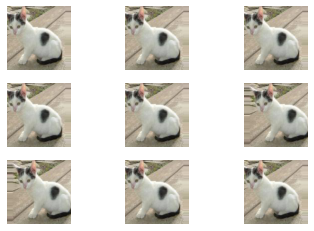

In [10]:
# Shift is in pixel values, so this depends on size of image
datagen = ImageDataGenerator(width_shift_range=[-10,10])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
    # show the figure
plt.show()

Vertical Shift

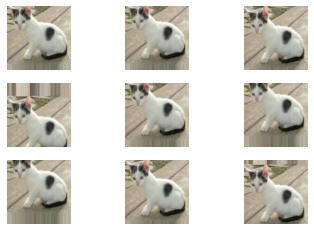

In [11]:
# Shift is in percentage of image
datagen = ImageDataGenerator(height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
    # show the figure
# show the figure
plt.show()

Horizontal and Vertical Flip Augmentation

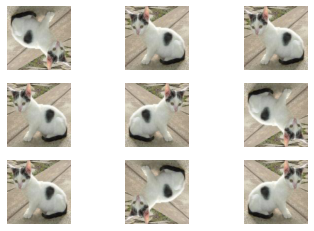

In [12]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
# show the figure
plt.show()

Random Rotation : Degrees 0 to 360

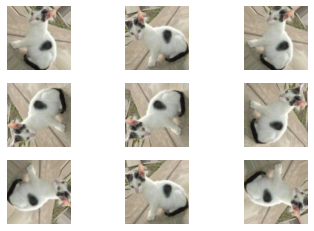

In [13]:
datagen = ImageDataGenerator(rotation_range=360)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
# show the figure
plt.show()

Random Brightness<br>
Can either brighten or darken an image. Values less than 1 darker, values greater than 1 lighten.

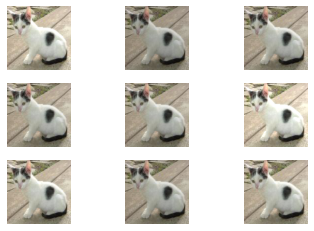

In [14]:
datagen = ImageDataGenerator(brightness_range=[0.8,1.2])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
# show the figure
plt.show()

Random Zoom Augmentation<br>
A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.<br/>
Numbers less than 1 zoom into the image, numbers greater than 1 zoom out of the image.

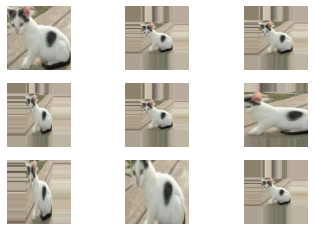

In [15]:
datagen = ImageDataGenerator(zoom_range=[0.5,2.5])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off')
# show the figure
plt.show()

<h3>ImageDataGenerators</h3>

In [16]:
image_path_train = str(pathlib.Path('images/cats_vs_dogs/train'))
image_path_val = str(pathlib.Path('images/cats_vs_dogs/val'))
image_path_test = str(pathlib.Path('images/cats_vs_dogs/test'))

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range=[-10,10],
                                   height_shift_range=0.2,
                                   brightness_range=[0.8,1.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=180)
train_datagen = train_datagen.flow_from_directory(
                image_path_train,
                target_size=(image_width, image_height),
                batch_size = batch_size,
                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = val_datagen.flow_from_directory(
            image_path_val,
            target_size=(image_width, image_height),
            batch_size = batch_size,
            class_mode='categorical')

print(train_datagen.class_indices)
print(val_datagen.class_indices)

Found 24964 images belonging to 2 classes.
Found 8568 images belonging to 2 classes.
{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


<h3>Inception V3</h3>

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Make all layers untrainable
for layer in base_inception.layers:
    layer.trainable = False

#last_output = base_inception.output                 
last_output = base_inception.get_layer('mixed7').output
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) 
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_inception.input, outputs=predictions)


inception_layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
print(pd.DataFrame(inception_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']))

model.compile(Adam(), loss='categorical_crossentropy', metrics=['acc']) 
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

                                            Layer Type           Layer Name  \
0    <tensorflow.python.keras.engine.input_layer.In...              input_1   
1    <tensorflow.python.keras.layers.convolutional....               conv2d   
2    <tensorflow.python.keras.layers.normalization....  batch_normalization   
3    <tensorflow.python.keras.layers.core.Activatio...           activation   
4    <tensorflow.python.keras.layers.convolutional....             conv2d_1   
..                                                 ...                  ...   
228  <tensorflow.python.keras.layers.merge.Concaten...               mixed7   
229  <tensorflow.python.keras.layers.core.Flatten o...              flatten   
230  <tensorflow.python.keras.layers.core.Dense obj...                dense   
231  <tensorflow.python.keras.layers.core.Dropout o...              dropout   
232  <tensorflow.python.keras.layers.core.Dense obj...              dense_1   

     Layer Trainable  
0              False  
1    

In [18]:
history = model.fit(train_datagen, 
                steps_per_epoch = len(train_datagen.labels)//batch_size,
                epochs=20, 
                validation_data = val_datagen, 
                validation_steps = len(val_datagen.labels)//batch_size,
                verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 780 steps, validate for 267 steps
Epoch 1/20
780/780 [==============================] - 172s 220ms/step - loss: 0.5002 - acc: 0.7704 - val_loss: 0.3497 - val_acc: 0.9141
Epoch 2/20
780/780 [==============================] - 136s 175ms/step - loss: 0.4120 - acc: 0.8079 - val_loss: 0.2991 - val_acc: 0.9194
Epoch 3/20
780/780 [==============================] - 135s 174ms/step - loss: 0.3916 - acc: 0.8187 - val_loss: 0.3062 - val_acc: 0.9212
Epoch 4/20
780/780 [==============================] - 116s 149ms/step - loss: 0.3831 - acc: 0.8211 - val_loss: 0.3094 - val_acc: 0.9205
Epoch 5/20
780/780 [==============================] - 106s 135ms/step - loss: 0.3838 - acc: 0.8219 - val_loss: 0.2866 - val_acc: 0.9280
Epoch 6/20
780/780 [==============================] - 104s 134ms/step - loss: 0.3696 - acc: 0.8277 - val_loss: 0.2792 - val_acc: 0.9274
Epoch 7/20
780/780 [==============================] - 103s 132ms/step - loss: 0.3625 - acc

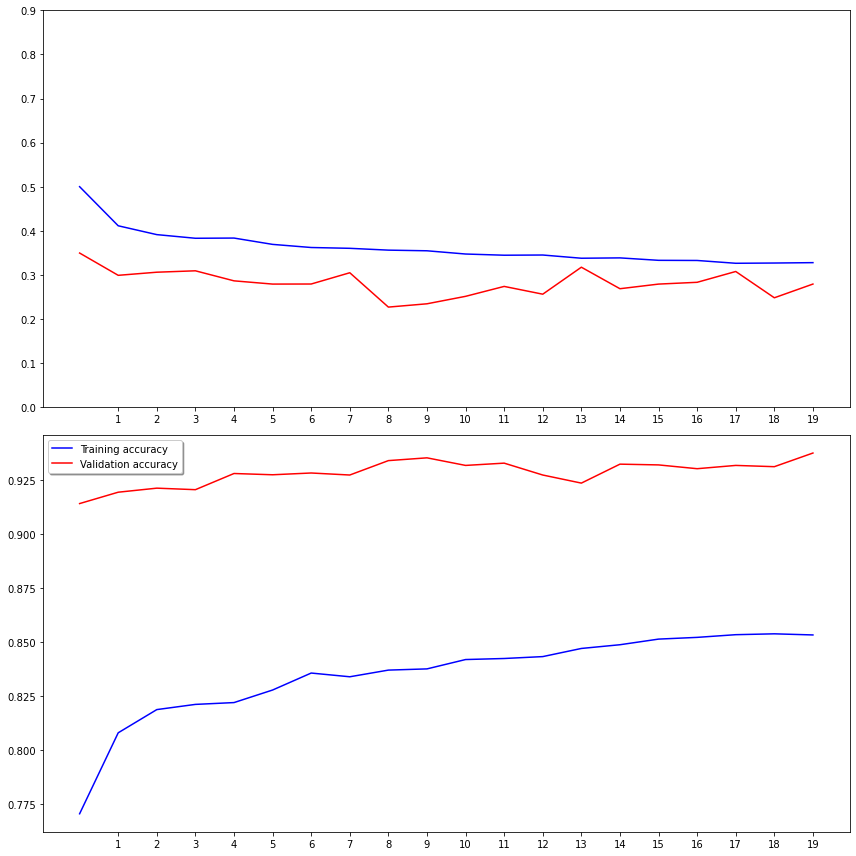

In [21]:
epochs = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()